# Домашняя работа  к третьему уроку

## Для чего и в каких случаях полезны различные варианты усреднения для метрик качества классификации: micro, macro, weighted?

Микро- и макро-средние (для любой метрики) будут вычислять несколько разные вещи, и, следовательно, их интерпретация будет разной. Макро-среднее вычислит метрику независимо для каждого класса, а затем возьмет среднее (следовательно, будет обрабатывать все классы одинаково), тогда как микро-среднее будет агрегировать вклады всех классов для вычисления средней метрики. В мультиклассовой классификации предпочтение отдается микро-среднему, если вы подозреваете, что может быть дисбаланс классов (т.е. у вас может быть гораздо больше примеров одного класса, чем других классов).
Если дисбаланс классов является проблемой, есть несколько способов обойти это. Одним из них является способ вычислить взвешенное макро-среднее значение, при котором вклад каждого класса в среднее значение взвешивается по относительному числу доступных для него примеров.


## В чём разница между моделями xgboost, lightgbm и catboost или какие их основные особенности?

LightGBM - самый быстрый из всех алгоритмов. CatBoost и XGBoost также представляют собой значительное улучшение по сравнению с GBM, но они все еще отстают от LightGBM.

**Типы данных**
* LightGBM: Перед построением набора данных для LGBM вы должны преобразовать свои категориальные функции в тип int. Он не принимает строковые значения.
* XGBoost не может обрабатывать категориальные функции сам по себе, он принимает только числовые значения, подобные случайному лесу. 
* CatBoost работает хорошо только тогда, когда в данных есть категориальные переменные, и мы должным образом настроили их (one_hot_max_size).

**Сплит**

Перед обучением все алгоритмы создают пары разделения функций для всех функций. Примеры таких пар: (возраст, <5), (возраст,> 10), (количество,> 500). Эти пары разбиения признаков построены на основе гистограмм и используются во время обучения как возможные разбиения узлов.

**Рост листьев**
* Catboost выращивает сбалансированное дерево. На каждом уровне такого дерева выбирается пара разделенных признаков, которая приводит к наименьшим потерям (согласно штрафной функции), и используется для всех узлов уровня.

* LightGBM использует рост деревьев по листьям (лучший - первым). Он выбирает рост листа, который сводит к минимуму потери, позволяя вырасти несбалансированному дереву. Поскольку он растет не по уровням, а по листам, переоснащение может произойти, когда данных мало. В этих случаях важно контролировать глубину дерева.Например, допустим, у меня есть 500 000 строк данных, где 10 000 строк имеют более высокий градиент. Поэтому мой алгоритм выберет (10 тыс. Строк с более высоким градиентом + х% из оставшихся 490 тыс. Строк, выбранных случайным образом). Предполагая, что x равен 10%, общее количество выбранных строк составляет 59 КБ из 500 КБ, исходя из того, какое значение разделения будет найдено.

* XGboost разбивается до указанного гиперпараметра max_depth, а затем начинает обрезку дерева в обратном направлении и удаляет разбиения, за пределами которых нет положительного усиления. 

**Алгоритм**

* Сatboost не использует dummified переменных, поэтому вес, присваиваемый каждой (категориальной) переменной, является более сбалансированным по сравнению с другими, поэтому переменные с большим количеством элементов не имеют большего веса, чем другие. Это позволяет слабой категории входить в некоторые деревья, следовательно, лучше производительность.

**Поддержка**

* XGBoost  с ним проще всего работать, когда вам нужно решить проблемы, с которыми вы сталкиваетесь, потому что у него сильное сообщество и множество соответствующих сообщений в сообществе. 
* LightGBM имеет меньшее сообщество, что затрудняет работу или использование расширенных функций. 
* У CatBoost также есть небольшое сообщество, но у них есть отличный канал в Telegram, где разработчики пакетов в короткие сроки отвечают на вопросы.
 
 **Мнения**
 
Например, вы хотите убедиться,то деревья были построены правильно, что объекты были обработаны правильно:  как категориальные, так и числовые. ПО этиму критерию, счиитают, что CatBoost и LightGBM больше похожи на черный ящик. XGBoost более прозрачен, что позволяет легко строить деревья, и, поскольку он не имеет встроенной кодировки категориальных функций, нет никаких возможных сюрпризов, связанных с типом функций.


## 3.
Скачать данные из соревнования, пока можете работать только с train.csv. Считать их.

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - баллы кредитного рейтинга
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [343]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)

In [344]:
TRAIN_DATASET_PATH = 'data/course_project/train.csv'
# TEST_DATASET_PATH = './data/course_project/test.csv'

In [345]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head(3)

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0

Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения).
Сделать выводы об адекватности этих статистик.

In [346]:
df_train.describe(include = 'all').T

count unique                 top  freq  \
Home Ownership                7500      4       Home Mortgage  3637   
Annual Income                 5943    NaN                 NaN   NaN   
Years in current job          7129     11           10+ years  2332   
Tax Liens                     7500    NaN                 NaN   NaN   
Number of Open Accounts       7500    NaN                 NaN   NaN   
Years of Credit History       7500    NaN                 NaN   NaN   
Maximum Open Credit           7500    NaN                 NaN   NaN   
Number of Credit Problems     7500    NaN                 NaN   NaN   
Months since last delinquent  3419    NaN                 NaN   NaN   
Bankruptcies                  7486    NaN                 NaN   NaN   
Purpose                       7500     15  debt consolidation  5944   
Term                          7500      2          Short Term  5556   
Current Loan Amount           7500    NaN                 NaN   NaN   
Current Credit Balance        7500    NaN                 NaN   NaN   
Monthly Debt                  7500    NaN                 NaN   NaN   
Credit Score                  5943    NaN                 NaN   NaN   
Credit Default                7500    NaN                 NaN   NaN   

                                     mean          std     min      25%  \
Home Ownership                        NaN          NaN     NaN      NaN   
Annual Income                 1.36639e+06       845339  164597   844341   
Years in current job                  NaN          NaN     NaN      NaN   
Tax Liens                       0.0301333     0.271604       0        0   
Number of Open Accounts           11.1309      4.90892       2        8   
Years of Credit History           18.3175      7.04195       4     13.5   
Maximum Open Credit                945154  1.60262e+07       0   279230   
Number of Credit Problems            0.17     0.498598       0        0   
Months since last delinquent      34.6926      21.6888       0       16   
Bankruptcies                     0.117152     0.347192       0        0   
Purpose                               NaN          NaN     NaN      NaN   
Term                                  NaN          NaN     NaN      NaN   
Current Loan Amount           1.18732e+07  3.19261e+07   11242   180169   
Current Credit Balance             289833       317871       0   114256   
Monthly Debt                      18314.5      11926.8       0  10067.5   
Credit Score                      1151.09      1604.45     585      711   
Credit Default                   0.281733     0.449874       0        0   

                                      50%          75%          max  
Home Ownership                        NaN          NaN          NaN  
Annual Income                 1.16839e+06  1.64014e+06  1.01493e+07  
Years in current job                  NaN          NaN          NaN  
Tax Liens                               0            0            7  
Number of Open Accounts                10           14           43  
Years of Credit History                17         21.8         57.7  
Maximum Open Credit                478159       793502  1.30473e+09  
Number of Credit Problems               0            0            7  
Months since last delinquent           32           50          118  
Bankruptcies                            0            0            4  
Purpose                               NaN          NaN          NaN  
Term                                  NaN          NaN          NaN  
Current Loan Amount                309573       519882        1e+08  
Current Credit Balance             209323       360406   6.5068e+06  
Monthly Debt                      16076.5        23818       136679  
Credit Score                          731          743         7510  
Credit Default                          0            1            1

## Везде где числовые пропуски заполняем медианой, категориальные значения в dummies. Категориальные пропуски - самым частым значением.

In [347]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_train.select_dtypes(exclude=numerics)
CAT_FEATURE_NAMES = newdf.columns
CAT_FEATURE_NAMES

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')

In [348]:
# заполнить все категориальные обьекты дамми данными

for cat_colname in df_train.select_dtypes(include='object').columns:
    df_train = pd.concat([df_train, pd.get_dummies(df_train[cat_colname], prefix=cat_colname)], axis=1)

In [349]:
# df_train.info()

### Определим столбики с пропусками данных

In [350]:
col_wo_cat = []
for col in df_train.columns:
    count = df_train[col].count()
    if count < df_train.shape[0]:
        print(f'Column-{col} : q-ty = {count}')
        col_wo_cat.append (col)
print (col_wo_cat)
#         print('*'*100)



Column-Annual Income : q-ty = 5943
Column-Years in current job : q-ty = 7129
Column-Months since last delinquent : q-ty = 3419
Column-Bankruptcies : q-ty = 7486
Column-Credit Score : q-ty = 5943
['Annual Income', 'Years in current job', 'Months since last delinquent', 'Bankruptcies', 'Credit Score']


In [362]:
col_WO_cat = ['Annual Income','Months since last delinquent', 'Bankruptcies', 'Credit Score']

In [363]:

# WO_CATEGORIES = df_train.columns.drop(CAT_FEATURE_NAMES).tolist()
# df_train = df_train[WO_CATEGORIES]
# df_train.info()

#### преобразование обьекта в числа

In [364]:
df_train['Credit Score'] = pd.to_numeric(df_train['Credit Score'], errors='coerce')

In [365]:
# df_train.info()

In [366]:
# df_train.dropna(subset=['Credit Score'], axis = 0 , inplace= True)  #удалит пустые строки
# df_train['Credit Score']= df_train['Credit Score'].astype(int)

In [367]:
for col in col_WO_cat:
    if df_train[col].isna().sum() > 0:
        df_train.loc[df_train[col].isna(), col] = df_train[col].median()
# df_train.loc[df_train['Annual Income'].isna(), 'Annual Income'] = df_train['Annual Income'].median()

In [368]:
df_train['Years in current job'].describe().top

'10+ years'

In [369]:
df_train.loc[df_train['Years in current job'].isna(), 'Years in current job'] = df_train['Years in current job'].describe().top

In [174]:
# for col in df_train.columns:
#     if df_train[col].isna().sum() > 0:
#          print (col)
# #     if True:
# #         print (col)
# #     colmn = df_train[col].value_counts()
# #     df_train.loc[df_train[col].isna().sum() > 0]

Years in current job
Months since last delinquent
Bankruptcies
Credit Score


In [370]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Home Ownership                  7500 non-null   object 
 1   Annual Income                   7500 non-null   float64
 2   Years in current job            7500 non-null   object 
 3   Tax Liens                       7500 non-null   float64
 4   Number of Open Accounts         7500 non-null   float64
 5   Years of Credit History         7500 non-null   float64
 6   Maximum Open Credit             7500 non-null   float64
 7   Number of Credit Problems       7500 non-null   float64
 8   Months since last delinquent    7500 non-null   float64
 9   Bankruptcies                    7500 non-null   float64
 10  Purpose                         7500 non-null   object 
 11  Term                            7500 non-null   object 
 12  Current Loan Amount             75

In [371]:
# сохранение приготовленного датасета

PREP_DATASET_PATH = DATA_ROOT / 'training_project_data_prep.csv'
df_train.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

### Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются.
Сделать выводы по каждому признаку.

In [30]:
for col in df_train.columns:
    colmn = df_train[col].value_counts()
    print (colmn)
    print('*'*100)

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************
1161660.0    4
1058376.0    4
1338113.0    4
1043651.0    4
969475.0     4
            ..
1141254.0    1
7907382.0    1
1534478.0    1
972040.0     1
1654786.0    1
Name: Annual Income, Length: 5478, dtype: int64
****************************************************************************************************
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: in

## 3. Используя выводы из двух предыдущих заданий, найдите те наблюдения, где есть пропуски, выбросы (неадекватные значения признака, которые отличаются от большинства), используя фильтрацию из pandas.

### Выглядит нездорово кредит на сумму 99999999. Скорее всего, ошибка

In [31]:
df_train.loc[df_train['Current Loan Amount']==99999999.0]

Home Ownership  Annual Income Years in current job  Tax Liens  \
0          Own Home       482087.0                  NaN        0.0   
2     Home Mortgage       751412.0              8 years        0.0   
6     Home Mortgage      1511108.0            10+ years        0.0   
22             Rent       463790.0                  NaN        0.0   
27             Rent      1004055.0              8 years        0.0   
...             ...            ...                  ...        ...   
7441           Rent      1406836.0               1 year        0.0   
7445  Home Mortgage      1564384.0              6 years        0.0   
7464  Home Mortgage      1159152.0              6 years        0.0   
7475           Rent       848426.0            10+ years        0.0   
7497           Rent      1878910.0              6 years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                        11.0                     26.3             685960.0   
2                        11.0                     35.0            1182434.0   
6                         9.0                     20.3             388124.0   
22                        6.0                     28.3             288442.0   
27                        7.0                     14.5             328394.0   
...                       ...                      ...                  ...   
7441                     12.0                     22.6            2383260.0   
7445                     21.0                     17.3            1545016.0   
7464                     14.0                     22.0             389356.0   
7475                      8.0                     20.1             526306.0   
7497                     12.0                     32.1            1778920.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           1.0                           NaN           1.0   
2                           0.0                           NaN           0.0   
6                           0.0                          73.0           0.0   
22                          0.0                           NaN           0.0   
27                          0.0                           NaN           0.0   
...                         ...                           ...           ...   
7441                        0.0                           NaN           0.0   
7445                        0.0                           NaN           0.0   
7464                        1.0                          77.0           1.0   
7475                        0.0                          12.0           0.0   
7497                        0.0                           NaN           0.0   

                 Purpose        Term  Current Loan Amount  \
0     debt consolidation  Short Term           99999999.0   
2     debt consolidation  Short Term           99999999.0   
6      home improvements  Short Term           99999999.0   
22    debt consolidation  Short Term           99999999.0   
27    debt consolidation  Short Term           99999999.0   
...                  ...         ...                  ...   
7441  debt consolidation  Short Term           99999999.0   
7445               other   Long Term           99999999.0   
7464  debt consolidation  Short Term           99999999.0   
7475  debt consolidation  Short Term           99999999.0   
7497           buy a car  Short Term           99999999.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                    47386.0        7914.0         749.0               0  
2                   308389.0       13651.0         742.0               0  
6                    51623.0        2317.0         745.0               0  
22                  157700.0        5063.0         738.0               0  
27                  195966.0        6041.0         734.0               0  
...                      ...           ...           ...             ...  
7441    

### Вызывыют удивление люди, у которых есть кредит, но указано, что им выдавалось максимально не более 0

In [33]:
df_train.loc[(df_train['Maximum Open Credit'] == 0) & (df_train['Current Loan Amount'] > 0)]

Home Ownership  Annual Income Years in current job  Tax Liens  \
8     Home Mortgage            NaN              5 years        0.0   
91             Rent       601369.0            10+ years        0.0   
196            Rent       815157.0              7 years        0.0   
294   Home Mortgage      2033931.0              7 years        0.0   
309            Rent      1245792.0              3 years        0.0   
...             ...            ...                  ...        ...   
6593  Home Mortgage            NaN              8 years        0.0   
6851  Home Mortgage      2251728.0            10+ years        0.0   
7014  Home Mortgage      1223771.0              5 years        0.0   
7124           Rent            NaN               1 year        0.0   
7233  Home Mortgage      2405932.0            10+ years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
8                        17.0                     15.7                  0.0   
91                        6.0                     16.9                  0.0   
196                       3.0                      8.8                  0.0   
294                       6.0                     21.1                  0.0   
309                       5.0                     22.4                  0.0   
...                       ...                      ...                  ...   
6593                     10.0                     13.0                  0.0   
6851                      8.0                     15.4                  0.0   
7014                      9.0                     24.0                  0.0   
7124                      4.0                     11.0                  0.0   
7233                      8.0                     24.5                  0.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
8                           1.0                           NaN           1.0   
91                          0.0                          14.0           0.0   
196                         0.0                           NaN           0.0   
294                         0.0                           NaN           0.0   
309                         0.0                          58.0           0.0   
...                         ...                           ...           ...   
6593                        0.0                           NaN           0.0   
6851                        0.0                           NaN           0.0   
7014                        0.0                           NaN           0.0   
7124                        0.0                          50.0           0.0   
7233                        0.0                           NaN           0.0   

                 Purpose        Term  Current Loan Amount  \
8      home improvements  Short Term             129734.0   
91    debt consolidation  Short Term             165924.0   
196       small business  Short Term             218042.0   
294    home improvements  Short Term             108042.0   
309       major purchase   Long Term             338096.0   
...                  ...         ...                  ...   
6593  debt consolidation   Long Term             672078.0   
6851   home improvements   Long Term             760452.0   
7014      small business   Long Term             751454.0   
7124  debt consolidation  Short Term             134024.0   
7233               other  Short Term             270468.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
8                       19.0          17.0           NaN               0  
91                       0.0        9021.0         738.0               0  
196                      0.0        5855.0         738.0               0  
294                      0.0       30340.0         742.0               0  
309                      0.0         395.0         659.0               0  
...                      ...           ...           ...             ...  
6593    

### Проверим тех, кто должен платить, но при этом у него задолженность 0

In [34]:
df_train.loc[(df_train['Current Credit Balance'] == 0) & (df_train['Monthly Debt'] > 0) ]

Home Ownership  Annual Income Years in current job  Tax Liens  \
91             Rent       601369.0            10+ years        0.0   
196            Rent       815157.0              7 years        0.0   
294   Home Mortgage      2033931.0              7 years        0.0   
309            Rent      1245792.0              3 years        0.0   
319        Own Home            NaN             < 1 year        0.0   
544   Home Mortgage            NaN              2 years        0.0   
585   Home Mortgage      4772800.0              8 years        0.0   
1163  Home Mortgage      4523064.0              3 years        0.0   
1338           Rent            NaN              2 years        0.0   
1404           Rent       349391.0             < 1 year        0.0   
1427  Home Mortgage            NaN            10+ years        0.0   
1464  Home Mortgage      2432000.0            10+ years        0.0   
1483  Home Mortgage            NaN              7 years        0.0   
1637           Rent      1345295.0            10+ years        0.0   
1672           Rent      1788584.0            10+ years        0.0   
1684  Home Mortgage       845348.0              4 years        0.0   
1802           Rent      1043651.0             < 1 year        0.0   
1816  Home Mortgage            NaN            10+ years        0.0   
1894           Rent       958094.0              8 years        0.0   
2276           Rent      2086067.0            10+ years        0.0   
2297  Home Mortgage      1263785.0              8 years        0.0   
2446  Home Mortgage            NaN              5 years        0.0   
2640           Rent       973560.0                  NaN        0.0   
3314           Rent            NaN               1 year        0.0   
3401           Rent       326154.0              6 years        0.0   
3412  Home Mortgage      1543560.0                  NaN        0.0   
3539           Rent            NaN             < 1 year        0.0   
3624  Home Mortgage       746852.0              5 years        0.0   
3647           Rent            NaN              3 years        0.0   
3780  Home Mortgage       801724.0            10+ years        0.0   
3938       Own Home      1328575.0              9 years        0.0   
4119  Home Mortgage       959557.0              2 years        0.0   
4274           Rent      2257903.0              6 years        0.0   
4295  Home Mortgage            NaN              9 years        0.0   
4335  Home Mortgage      1396082.0              2 years        0.0   
4382       Own Home      4190792.0              2 years        0.0   
4398           Rent       983820.0               1 year        0.0   
4405  Home Mortgage            NaN              6 years        0.0   
4958           Rent       890701.0              2 years        0.0   
5114           Rent      1281455.0              8 years        0.0   
5287  Home Mortgage       872347.0              6 years        0.0   
5395  Home Mortgage            NaN              4 years        0.0   
5688           Rent      1338474.0             < 1 year        0.0   
6189           Rent       713127.0              3 years        0.0   
6591  Home Mortgage            NaN            10+ years        0.0   
6851  Home Mortgage      2251728.0            10+ years        0.0   
7014  Home Mortgage      1223771.0              5 years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
91                        6.0                     16.9                  0.0   
196                       3.0                      8.8                  0.0   
294                       6.0                     21.1                  0.0   
309                       5.0                     22.4                  0.0   
319                       2.0                     10.5                  0.0   
544                      15.0                     22.5                  0.0   
585                       9.0                     35.5                  0.0   
1163        

### Проверим, есть ли те, кто не платит ежемесячно, но имеет кредит

In [35]:
df_train.loc[(df_train['Monthly Debt'] == 0) &(df_train['Current Credit Balance'] > 0)]

Empty DataFrame
Columns: [Home Ownership, Annual Income, Years in current job, Tax Liens, Number of Open Accounts, Years of Credit History, Maximum Open Credit, Number of Credit Problems, Months since last delinquent, Bankruptcies, Purpose, Term, Current Loan Amount, Current Credit Balance, Monthly Debt, Credit Score, Credit Default]
Index: []

### Кажется, что если текущий кредит больше предыдущих, он должен стоят в столбе максимально выданный кредит

In [36]:
df_train.loc[df_train['Maximum Open Credit'] < df_train['Current Loan Amount']]

Home Ownership  Annual Income Years in current job  Tax Liens  \
0          Own Home       482087.0                  NaN        0.0   
2     Home Mortgage       751412.0              8 years        0.0   
6     Home Mortgage      1511108.0            10+ years        0.0   
8     Home Mortgage            NaN              5 years        0.0   
9     Home Mortgage            NaN               1 year        0.0   
...             ...            ...                  ...        ...   
7487  Home Mortgage      1542952.0            10+ years        0.0   
7488           Rent       465405.0              5 years        0.0   
7491  Home Mortgage      2833185.0              6 years        0.0   
7495           Rent       402192.0             < 1 year        0.0   
7497           Rent      1878910.0              6 years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                        11.0                     26.3             685960.0   
2                        11.0                     35.0            1182434.0   
6                         9.0                     20.3             388124.0   
8                        17.0                     15.7                  0.0   
9                        10.0                     24.6             511302.0   
...                       ...                      ...                  ...   
7487                      7.0                     12.5             232364.0   
7488                      5.0                      7.7              51744.0   
7491                     18.0                     21.3             280170.0   
7495                      3.0                      8.5             107866.0   
7497                     12.0                     32.1            1778920.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           1.0                           NaN           1.0   
2                           0.0                           NaN           0.0   
6                           0.0                          73.0           0.0   
8                           1.0                           NaN           1.0   
9                           0.0                           6.0           0.0   
...                         ...                           ...           ...   
7487                        0.0                          59.0           0.0   
7488                        0.0                          33.0           0.0   
7491                        0.0                           6.0           0.0   
7495                        0.0                           NaN           0.0   
7497                        0.0                           NaN           0.0   

                 Purpose        Term  Current Loan Amount  \
0     debt consolidation  Short Term           99999999.0   
2     debt consolidation  Short Term           99999999.0   
6      home improvements  Short Term           99999999.0   
8      home improvements  Short Term             129734.0   
9     debt consolidation   Long Term             572880.0   
...                  ...         ...                  ...   
7487  debt consolidation   Long Term             267982.0   
7488   home improvements  Short Term             129338.0   
7491  debt consolidation  Short Term             437404.0   
7495               other  Short Term             129360.0   
7497           buy a car  Short Term           99999999.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                    47386.0        7914.0         749.0               0  
2                   308389.0       13651.0         742.0               0  
6                    51623.0        2317.0         745.0               0  
8                       19.0          17.0           NaN               0  
9                   205333.0       17613.0           NaN               1  
...                      ...           ...           ...             ...  
7487    

### Проверим сколько месяцев будут выплачивать полученные кредиты

In [37]:
df_train['Number_month_credit'] = df_train['Current Credit Balance'] / df_train['Monthly Debt']
df_train['Number_month_credit'].value_counts()

0.000000     47
6.031599      1
26.976538     1
6.992308      1
8.150248      1
             ..
3.258758      1
33.867967     1
13.961009     1
11.869060     1
42.682641     1
Name: Number_month_credit, Length: 7448, dtype: int64

In [38]:
df_train['Number_month_credit'].describe()

count    7494.000000
mean       17.901800
std        16.873370
min         0.000000
25%         8.288474
50%        14.338532
75%        23.499093
max       502.307475
Name: Number_month_credit, dtype: float64

### Есть ли те, у кого кредит на 0 месяцев, но существует долг

In [39]:
df_train.loc[(df_train['Number_month_credit'] == 0) & (df_train['Current Credit Balance'] > 0)]

Empty DataFrame
Columns: [Home Ownership, Annual Income, Years in current job, Tax Liens, Number of Open Accounts, Years of Credit History, Maximum Open Credit, Number of Credit Problems, Months since last delinquent, Bankruptcies, Purpose, Term, Current Loan Amount, Current Credit Balance, Monthly Debt, Credit Score, Credit Default, Number_month_credit]
Index: []

### Есть ли люди, чей кредит больше их жизни (80 лет)?

In [40]:
df_train.loc[(df_train['Number_month_credit']/12 + df_train['Years of Credit History']+ 20) > 80]

Home Ownership  Annual Income Years in current job  Tax Liens  \
2613  Home Mortgage       685596.0              6 years        0.0   
6505  Home Mortgage            NaN                  NaN        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
2613                     13.0                     23.0            1111506.0   
6505                      6.0                     42.4            2748240.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
2613                        0.0                           NaN           0.0   
6505                        0.0                          11.0           0.0   

                 Purpose        Term  Current Loan Amount  \
2613  debt consolidation   Long Term             136906.0   
6505  debt consolidation  Short Term             106260.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  \
2613                356136.0         709.0         737.0               0   
6505               1571243.0        4753.0           NaN               1   

      Number_month_credit  
2613           502.307475  
6505           330.579213

### Есть ли те у кого доходов не хватает для погашения кредита ?

In [41]:
df_train.loc[(df_train['Monthly Debt']*12) > (df_train['Annual Income']*0.7)]

Empty DataFrame
Columns: [Home Ownership, Annual Income, Years in current job, Tax Liens, Number of Open Accounts, Years of Credit History, Maximum Open Credit, Number of Credit Problems, Months since last delinquent, Bankruptcies, Purpose, Term, Current Loan Amount, Current Credit Balance, Monthly Debt, Credit Score, Credit Default, Number_month_credit]
Index: []

# Информация со второго урока

In [42]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
import warnings
warnings.simplefilter('ignore')

In [44]:
# df_train.dtype
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_train.select_dtypes(include=numerics)
newdf.columns

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default',
       'Number_month_credit'],
      dtype='object')

In [45]:
df_train.select_dtypes(include=np.number)

Annual Income  Tax Liens  Number of Open Accounts  \
0          482087.0        0.0                     11.0   
1         1025487.0        0.0                     15.0   
2          751412.0        0.0                     11.0   
3          805068.0        0.0                      8.0   
4          776264.0        0.0                     13.0   
...             ...        ...                      ...   
7495       402192.0        0.0                      3.0   
7496      1533984.0        0.0                     10.0   
7497      1878910.0        0.0                     12.0   
7498            NaN        0.0                     21.0   
7499            NaN        0.0                      8.0   

      Years of Credit History  Maximum Open Credit  Number of Credit Problems  \
0                        26.3             685960.0                        1.0   
1                        15.3            1181730.0                        0.0   
2                        35.0            1182434.0                        0.0   
3                        22.5             147400.0                        1.0   
4                        13.6             385836.0                        1.0   
...                       ...                  ...                        ...   
7495                      8.5             107866.0                        0.0   
7496                     26.5             686312.0                        0.0   
7497                     32.1            1778920.0                        0.0   
7498                     26.5            1141250.0                        0.0   
7499                      9.4             480832.0                        0.0   

      Months since last delinquent  Bankruptcies  Current Loan Amount  \
0                              NaN           1.0           99999999.0   
1                              NaN           0.0             264968.0   
2                              NaN           0.0           99999999.0   
3                              NaN           1.0             121396.0   
4                              NaN           0.0             125840.0   
...                            ...           ...                  ...   
7495                           NaN           0.0             129360.0   
7496                          43.0           0.0             444048.0   
7497                           NaN           0.0           99999999.0   
7498                           NaN           0.0             615274.0   
7499                           NaN           0.0              26928.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  \
0                    47386.0        7914.0         749.0               0   
1                   394972.0       18373.0         737.0               1   
2                   308389.0       13651.0         742.0               0   
3                    95855.0       11338.0         694.0               0   
4                    93309.0        7180.0         719.0               0   
...                      ...           ...           ...             ...   
7495                 73492.0        1900.0         697.0               0   
7496                456399.0       12783.0        7410.0               1   
7497                477812.0       12479.0         748.0               0   
7498                476064.0       37118.0           NaN               0   
7499                288192.0        9061.0           NaN               0   

      Number_month_credit  
0                5.987617  
1               21.497415  
2               22.590946  
3                8.454313  
4               12.995682  
...                   ...  
7495            38.680000  
7496            35.703591  
7497            38.289286  
7498            12.825691  
7499            31.805761  

[7500 rows x 14 columns]

In [46]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist() #удалили целевой столбец
# NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

NUM_FEATURE_NAMES = ['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default', 'Number_month_credit',
       'Id']



**Корреляция с базовыми признаками**

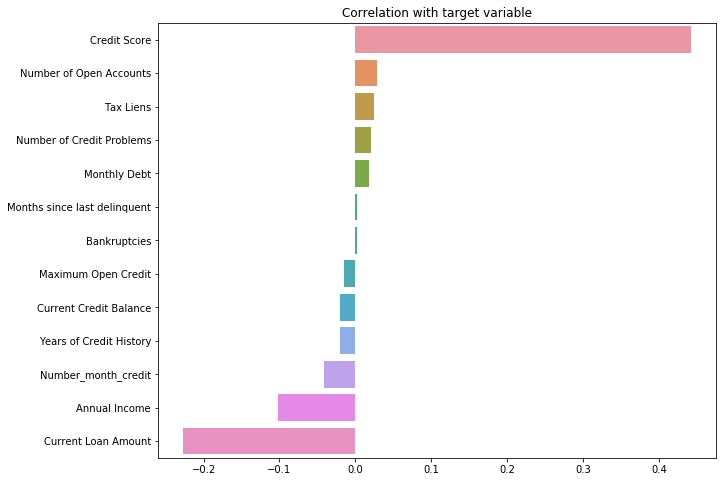

In [47]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Оценка всех признаков в разрезе целевой переменной

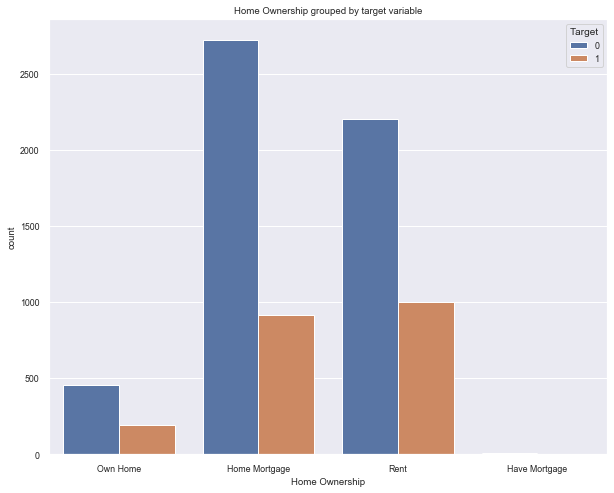

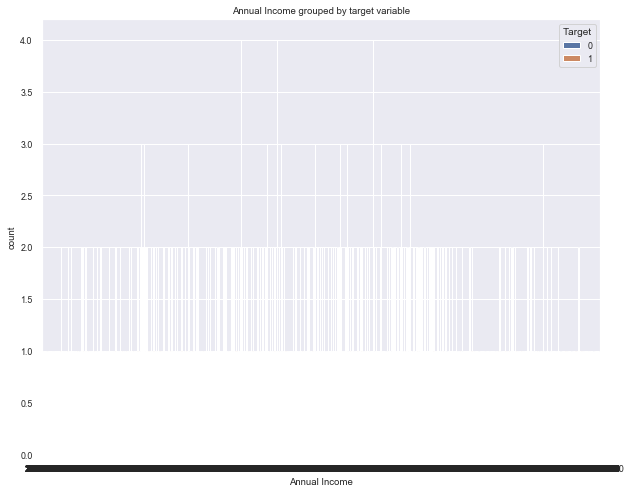

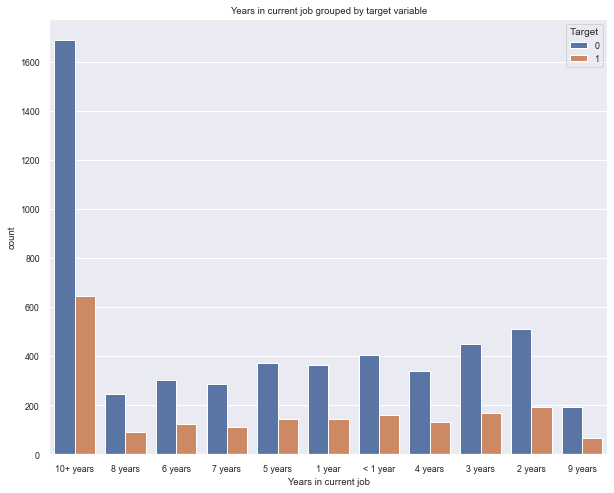

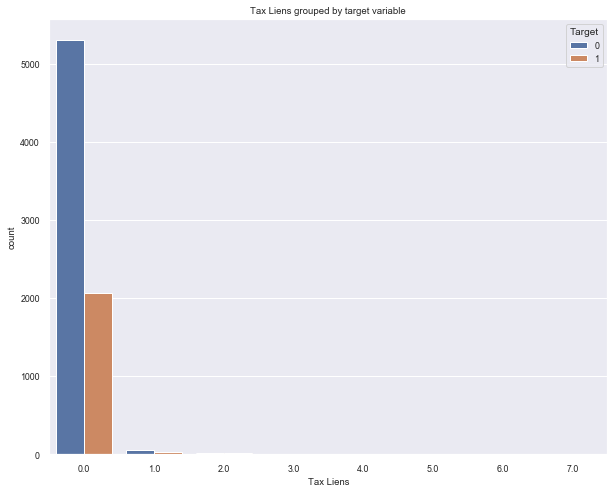

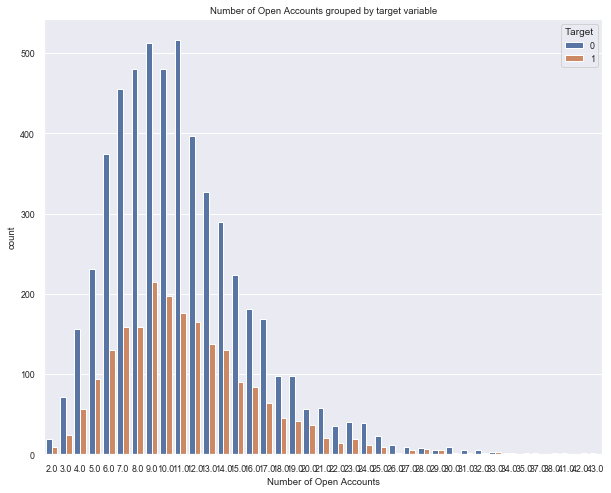

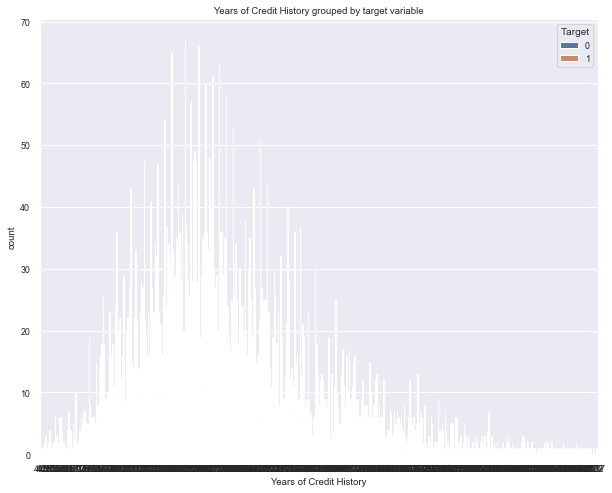

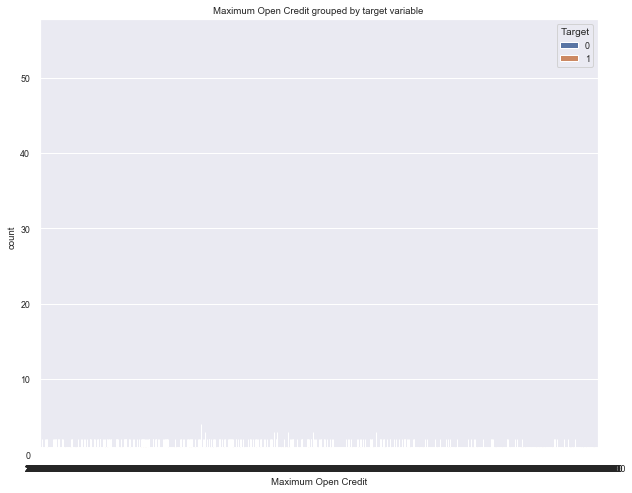

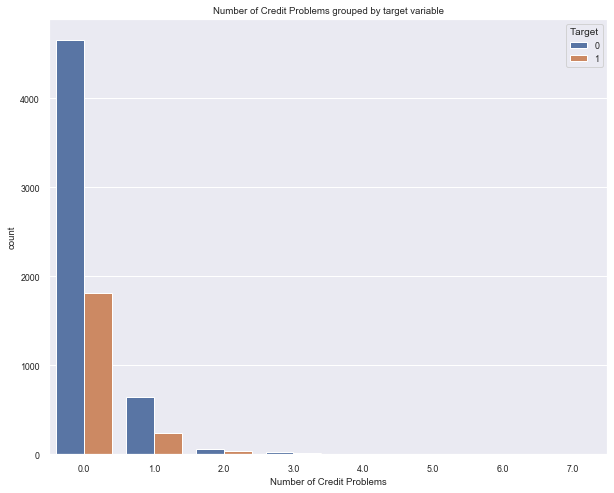

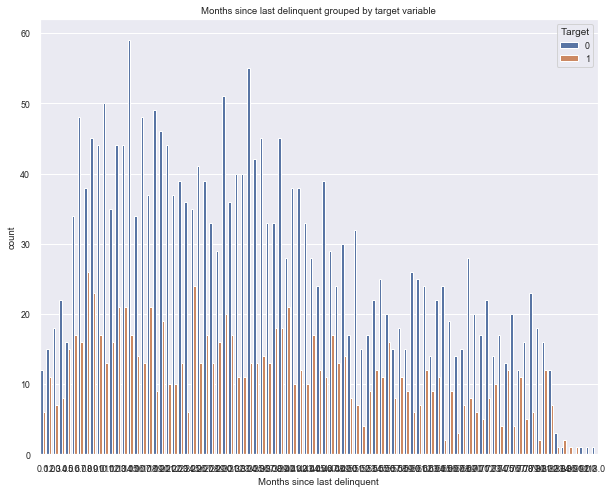

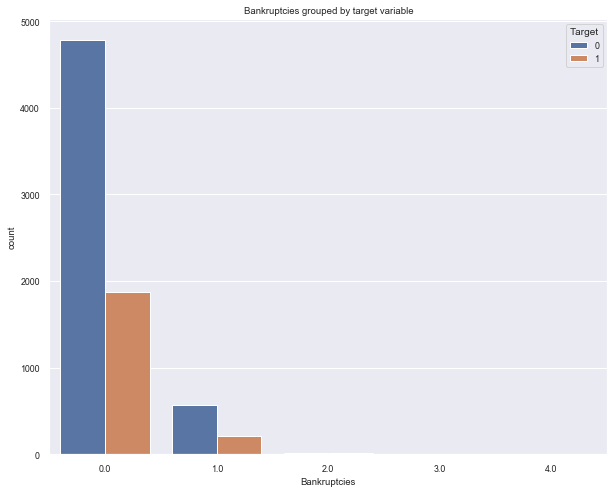

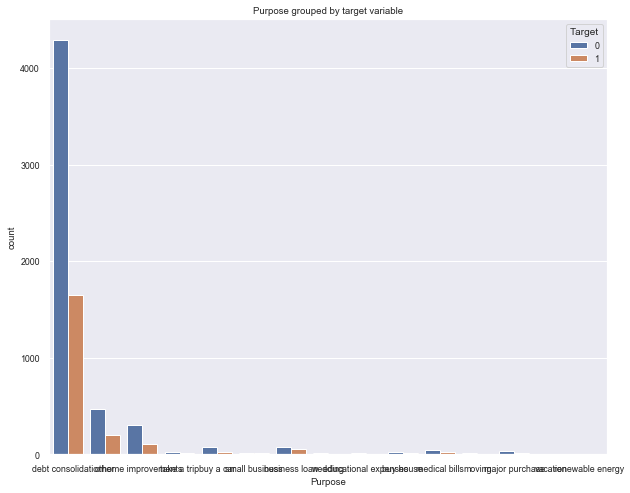

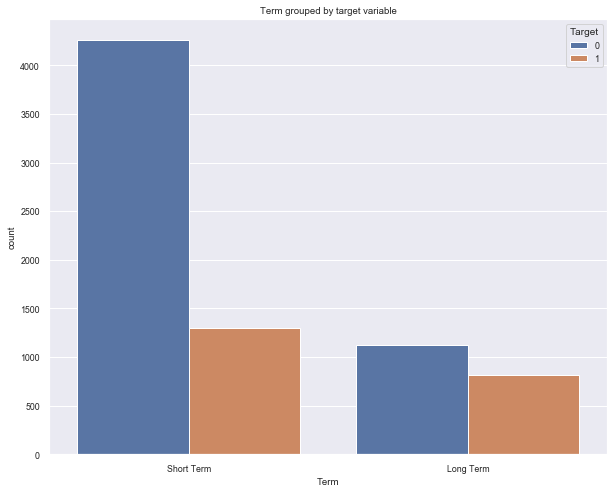

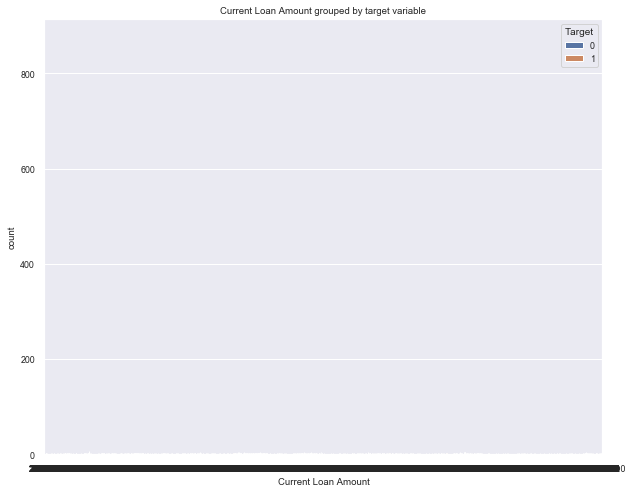

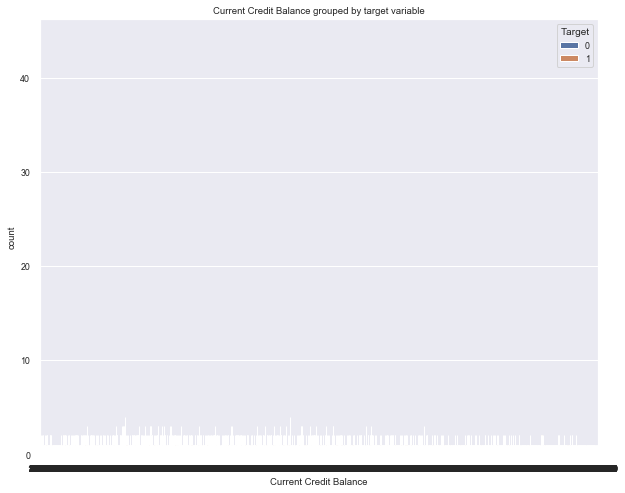

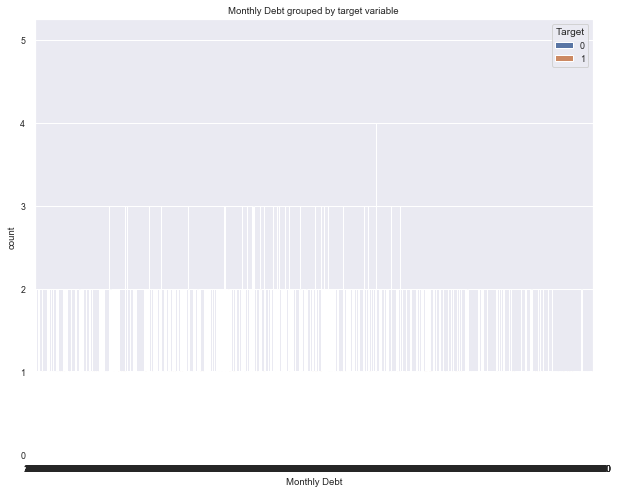

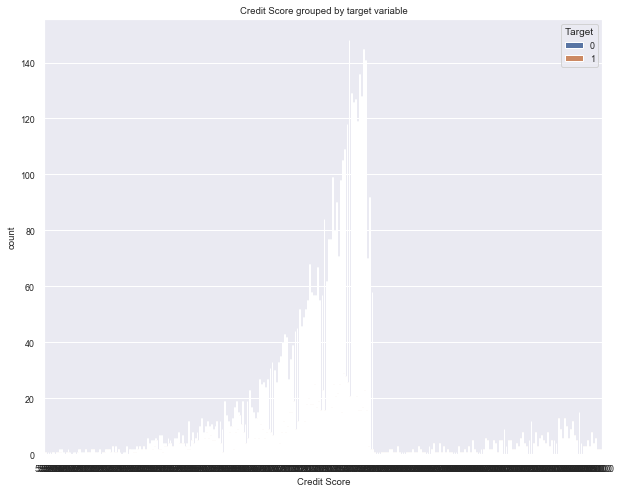

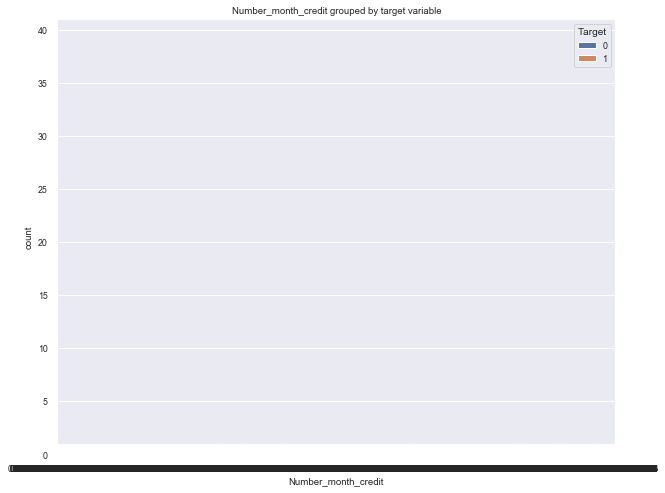

In [289]:
for feature in BASE_FEATURE_NAMES:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=feature, hue=TARGET_NAME, data=df_train)
    plt.title(f'{feature} grouped by target variable')
    plt.legend(title='Target', loc='upper right')
    plt.show()


**Оценка признака "Credit Score" в разрезе целевой переменной**

In [48]:
# plt.figure(figsize=(10, 8))

# sns.countplot(x="Credit Score", hue=TARGET_NAME, data=df_train)
# plt.title('Credit Score grouped by target variable')
# plt.legend(title='Target', loc='upper right')

# plt.show()

**Оценка признака "Years in current job" в разрезе целевой переменной**

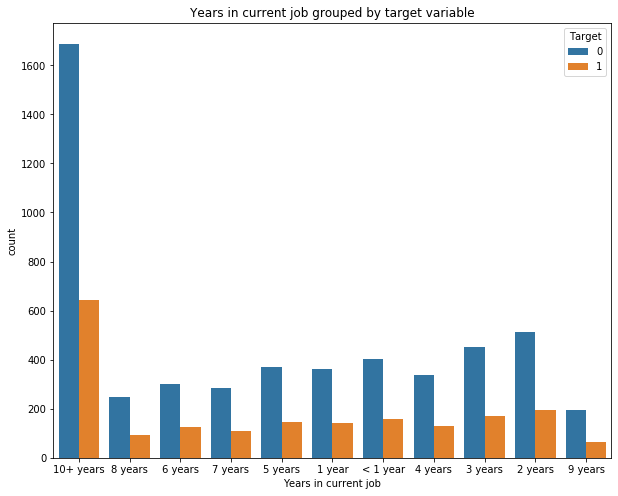

In [49]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Years in current job", hue=TARGET_NAME, data=df_train)
plt.title('Years in current job grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Предполагаем что Year in current job = 1 year & 5 years имеют схожие доли в разрезе целевой переменной. 
Если это действительно так, то можно будет, например, объединить их в одну категорию.

Гипотеза

* Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы
* Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
* Критерий: Хи-квадрат Пирсона
* Уровень значимости  𝛼 : 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо подать наблюдаемые частоты категорий -1 и 0 признака в выбранный критерий, после чего оценить значение достигаемого уровня значимости p-value и сравнить с его с выбранным порогом альфа, если p-value получится больше выбранного порога, то гипотезу о согласованности частот можно не отбрасывать.

Рассчитаем наблюдаемые частоты

*Рассчитаем наблюдаемые частоты*

In [50]:
df_train['Id'] = df_train.index
numacc_and_target_s = df_train.loc[df_train['Years in current job'].isin(['1 year', '5 years']), ['Id', 'Years in current job', 'Credit Default']]

In [51]:
table = numacc_and_target_s.pivot_table(values='Id', index='Years in current job', columns='Credit Default', aggfunc='count')
table

Credit Default          0    1
Years in current job          
1 year                362  142
5 years               371  145

*Проверим нашу гипотезу, используя критерий Хи-квадрат Пирсона*

In [52]:
chi2, p, _, _ = chi2_contingency(table)
p

0.9653663897936458

P-value получилось больше выбранного уровня значимости, соответственно у нас нет оснований для отвержения нулевой гипотезы и можно допустить, что категории 1 year и 5 years одинаково влияют на целевую переменную и их можно объединить в одну категорию. 



**Оценка признака "Home Ownership" в разрезе целевой переменной**

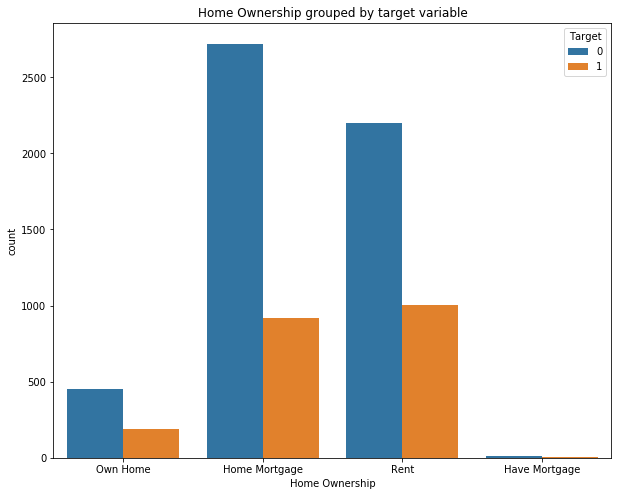

In [53]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Home Ownership", hue=TARGET_NAME, data=df_train)
plt.title('Home Ownership grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Предполагаем что Home Ownership = Home Mortgage & Rent имеют схожие доли в разрезе целевой переменной. 
Если это действительно так, то можно будет, например, объединить их в одну категорию.

*Рассчитаем наблюдаемые частоты*

In [54]:
df_train['Id'] = df_train.index
numacc_and_target_s = df_train.loc[df_train['Home Ownership'].isin(['Home Mortgage', 'Rent']), ['Id', 'Home Ownership', 'Credit Default']]

In [55]:
table = numacc_and_target_s.pivot_table(values='Id', index='Home Ownership', columns='Credit Default', aggfunc='count')
table

Credit Default     0     1
Home Ownership            
Home Mortgage   2721   916
Rent            2201  1003

*Проверим нашу гипотезу, используя критерий Хи-квадрат Пирсона*

In [56]:
chi2, p, _, _ = chi2_contingency(table)
p

2.2122322110125114e-08

P-value получилось сильно меньше выбранного уровня значимости, соответственно у нас нет оснований для принятия нулевой гипотезы  их нельзя объединить в одну категорию. 



**Оценка признака "Number of Open Accounts" в разрезе целевой переменной**

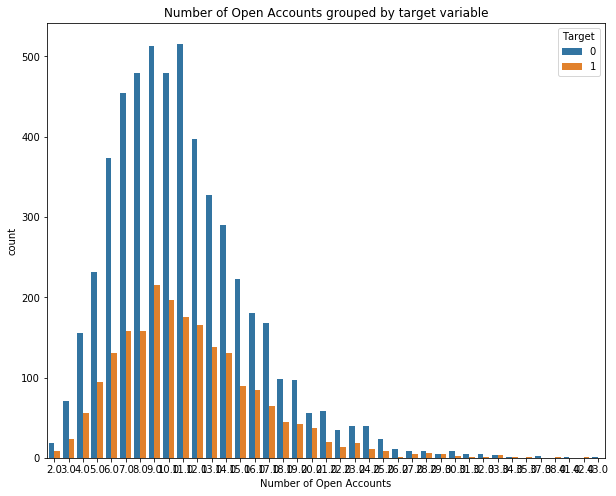

In [57]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Number of Open Accounts", hue=TARGET_NAME, data=df_train)
plt.title('Number of Open Accounts grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Предполагаем что Number of Open Accounts = 7 и 8 имеют схожие доли в разрезе целевой переменной. 
Если это действительно так, то можно будет, например, объединить их в одну категорию.

*Рассчитаем наблюдаемые частоты*

In [58]:
df_train['Id'] = df_train.index
numacc_and_target_s = df_train.loc[df_train['Number of Open Accounts'].isin([7, 8]), ['Id', 'Number of Open Accounts', 'Credit Default']]

In [59]:
table = numacc_and_target_s.pivot_table(values='Id', index='Number of Open Accounts', columns='Credit Default', aggfunc='count')
table

Credit Default             0    1
Number of Open Accounts          
7.0                      455  158
8.0                      480  158

*Проверим нашу гипотезу, используя критерий Хи-квадрат Пирсона*

In [60]:
chi2, p, _, _ = chi2_contingency(table)
p

0.7294091850030766

P-value получилось больше выбранного уровня значимости, соответственно у нас нет оснований для отвержения нулевой гипотезы и можно допустить, что категории 7 и 8 одинаково влияют на целевую переменную и их можно объединить в одну категорию. 



## Проверка на нормально расределение.
The null hypothesis of the test is the data is normally distributed. If the p value returned is less than.05, then the null hypothesis is rejected and there is evidence that the data is not from a normally distributed population.

(nan, 1.0)


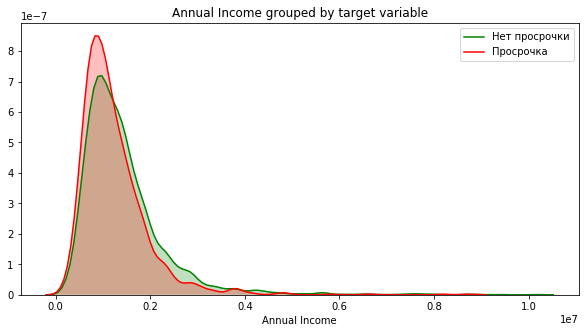

(0.9372566342353821, 0.0)


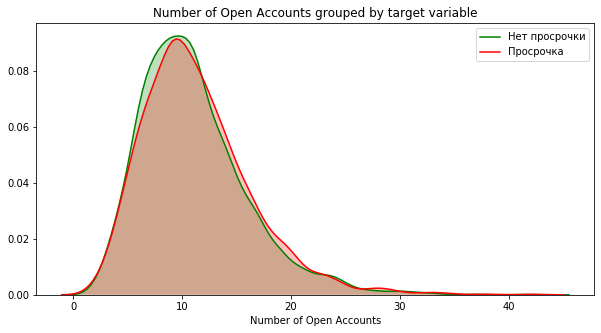

(0.9434478282928467, 0.0)


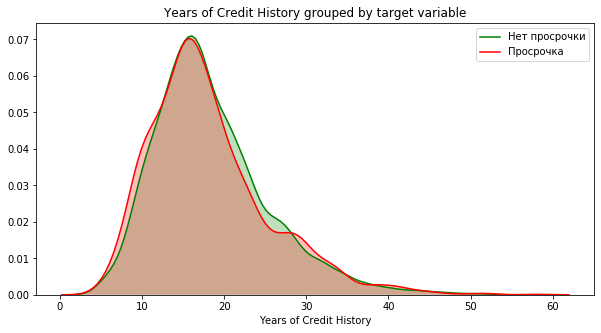

(nan, 1.0)


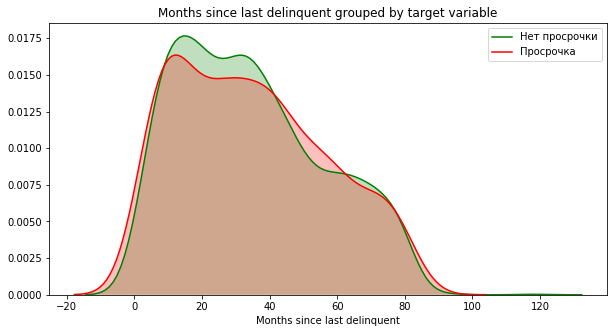

(0.37670987844467163, 0.0)


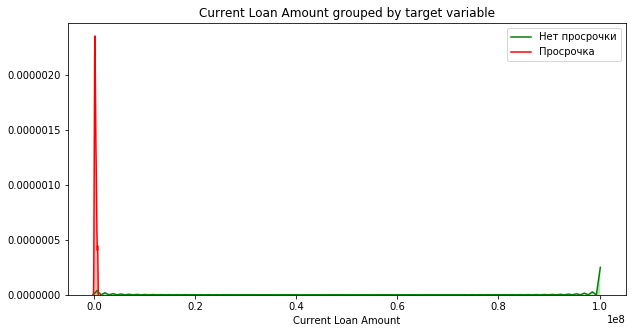

(0.6394237279891968, 0.0)


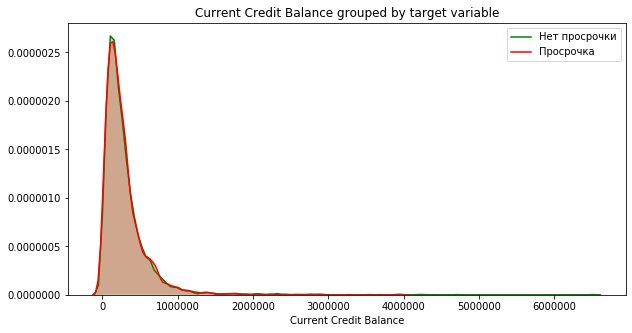

(0.8937593698501587, 0.0)


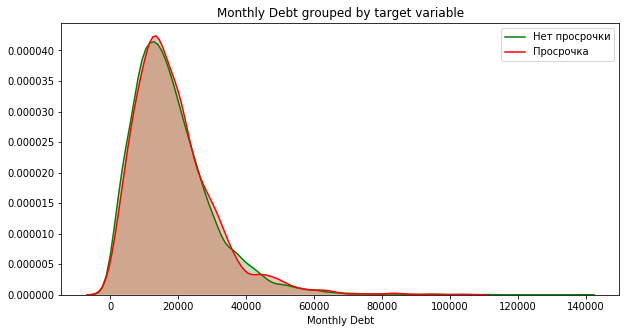

(nan, 1.0)


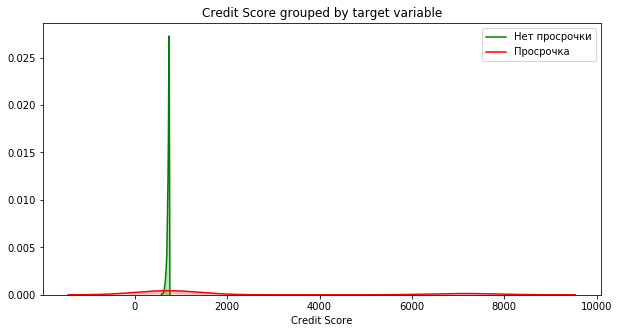

(0.563366174697876, 0.0)


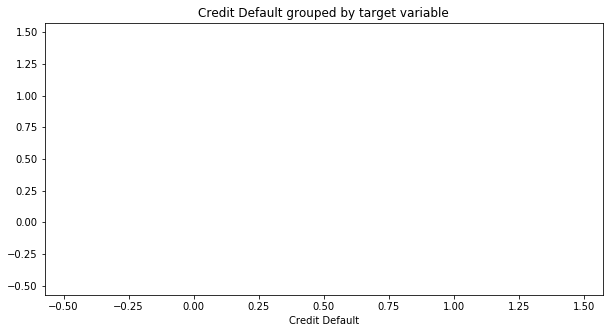

(nan, 1.0)


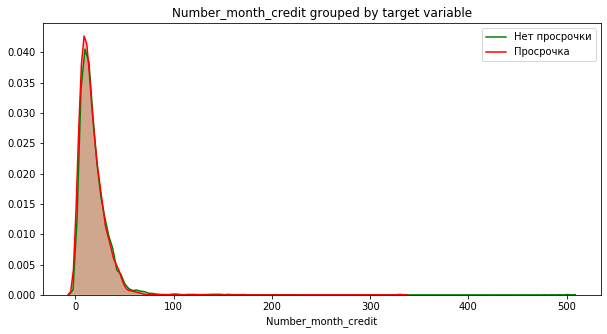

(0.954914927482605, 4.217908377617699e-43)


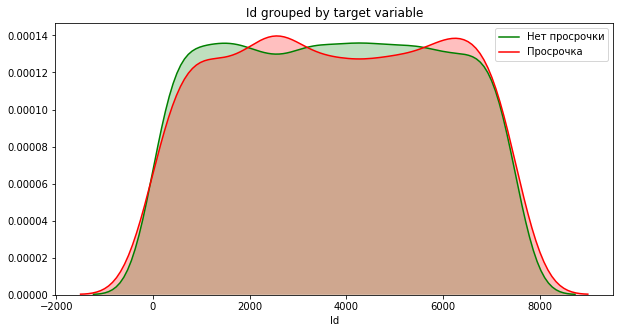

In [61]:
NUM_FEATURE_NAMES = ['Annual Income','Number of Open Accounts',
       'Years of Credit History',
        'Months since last delinquent',
        'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default', 'Number_month_credit',
       'Id']
for feature in NUM_FEATURE_NAMES:
    limit_bal_with_target = df_train[[feature, TARGET_NAME]]
    limit_bal = limit_bal_with_target[feature]
    limit_bal_target_0 = limit_bal[limit_bal_with_target[TARGET_NAME] == 0]
    limit_bal_target_1 = limit_bal[limit_bal_with_target[TARGET_NAME] == 1]

    plt.figure(figsize=(10, 5))

    sns.kdeplot(limit_bal_target_0, shade=True, label='Нет просрочки', color='g')
    sns.kdeplot(limit_bal_target_1, shade=True, label='Просрочка', color='r')

    plt.xlabel(f'{feature}')
    plt.title(f'{feature} grouped by target variable')
    print(shapiro(limit_bal))
    plt.show()

**Наблюдение**

Похоже что две группы, полученные в результате разбиения признака "LIMIT_BAL" по целевой переменной, имеют различные распределения, что может помочь при построение модели, т.к. это будет означать, что между признаком "LIMIT_BAL" и целевой переменной, возможно, существует некоторая функциональная зависимость.

**Гипотеза** 
* Нулевая гипотеза: средние значения в двух независимых выборках равны
* Альтернативная гипотеза: средние значения в двух независимых выборках различаются
* Критерий: критерий Стьюдента (t-тест) и его аналоги
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Что бы проверить данную гипотезу сравним две выборки из рассматриваемых групп на предмет равенства средних значений.
Если вероятность того, что мат. ожидания в исходных группах равны, при данных выборках, будет менее 5%, то можно будет говорить о том, что скорее всего выборки имеют различные распределения.

### По полученному значению p-value, которое сильно меньше 0.05, можем заключить, что гипотеза о "нормальности" отвергается.

**Оценка признака "Current Loan Amount" в разрезе целевой переменной**

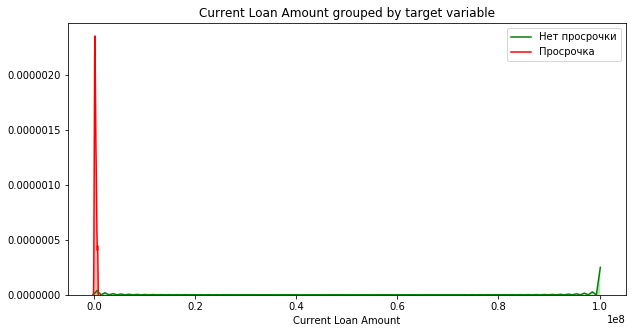

In [62]:
limit_bal_with_target = df_train[['Current Loan Amount', TARGET_NAME]]
limit_bal = limit_bal_with_target['Current Loan Amount']
limit_bal_target_0 = limit_bal[limit_bal_with_target[TARGET_NAME] == 0]
limit_bal_target_1 = limit_bal[limit_bal_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(limit_bal_target_0, shade=True, label='Нет просрочки', color='g')
sns.kdeplot(limit_bal_target_1, shade=True, label='Просрочка', color='r')

plt.xlabel('Current Loan Amount')
plt.title('Current Loan Amount grouped by target variable')
plt.show()

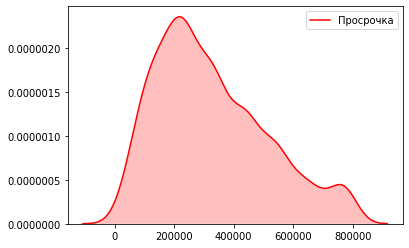

In [63]:
sns.kdeplot(limit_bal_target_1, shade=True, label='Просрочка', color='r')

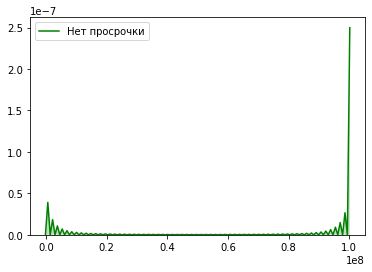

In [64]:
sns.kdeplot(limit_bal_target_0, shade=True, label='Нет просрочки', color='g')

*Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка*

In [65]:
shapiro(limit_bal)

(0.37670987844467163, 0.0)

## *Для достоверности произведём визуальную оценку распределения признака, а так же построим QQ-график*

MannwhitneyuResult(statistic=5534342.5, pvalue=0.031334788783133206)


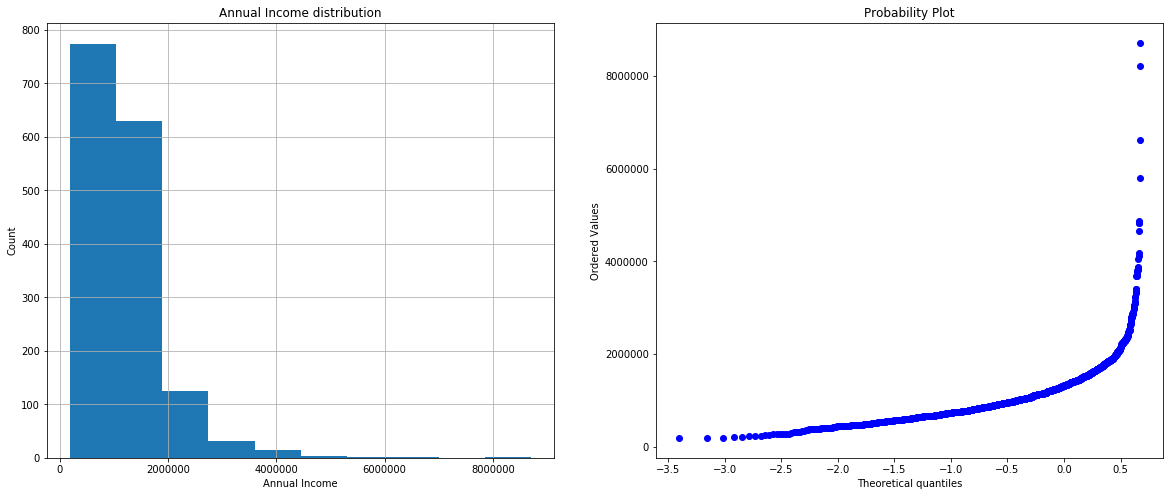

MannwhitneyuResult(statistic=5652588.5, pvalue=0.02256138327362573)


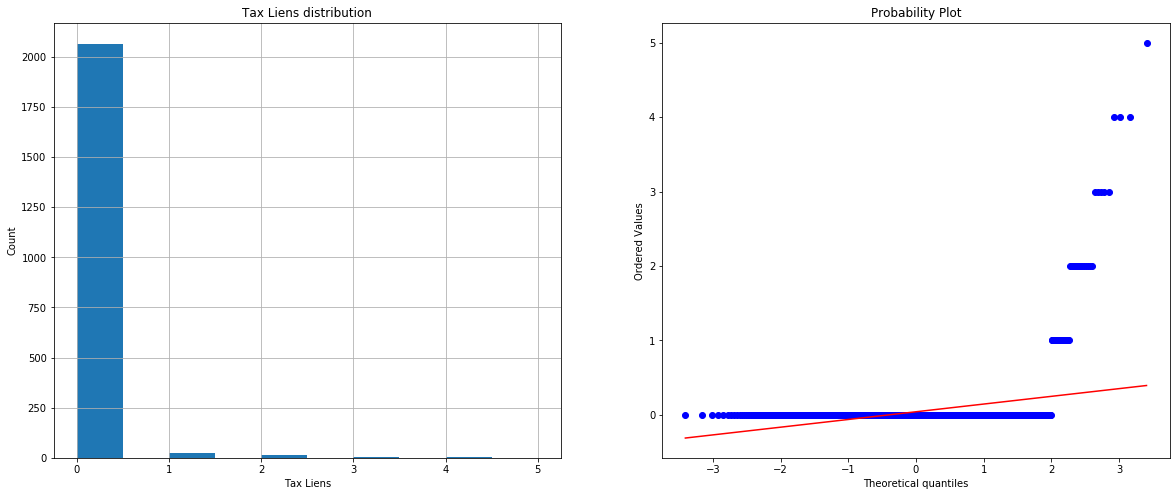

MannwhitneyuResult(statistic=5466480.0, pvalue=0.003761646078803518)


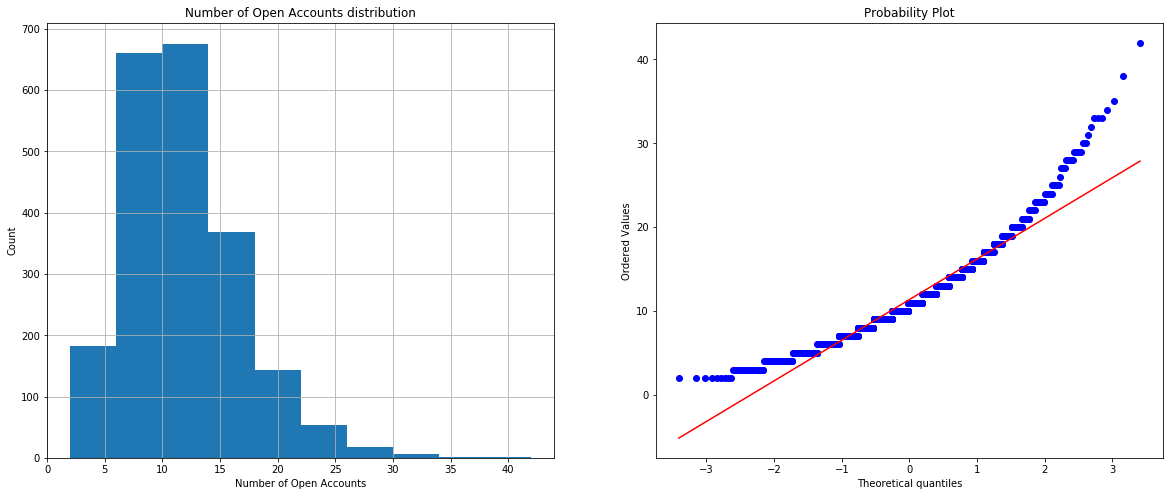

MannwhitneyuResult(statistic=5461129.5, pvalue=0.003171215731103466)


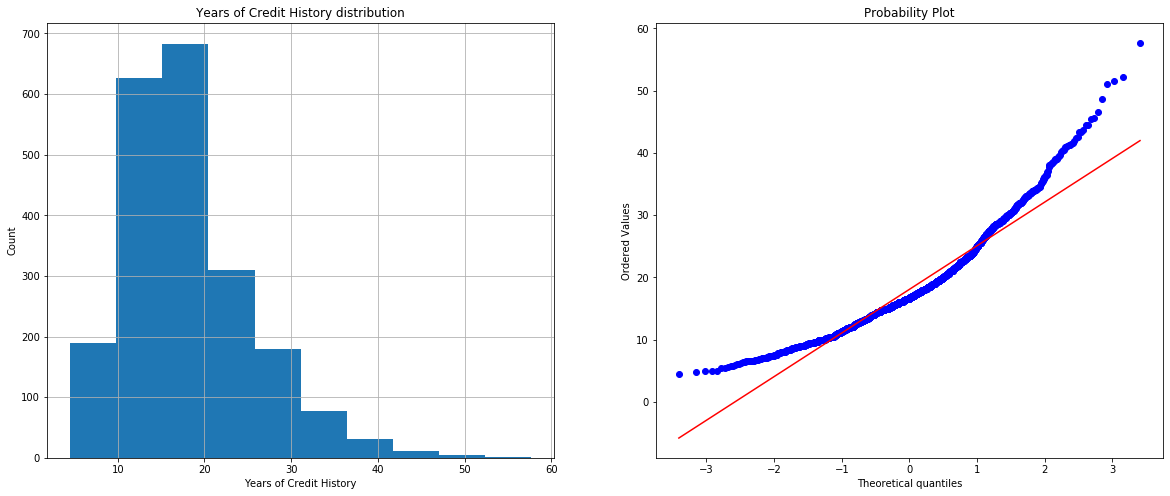

MannwhitneyuResult(statistic=5230602.0, pvalue=2.3483604148529427e-08)


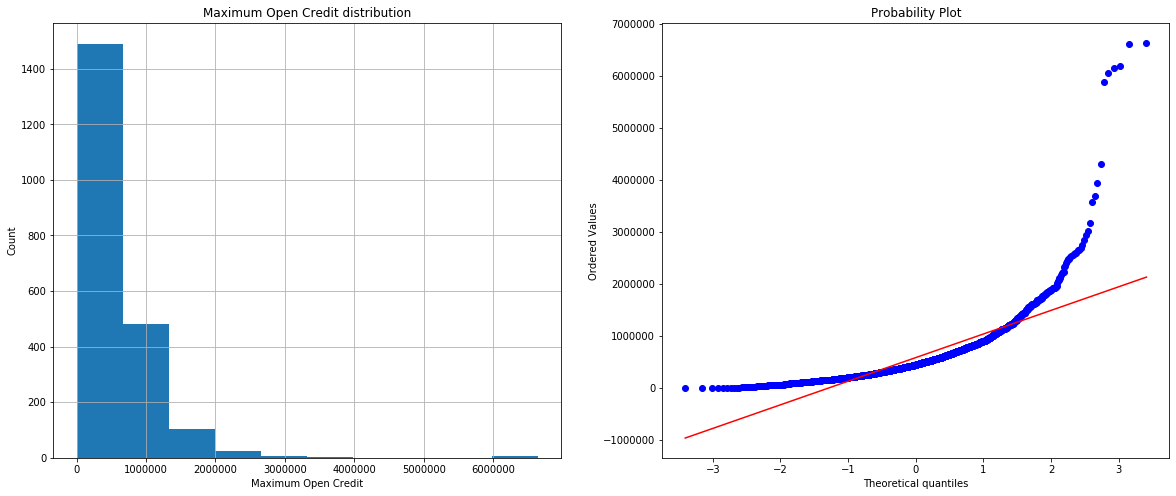

MannwhitneyuResult(statistic=5655742.5, pvalue=0.23974551535317956)


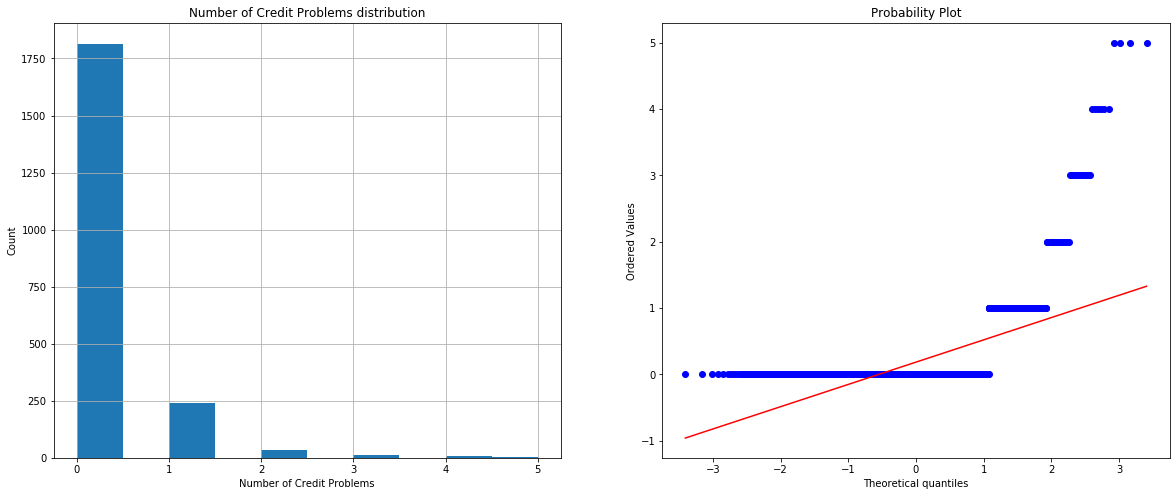

MannwhitneyuResult(statistic=4187753.5, pvalue=2.2303574646660457e-71)


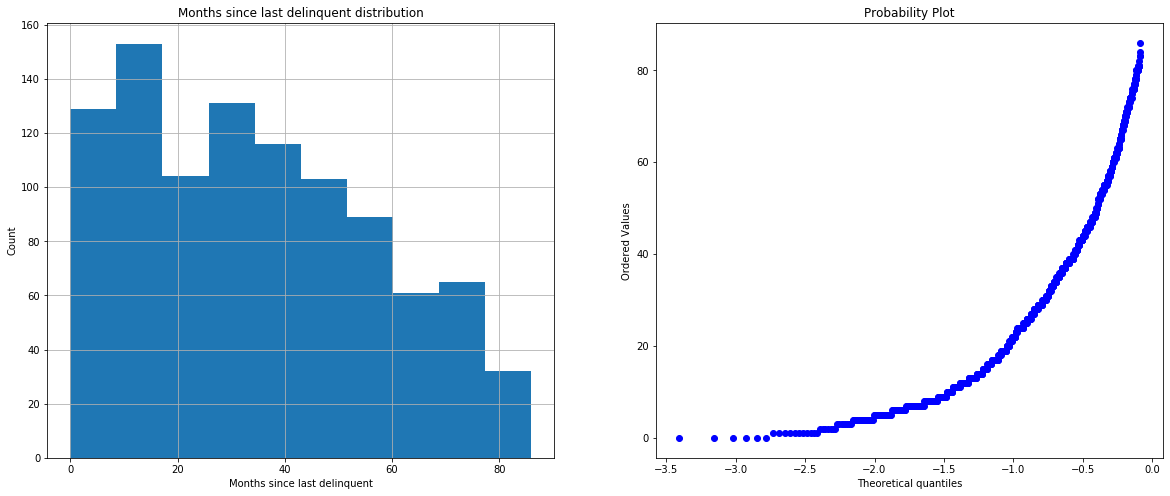

MannwhitneyuResult(statistic=5686353.0, pvalue=0.4567074598086799)


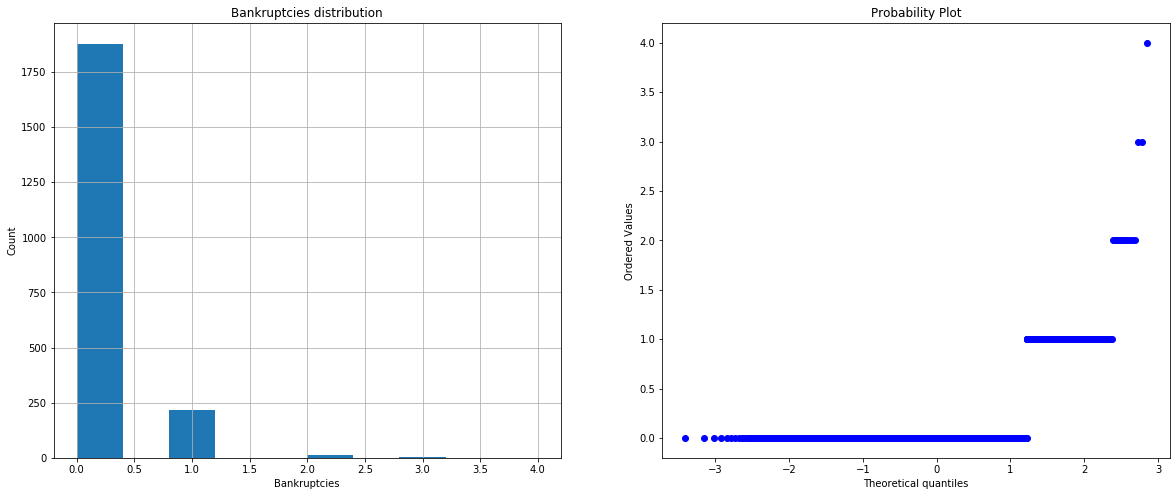

MannwhitneyuResult(statistic=5169258.0, pvalue=2.923443678733522e-10)


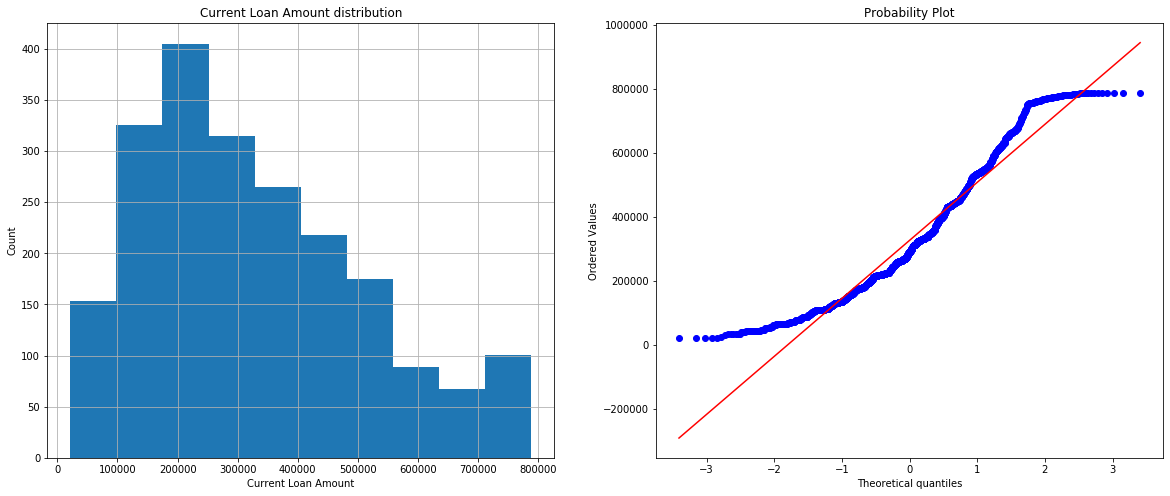

MannwhitneyuResult(statistic=5687957.0, pvalue=0.48388614709675304)


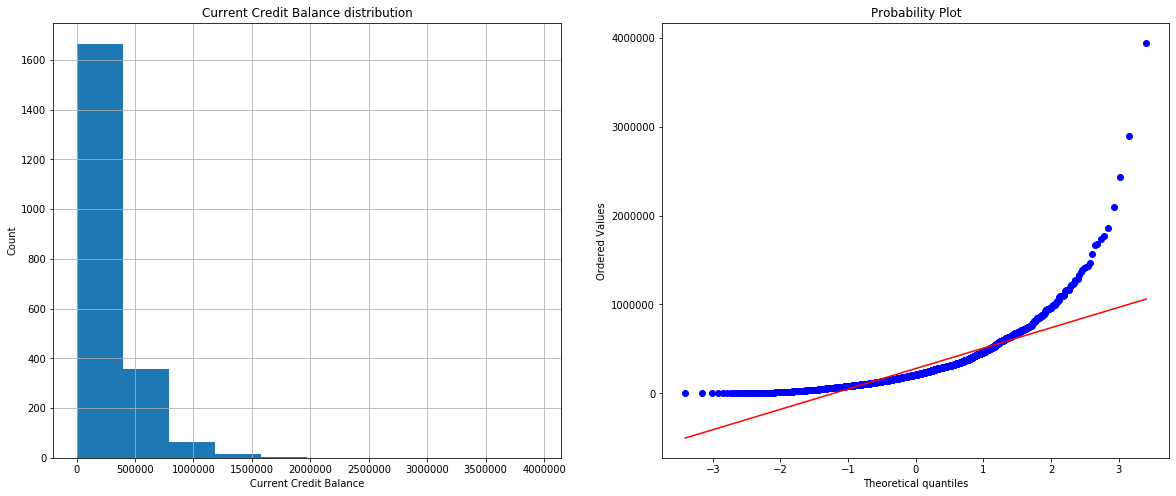

MannwhitneyuResult(statistic=5534935.5, pvalue=0.03183394406726229)


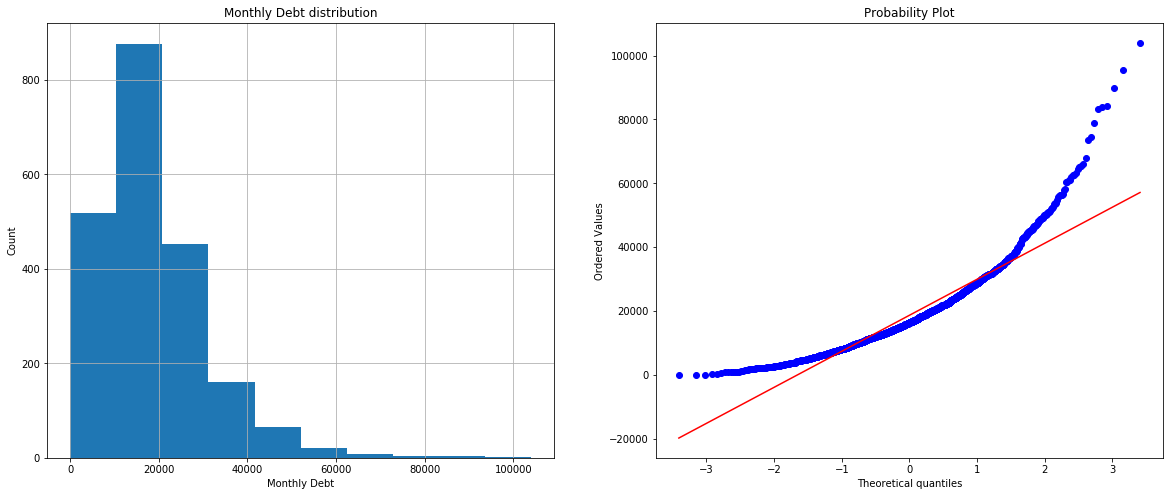

MannwhitneyuResult(statistic=5197665.0, pvalue=2.4094608408145815e-09)


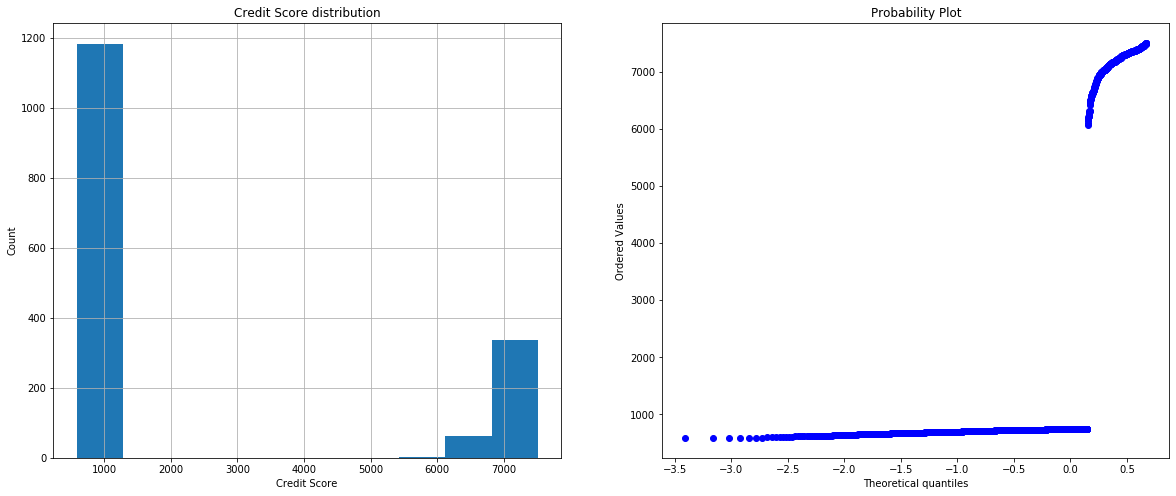

MannwhitneyuResult(statistic=5486247.0, pvalue=0.007513884442944197)


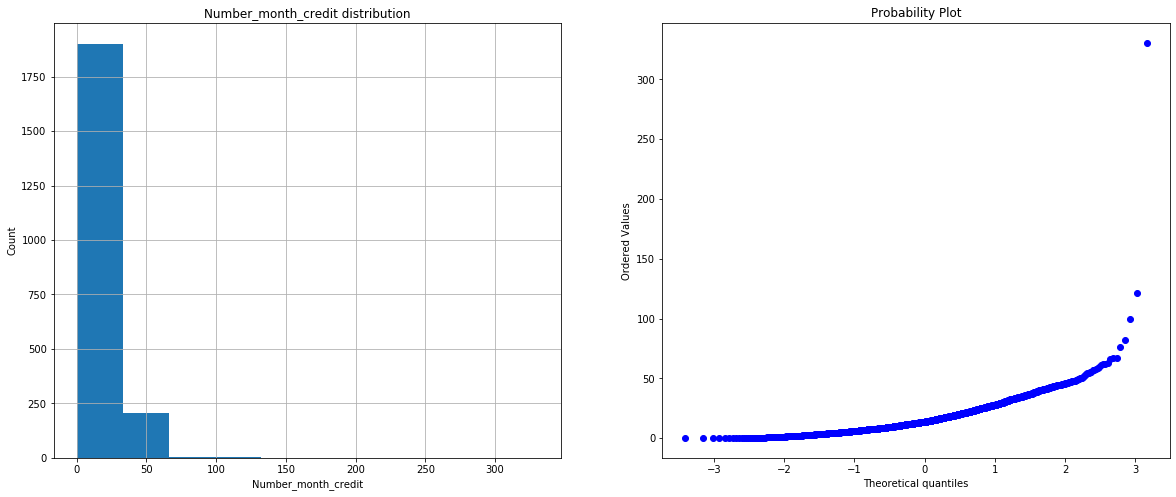

MannwhitneyuResult(statistic=5597445.0, pvalue=0.13276026432946442)


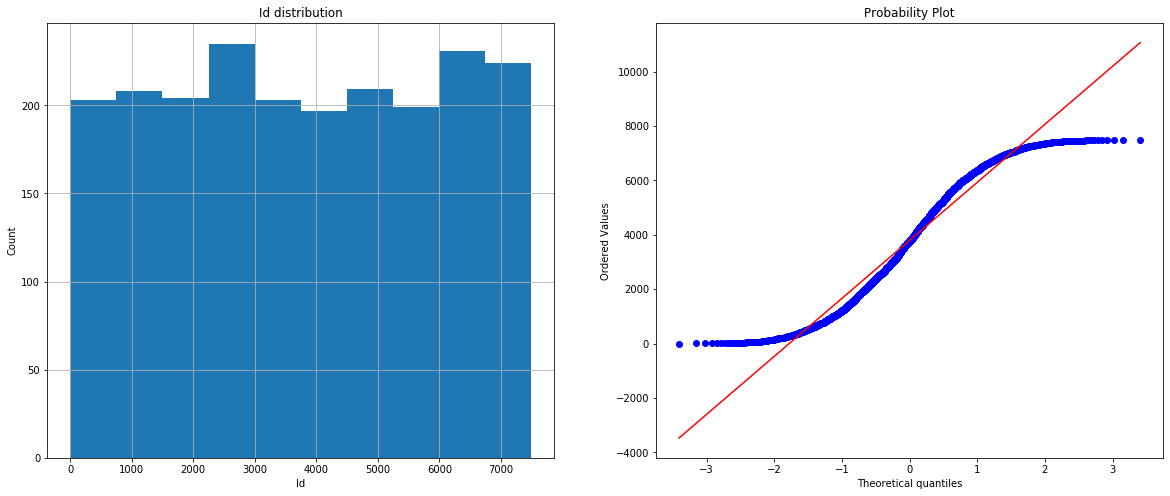

In [66]:
NUM_FEATURE_NAMES = ['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Number_month_credit',
       'Id']
# NUM_FEATURE_NAMES = ['Annual Income','Number of Open Accounts',
#        'Years of Credit History',
#         'Months since last delinquent',
#         'Current Loan Amount', 'Current Credit Balance',
#        'Monthly Debt', 'Credit Score', 'Credit Default', 'Number_month_credit',
#        'Id']
for feature in NUM_FEATURE_NAMES:
    limit_bal_with_target = df_train[[feature, TARGET_NAME]]
    limit_bal = limit_bal_with_target[feature]
    limit_bal_target_0 = limit_bal[limit_bal_with_target[TARGET_NAME] == 0]
    limit_bal_target_1 = limit_bal[limit_bal_with_target[TARGET_NAME] == 1]
    plt.figure(figsize=(20, 8))

    ax1 = plt.subplot(121)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count')
    ax1.set_title(f'{feature} distribution')
    limit_bal_target_1.hist()

    plt.subplot(122)
    probplot(limit_bal_target_1, dist='norm', plot=plt)
    print(mannwhitneyu(limit_bal_target_0, limit_bal_target_1))
    plt.show()

Визуальная оценка подтверждает показания критерия Шапиро-Уилка по поводу того, что закон распределения отличный от "нормального", в связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака LIMIT_BAL в группах с просроченным и непросроченным платежом в следующем месяце, но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

*Оценим эквивалентность мат. ожадиний, в исследуемых группах, с помощью критерия Манна-Уитни*

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается, но стоит ради дополнительной проверки обратиться к доверительным интервалам.

In [67]:
# mannwhitneyu(limit_bal_target_0, limit_bal_target_1)

*Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их*

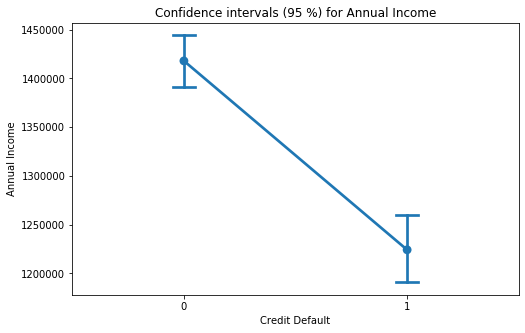

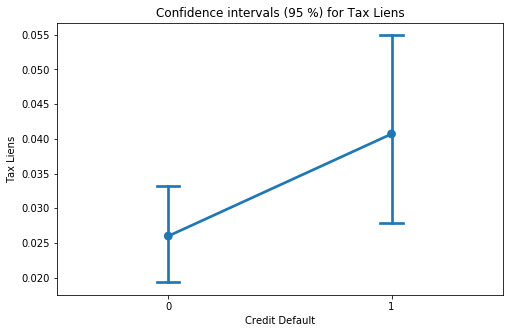

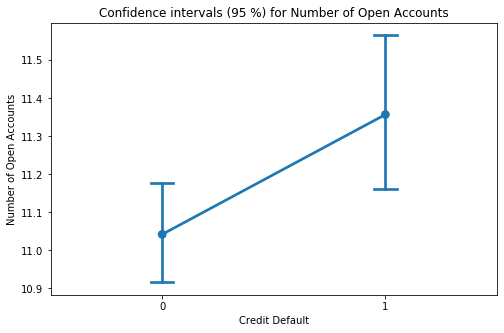

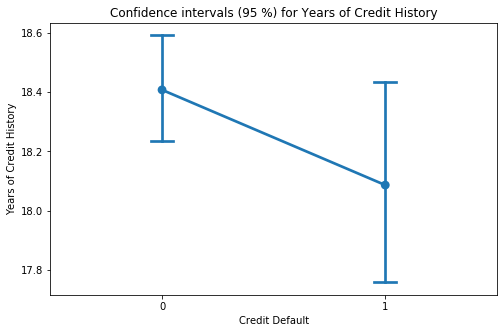

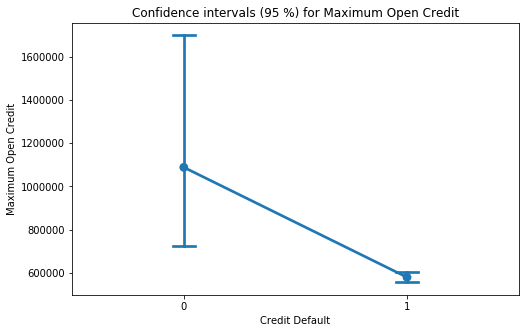

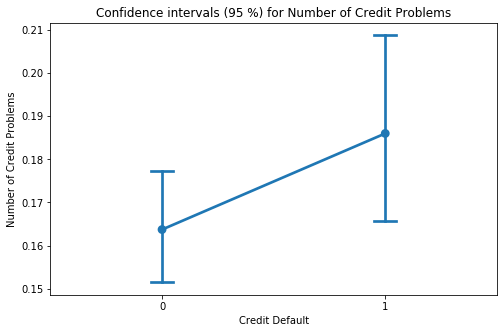

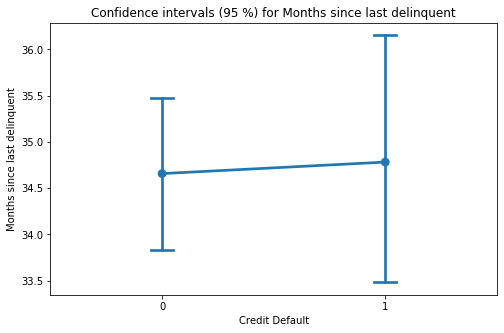

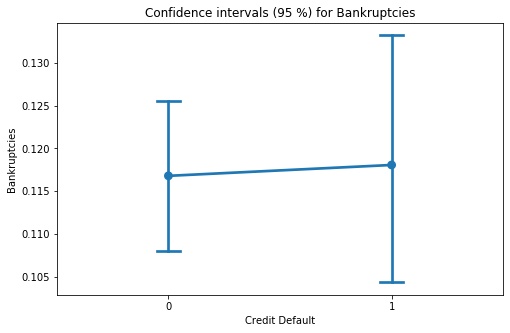

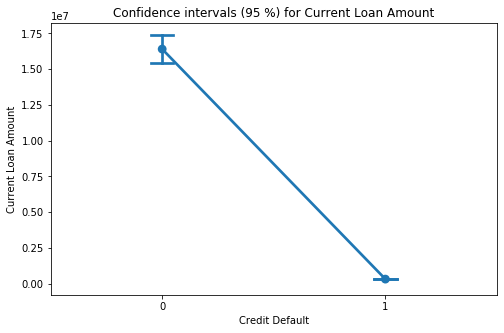

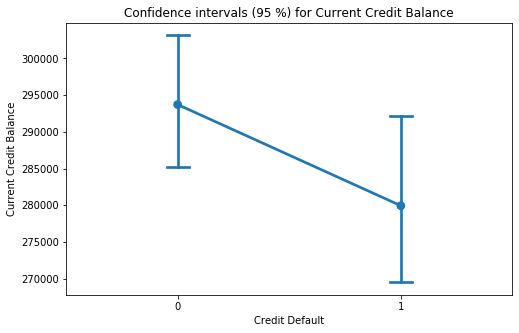

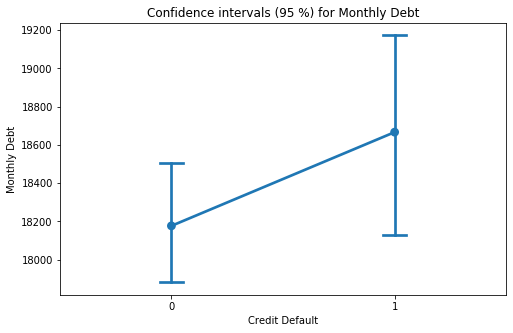

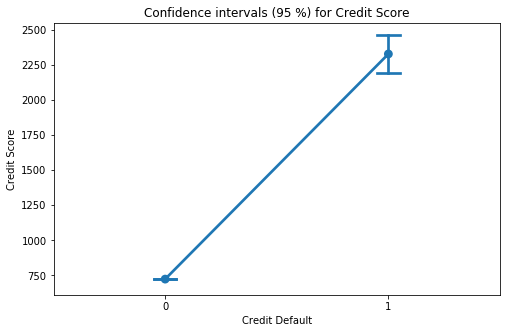

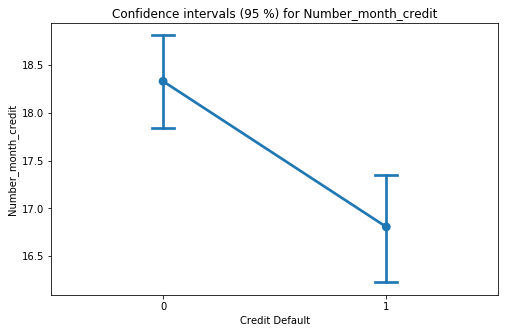

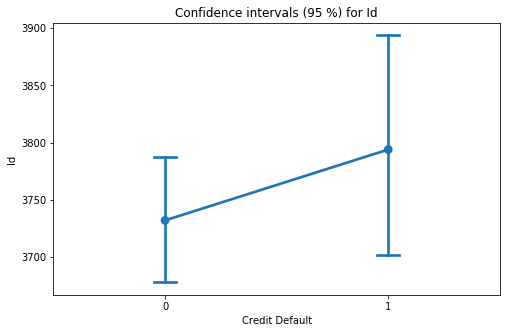

In [68]:
for feature in NUM_FEATURE_NAMES:
    limit_bal_with_target = df_train[[feature, TARGET_NAME]]
    plt.figure(figsize=(8, 5))

    sns.pointplot(x=TARGET_NAME, y= feature, data=limit_bal_with_target, capsize=.1)

    plt.title(f'Confidence intervals (95 %) for {feature}')
    plt.show()

По данному графику так же видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.

Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.

**Оценка признака "Monthly Debt" в разрезе целевой переменной**

In [69]:
PAY_AMT = 'Monthly Debt'

pay_amt_with_target = df_train[[PAY_AMT, TARGET_NAME]]
pay_amt = pay_amt_with_target[PAY_AMT]
pay_amt_target_0 = pay_amt[pay_amt_with_target[TARGET_NAME] == 0]
pay_amt_target_1 = pay_amt[pay_amt_with_target[TARGET_NAME] == 1]

In [70]:
mannwhitneyu(pay_amt_target_0, pay_amt_target_1)

MannwhitneyuResult(statistic=5534935.5, pvalue=0.03183394406726229)

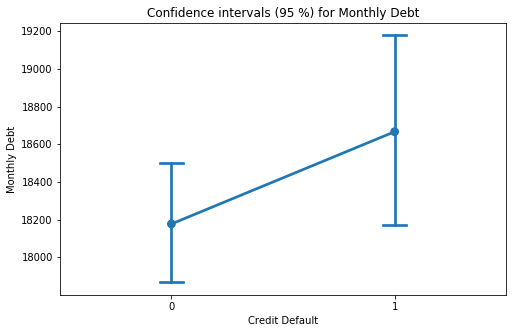

In [71]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y=PAY_AMT, data=pay_amt_with_target, capsize=.1)

plt.title(f'Confidence intervals (95 %) for {PAY_AMT}')
plt.show()

### Анализ признакового пространства<a class="anchor" id="features_analysis"></a>

**Матрица корреляций**

- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только __линейной__ связи

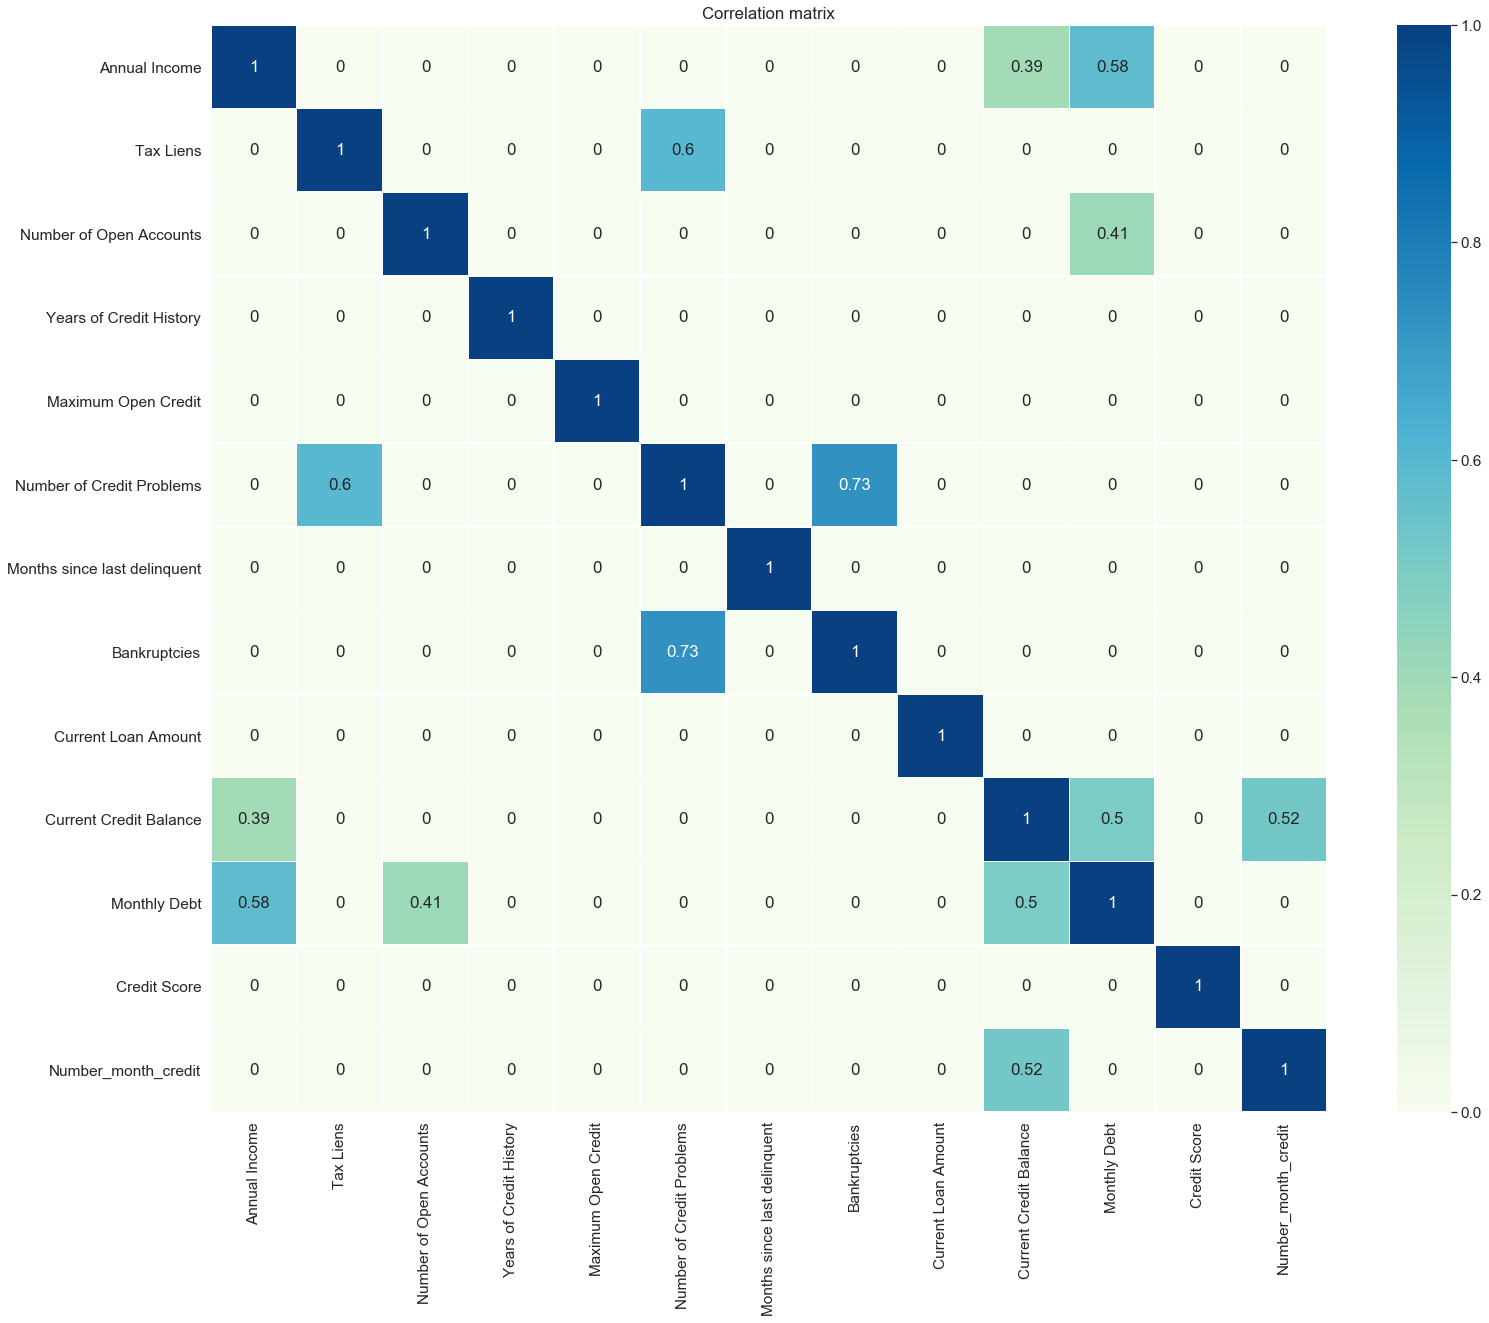

In [72]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = df_train[BASE_FEATURE_NAMES].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [73]:
from sklearn.metrics import mutual_info_score

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

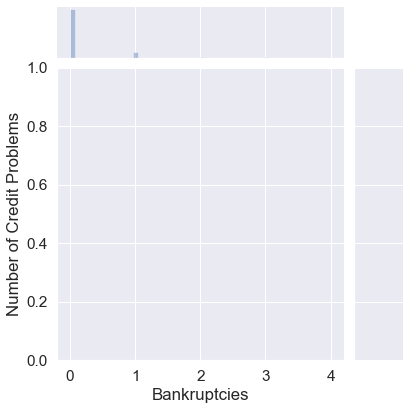

In [75]:
sns.jointplot(df_train['Bankruptcies'], df_train['Number of Credit Problems'], kind='reg');

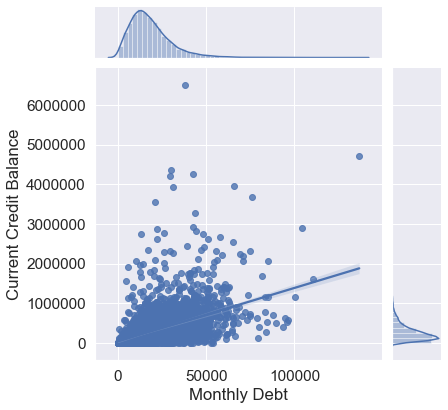

In [76]:
sns.jointplot(df_train['Monthly Debt'], df_train['Current Credit Balance'], kind='reg');

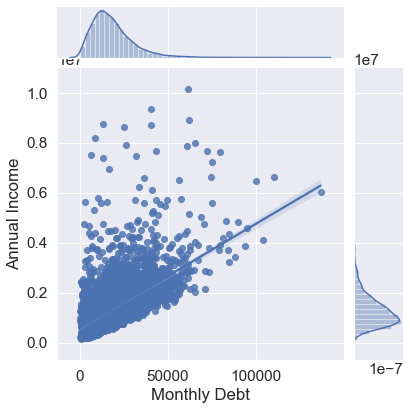

In [77]:
sns.jointplot(df_train['Monthly Debt'], df_train['Annual Income'], kind='reg');

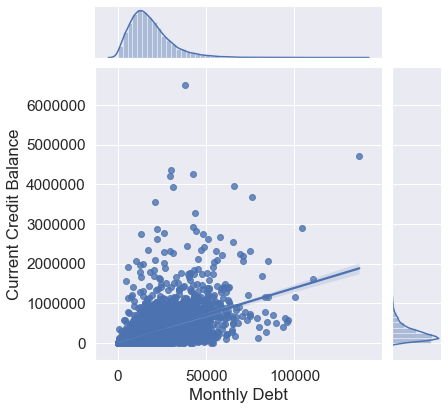

In [78]:
sns.jointplot(df_train['Monthly Debt'], df_train['Current Credit Balance'], kind='reg');

In [79]:
# TRAIN_DATASET_PATH = 'data/course_project/train.csv'
TEST_DATASET_PATH = 'data/course_project/test.csv'

In [80]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head(3)

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years        0.0   
1           Rent       231838.0               1 year        0.0   
2  Home Mortgage      1152540.0              3 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                          70.0           0.0   
1                        0.0                           8.0           0.0   
2                        0.0                           NaN           0.0   

                Purpose        Term  Current Loan Amount  \
0    debt consolidation  Short Term             162470.0   
1  educational expenses  Short Term              78298.0   
2    debt consolidation  Short Term             200178.0   

   Current Credit Balance  Monthly Debt  Credit Score  
0                105906.0        6813.0           NaN  
1                 46037.0        2318.0         699.0  
2                146490.0       18729.0        7260.0

In [81]:
Test = df_test.copy()
# test.head(3)

In [82]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [83]:
train['Credit Default'].value_counts(normalize=True)

0    0.718333
1    0.281667
Name: Credit Default, dtype: float64

In [84]:
# test['Credit Default'].value_counts(normalize=True)

**Проверим распределения вещественных признаков на трейне и тесте**

In [85]:
NUM_FEATURE_NAMES = ['Annual Income', 'Number of Open Accounts','Years of Credit History', 
 'Months since last delinquent',
  'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']


#  'Number_month_credit' - нет на тесте

Annual Income
MannwhitneyuResult(statistic=7457656.0, pvalue=0.340621282504211)


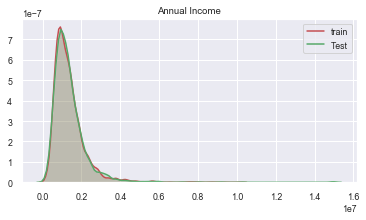

Number of Open Accounts
MannwhitneyuResult(statistic=7423351.0, pvalue=0.2280075566160809)


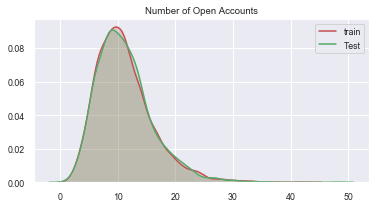

Years of Credit History
MannwhitneyuResult(statistic=7495582.0, pvalue=0.4829088366284467)


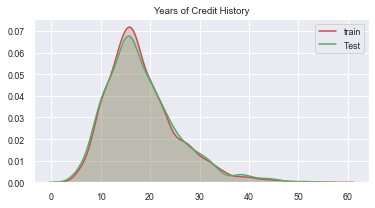

Months since last delinquent
MannwhitneyuResult(statistic=6025419.5, pvalue=1.0207243723482552e-46)


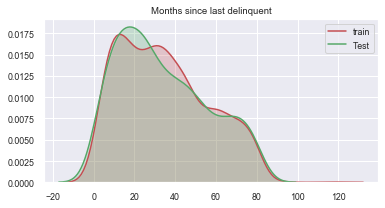

Current Loan Amount
MannwhitneyuResult(statistic=7402477.5, pvalue=0.17186578630550253)


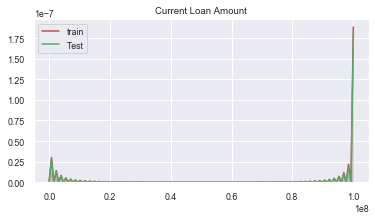

Current Credit Balance
MannwhitneyuResult(statistic=7465870.0, pvalue=0.37029000784208355)


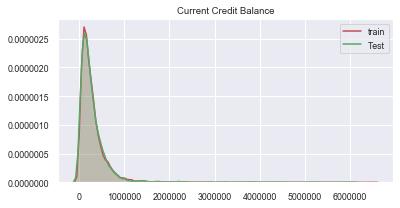

Monthly Debt
MannwhitneyuResult(statistic=7440542.0, pvalue=0.2820411518012792)


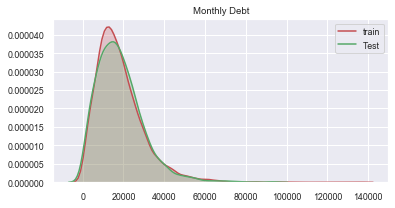

Credit Score
MannwhitneyuResult(statistic=7444639.0, pvalue=0.2956058822008451)


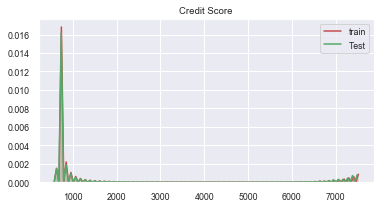

In [86]:
figsize = (6, 3)
for col in NUM_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(train[col], shade=True, label='train', color='r')
    sns.kdeplot(Test[col], shade=True, label='Test', color='g')
    print(col)
    print(mannwhitneyu(train[col], Test[col]))
    plt.legend()
    plt.title(col)
    plt.show()

In [87]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_train.select_dtypes(exclude=numerics)
newdf.columns

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')

In [88]:
CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

**Проверим распределения категориальных признаков на трейне и тесте**

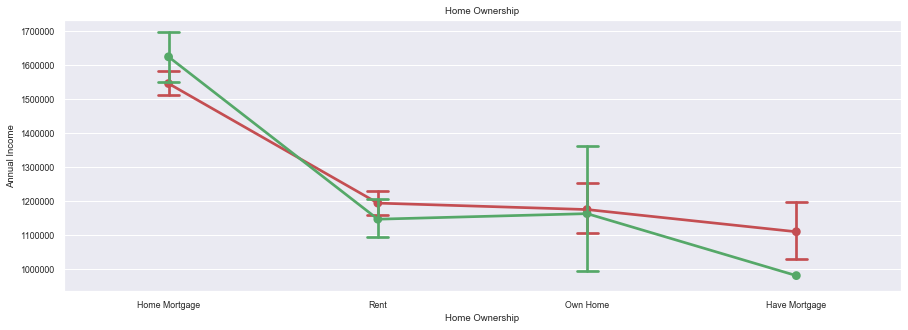

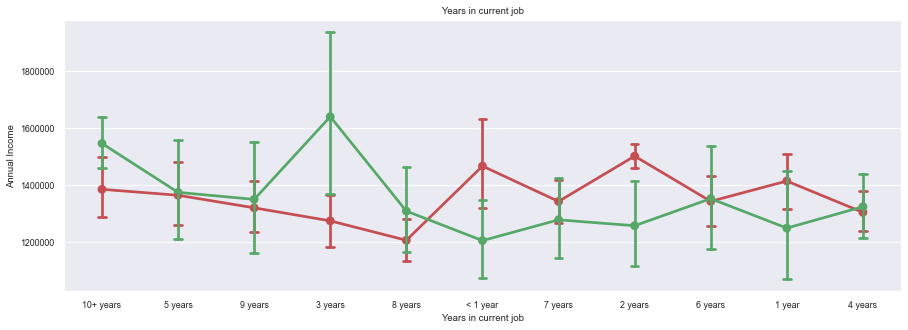

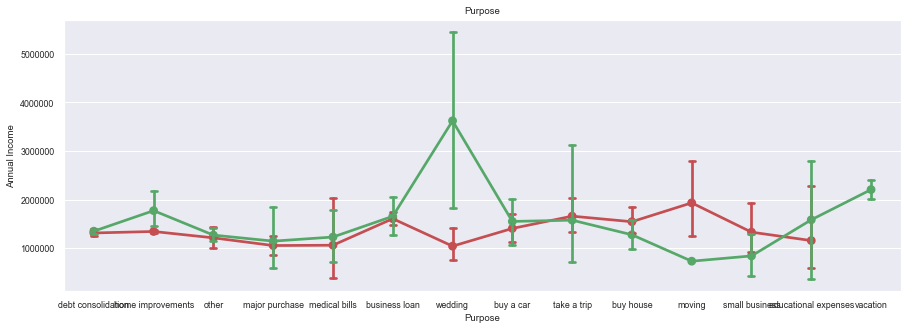

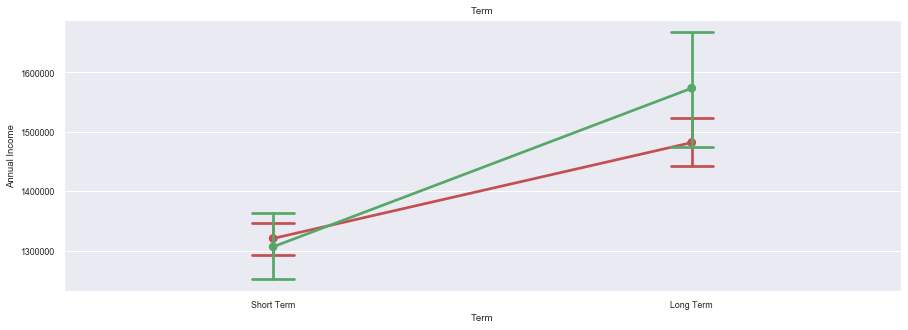

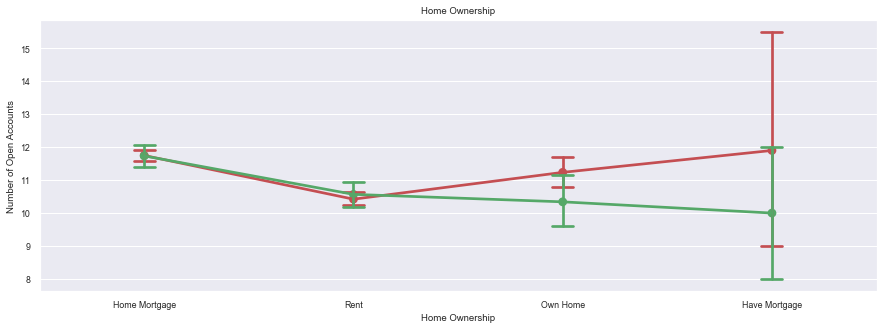

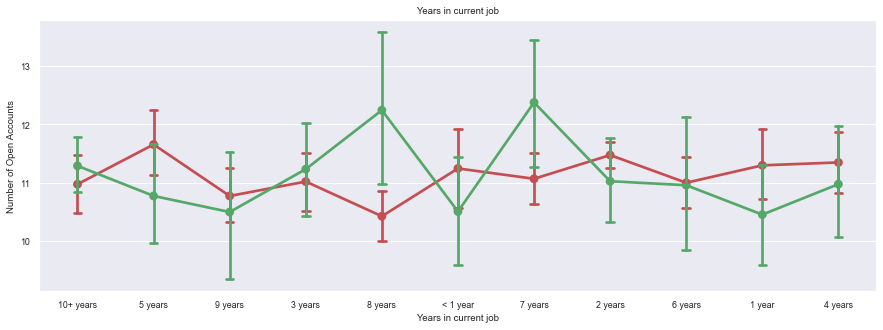

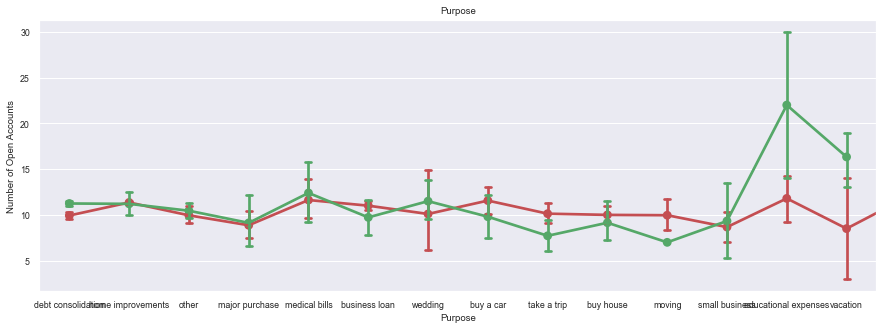

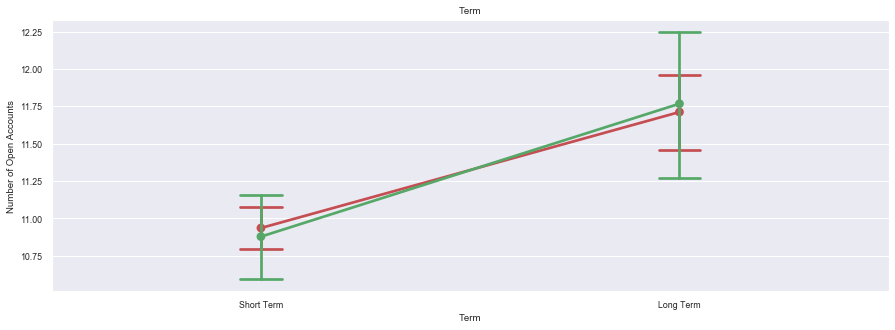

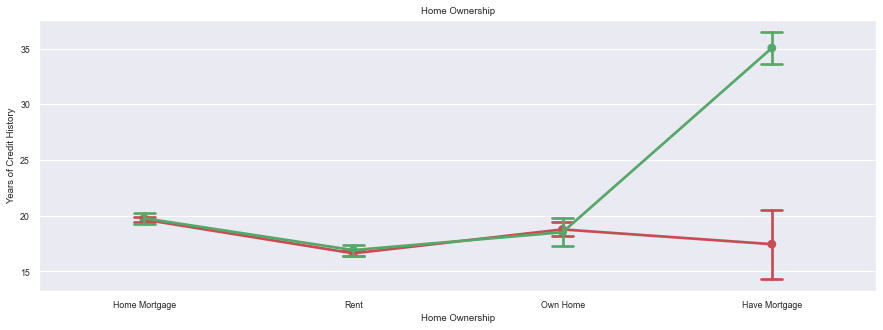

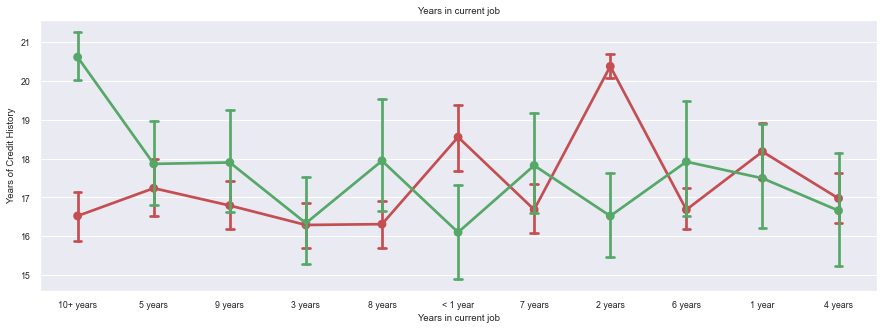

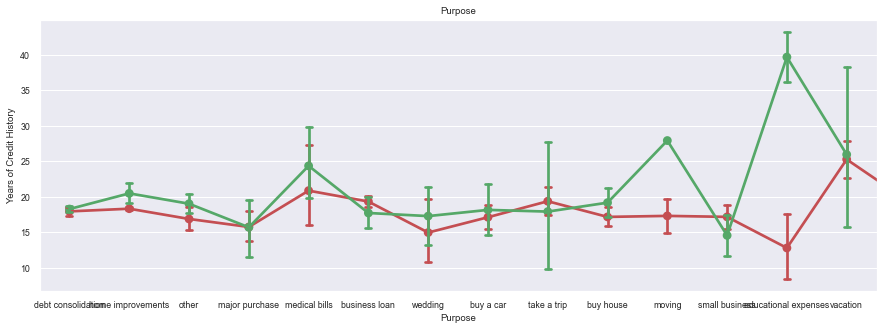

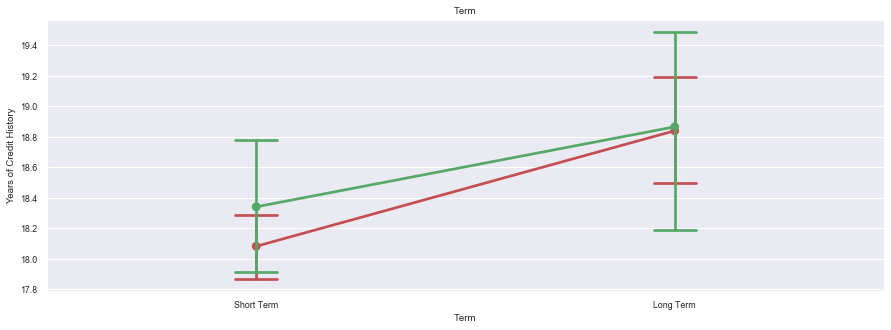

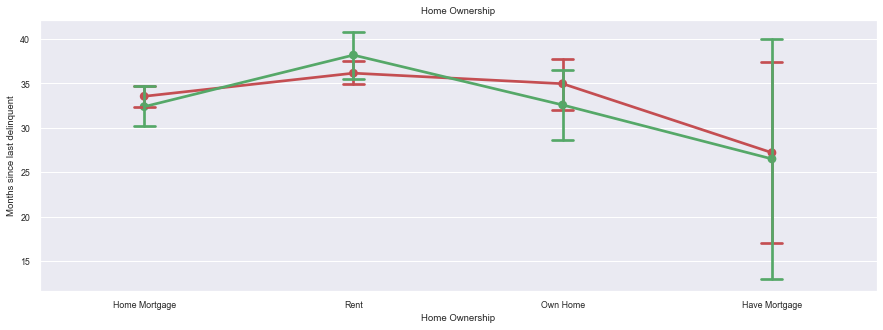

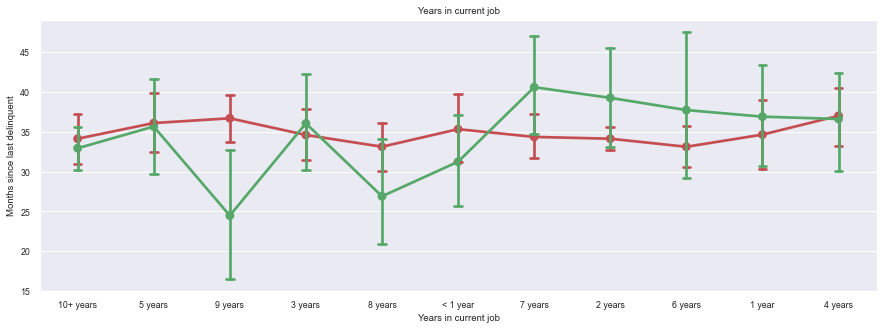

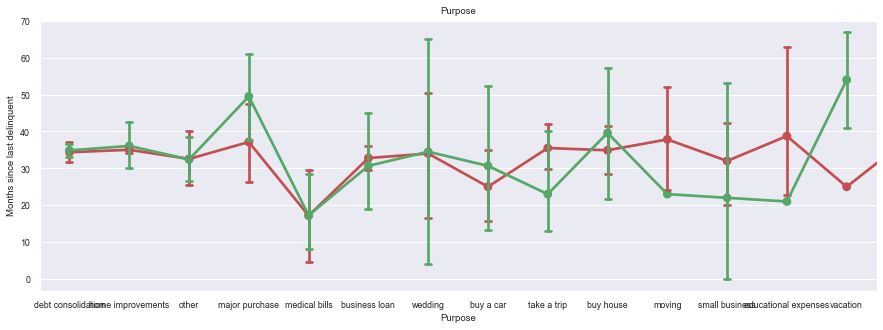

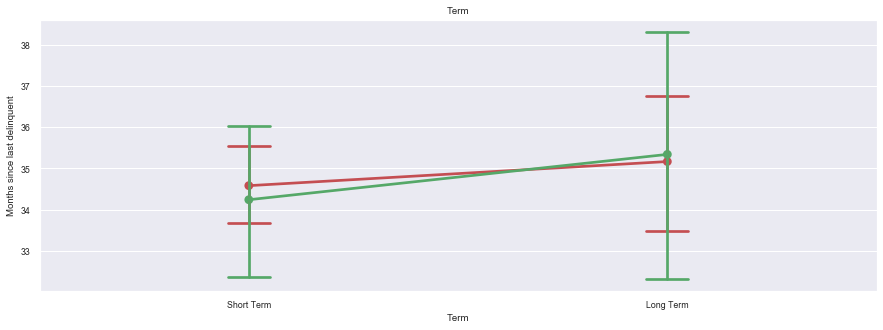

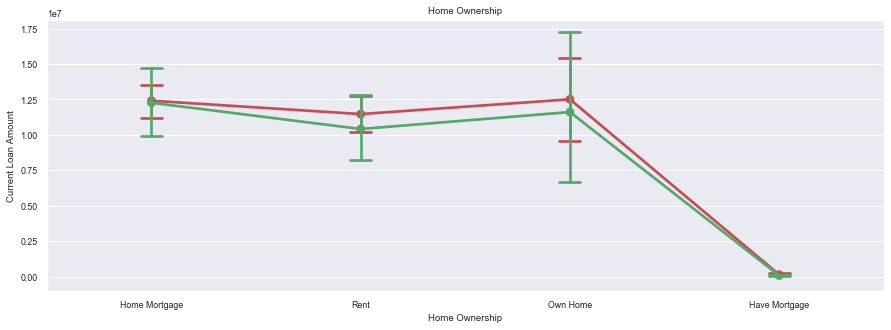

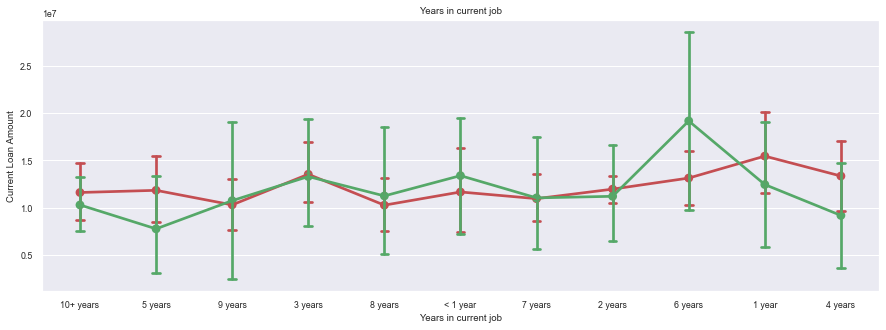

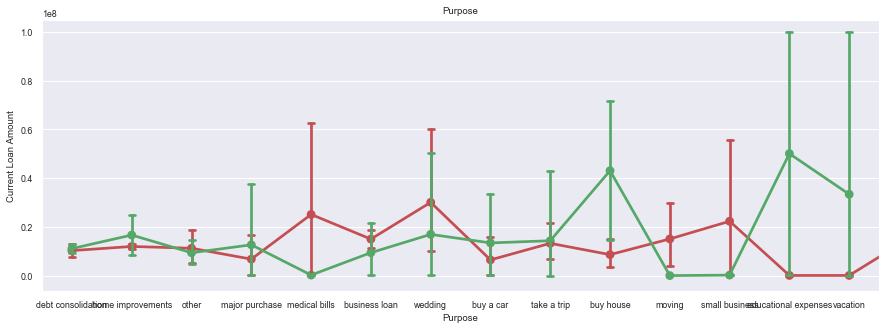

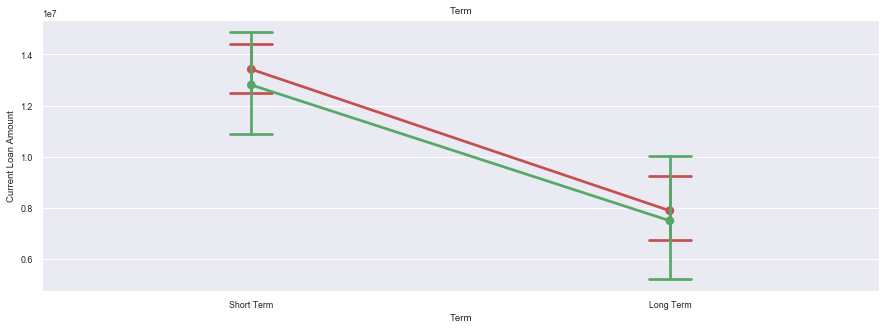

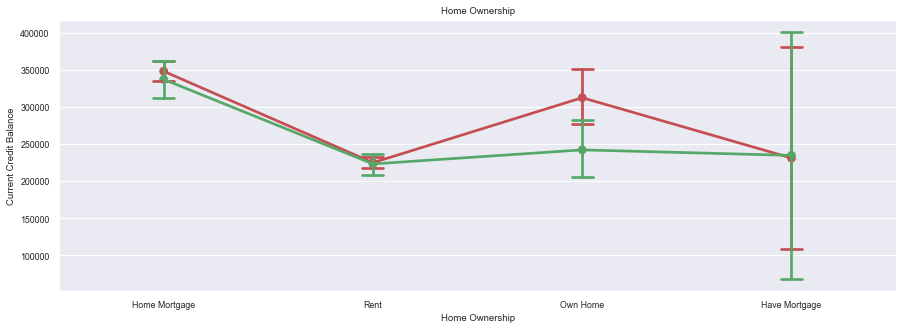

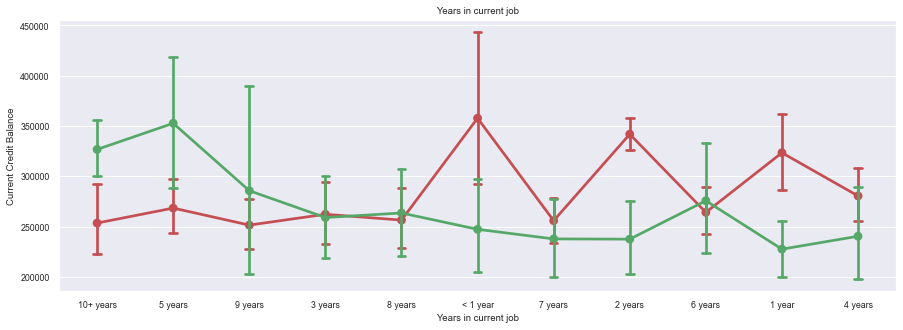

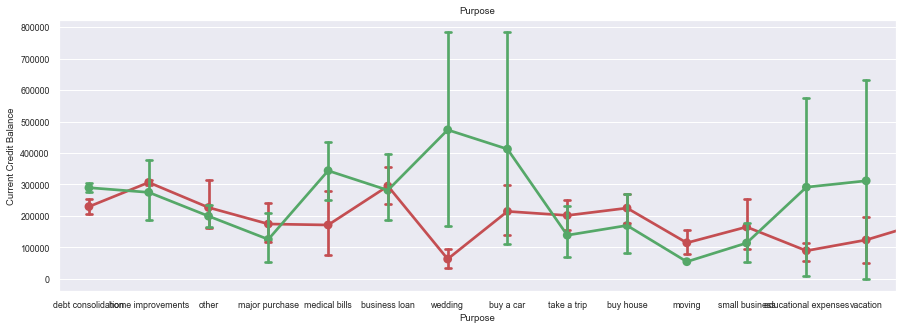

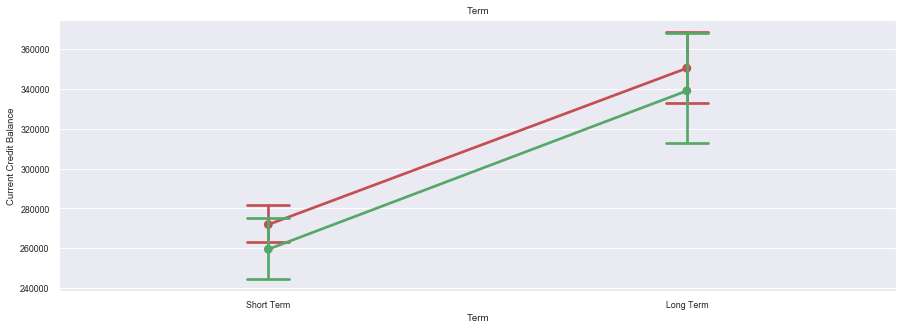

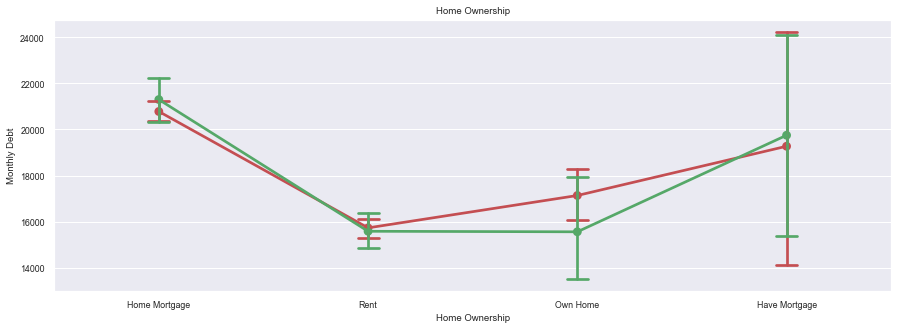

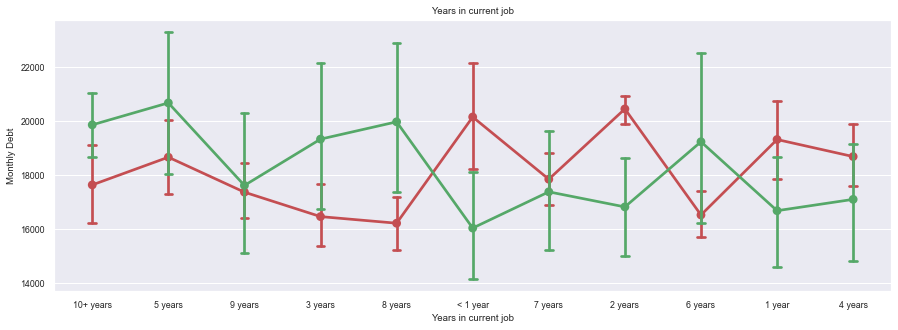

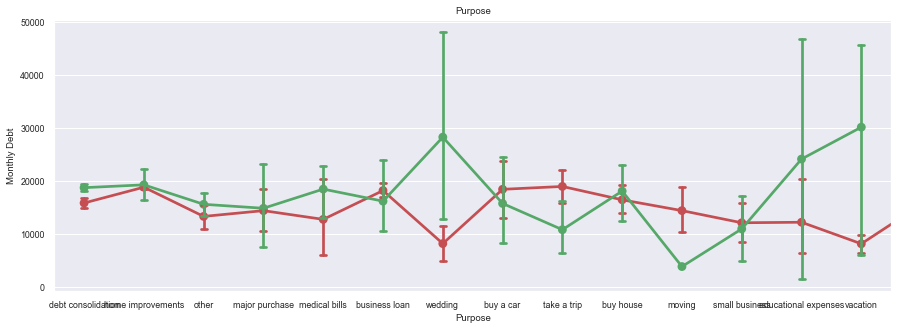

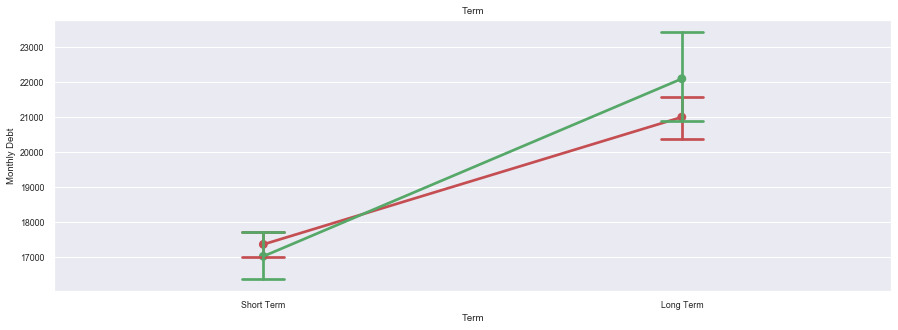

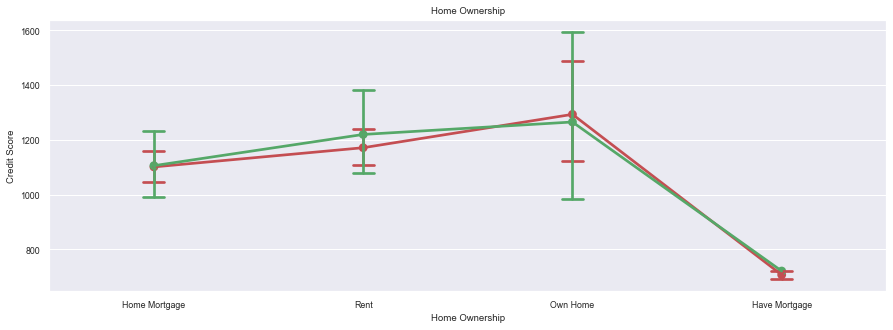

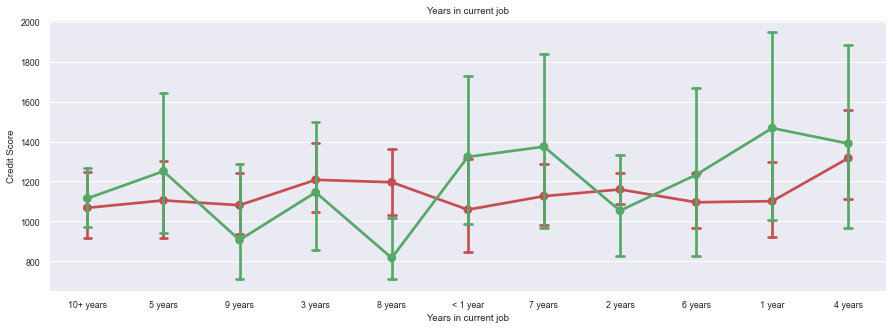

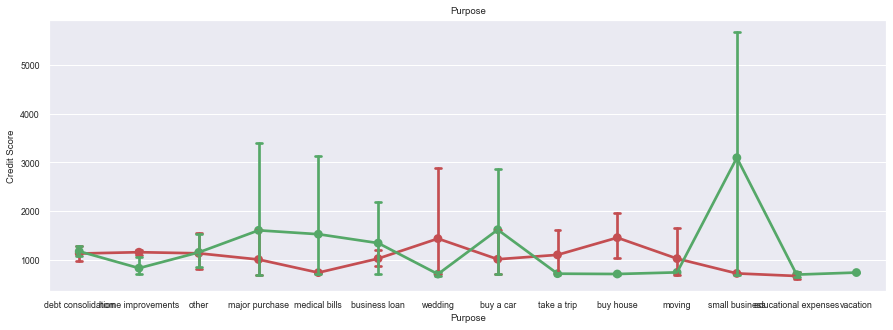

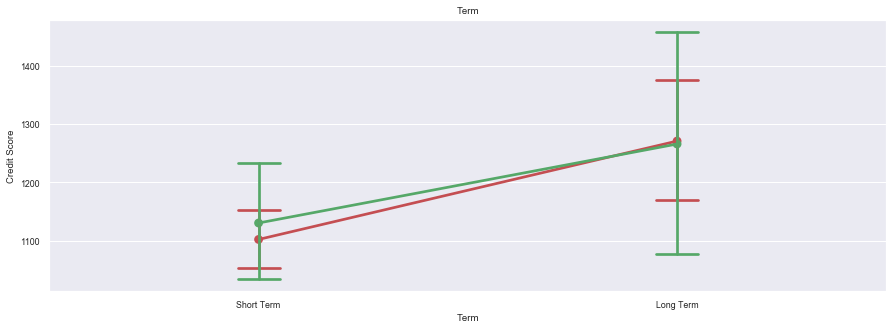

In [89]:
# num_feature = 'Current Loan Amount'
for num_feature in NUM_FEATURE_NAMES:
    for col in CAT_FEATURE_NAMES:
    #     plt.figure(figsize=figsize)
        plt.figure(figsize=(15, 5))
        sns.pointplot(x=col, y=num_feature, data=train, capsize=.1, label='train', color='r')
        sns.pointplot(x=col, y=num_feature, data=test, capsize=.1, label='Test', color='g')
        plt.title(col) 
        plt.show()

**Сократим количество значений в признаке**

In [90]:
train['Home Ownership'].unique()

array(['Home Mortgage', 'Rent', 'Own Home', 'Have Mortgage'], dtype=object)

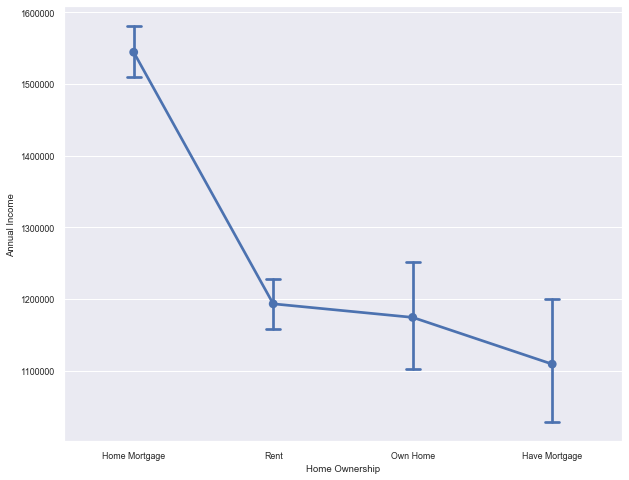

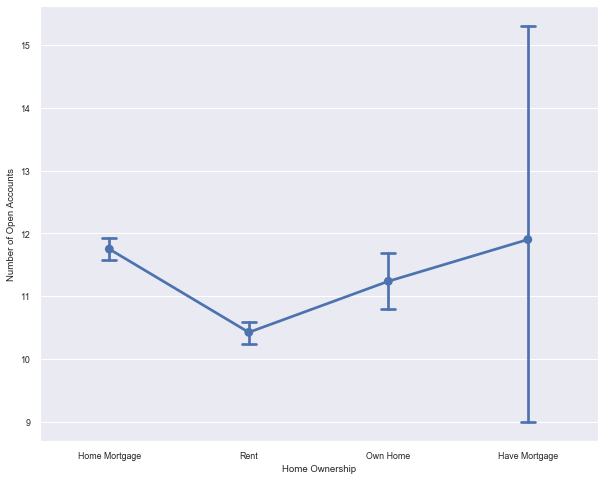

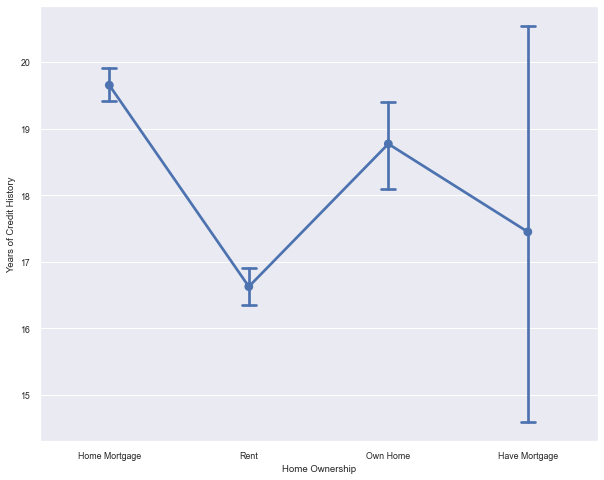

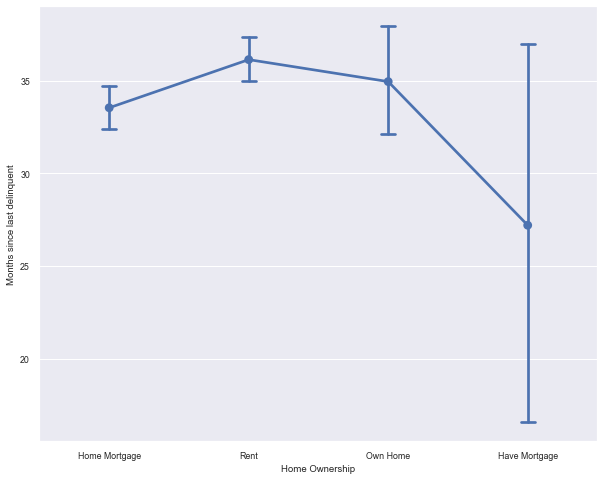

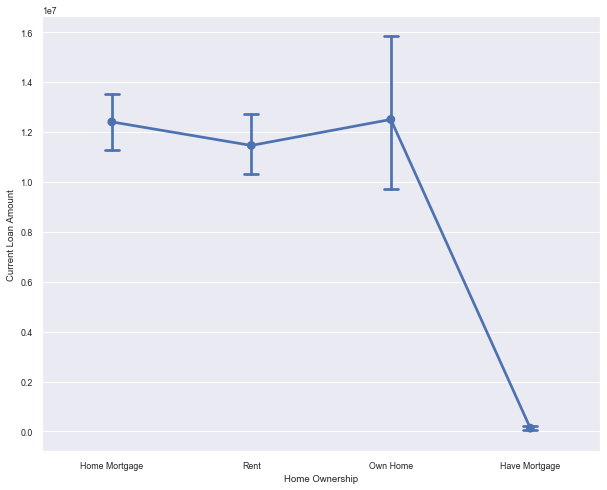

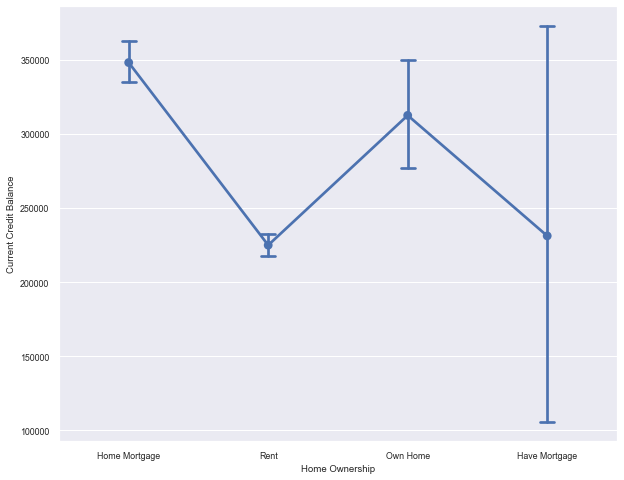

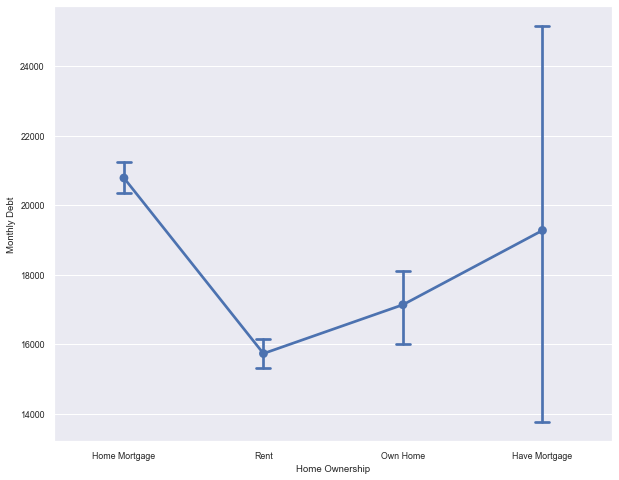

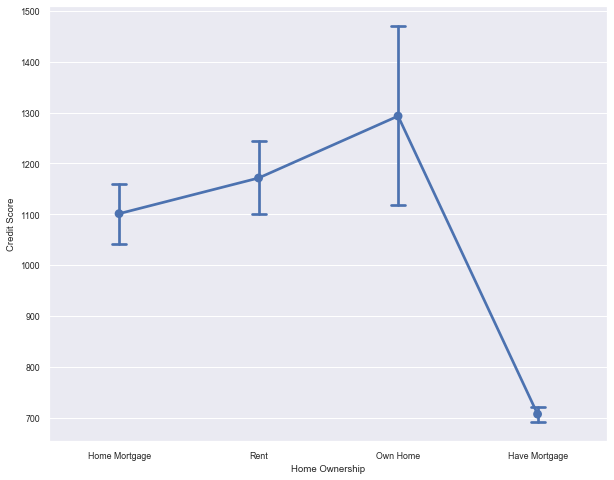

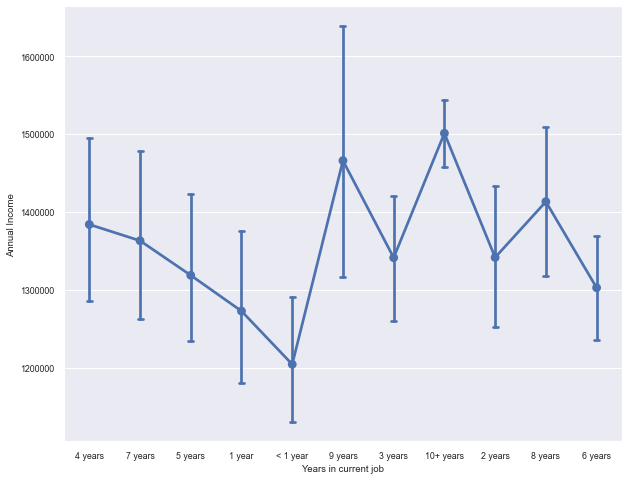

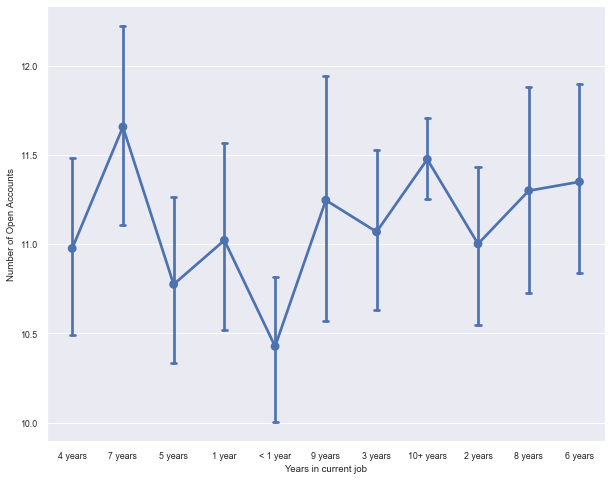

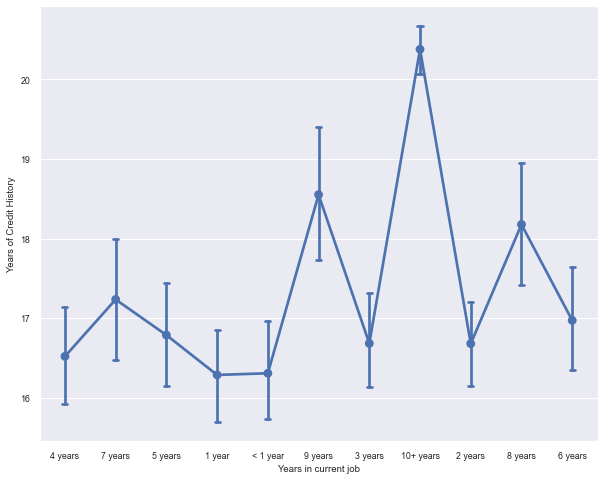

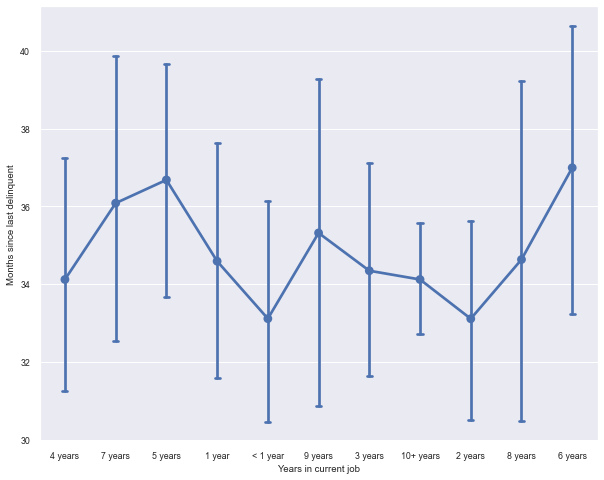

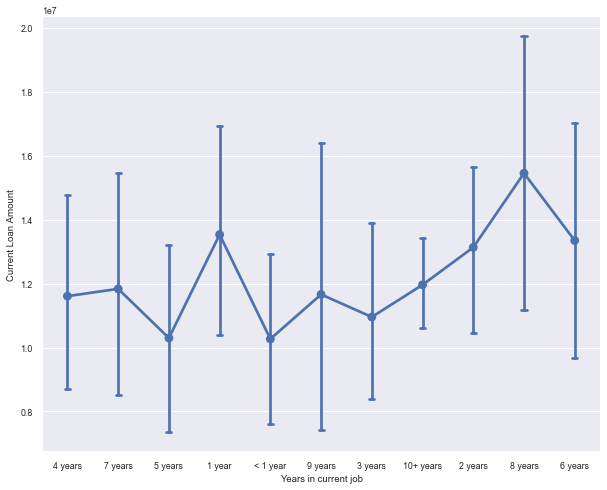

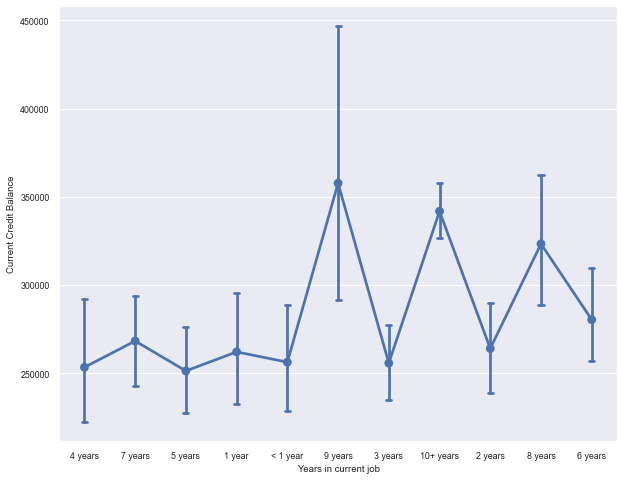

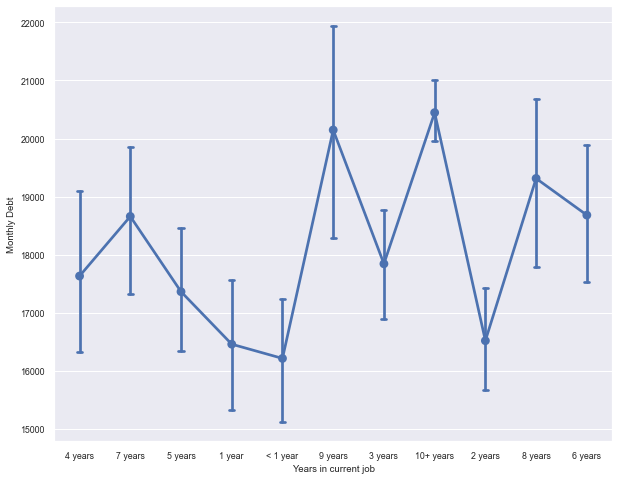

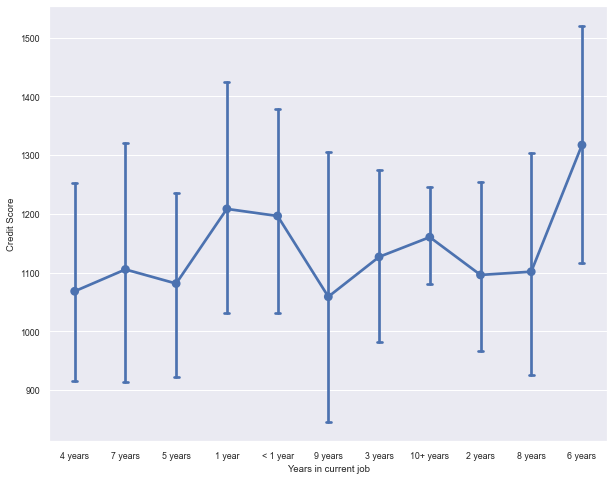

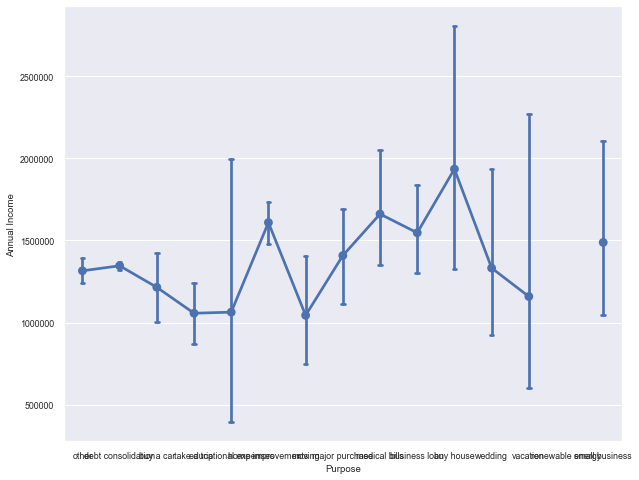

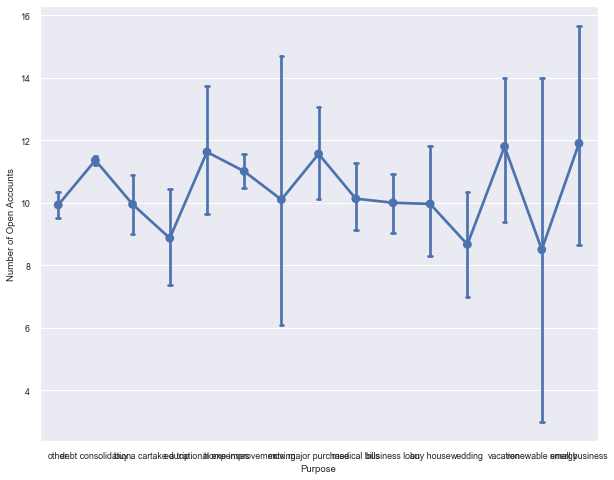

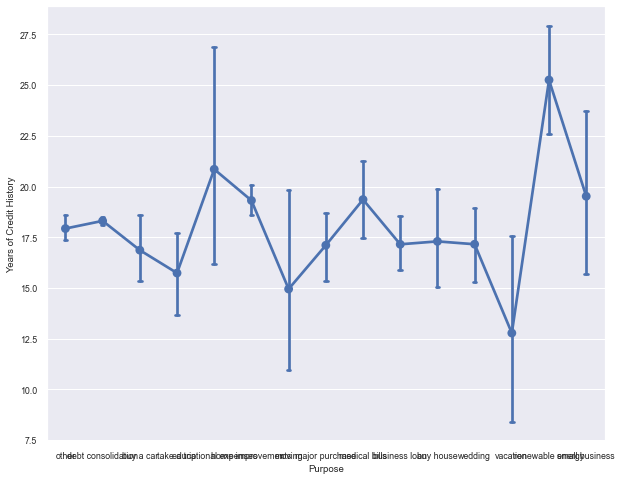

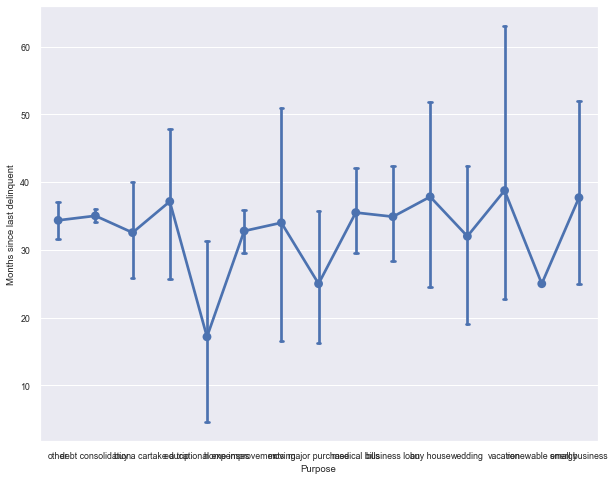

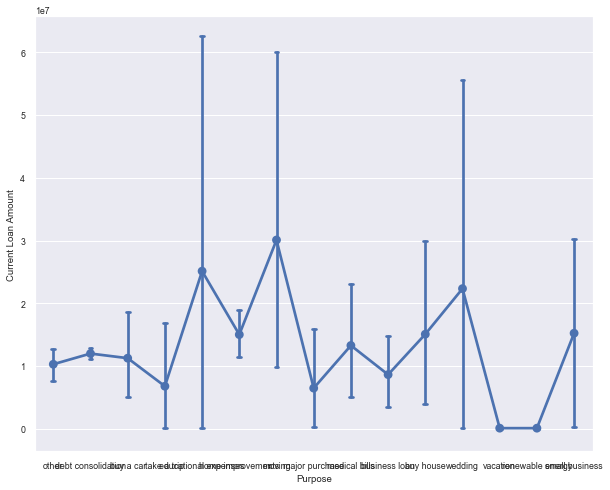

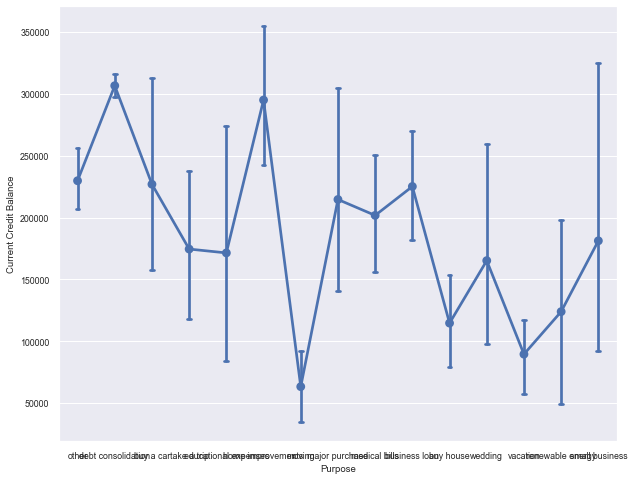

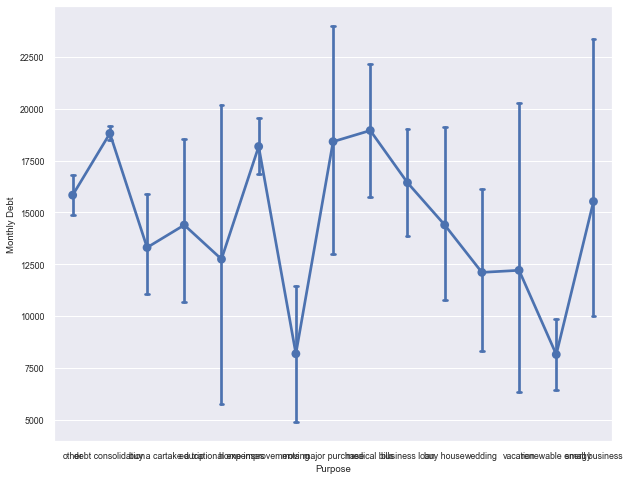

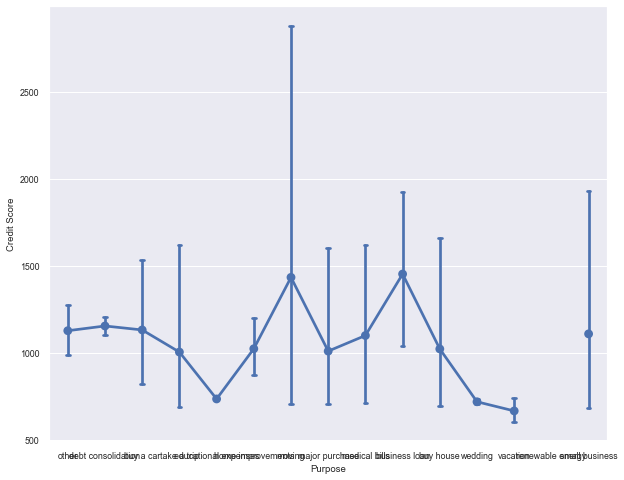

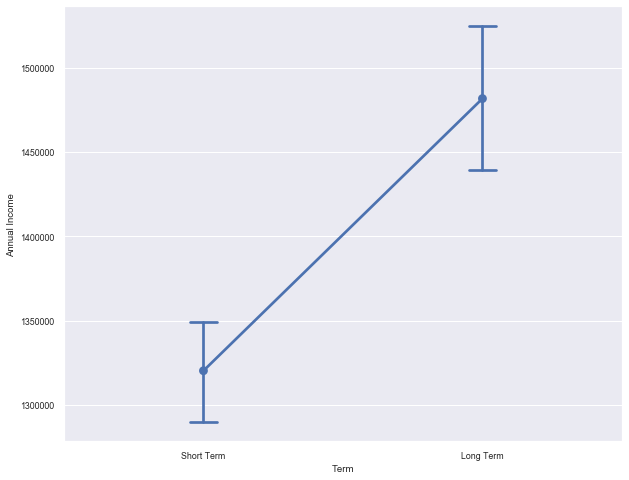

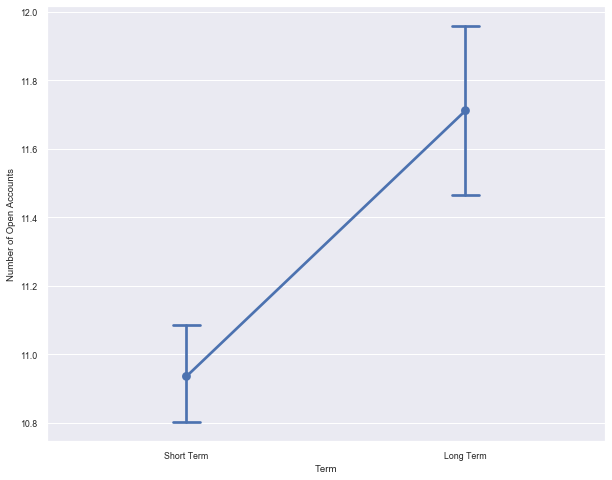

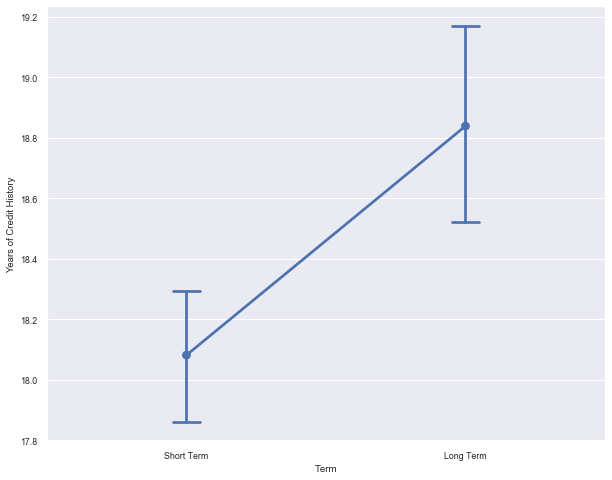

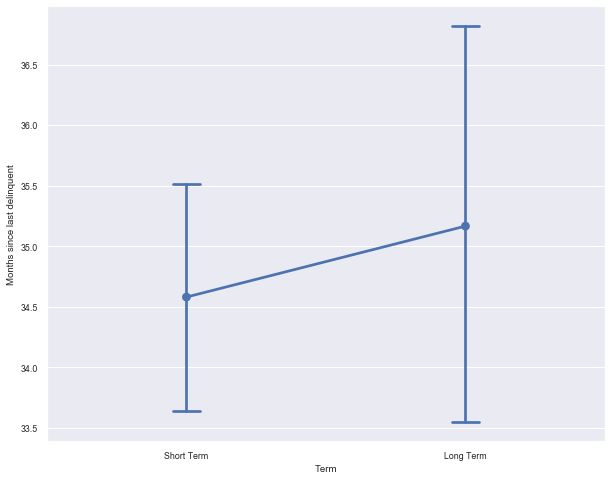

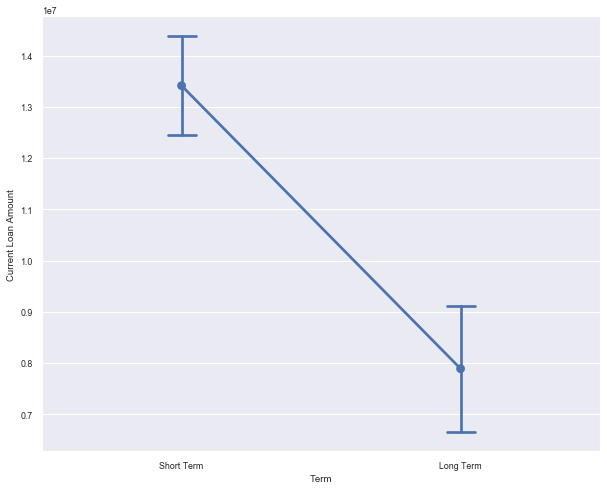

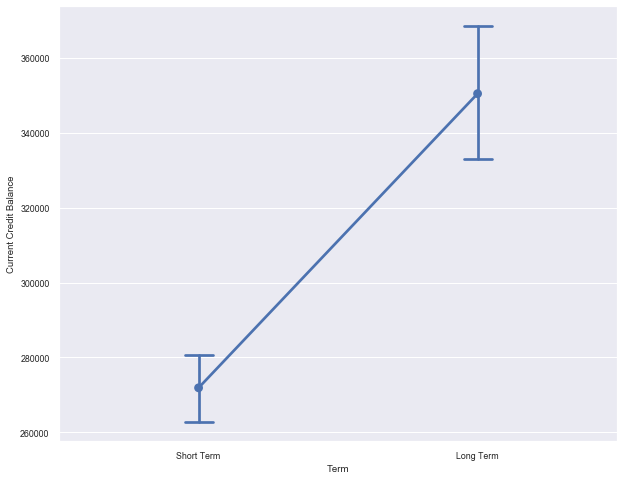

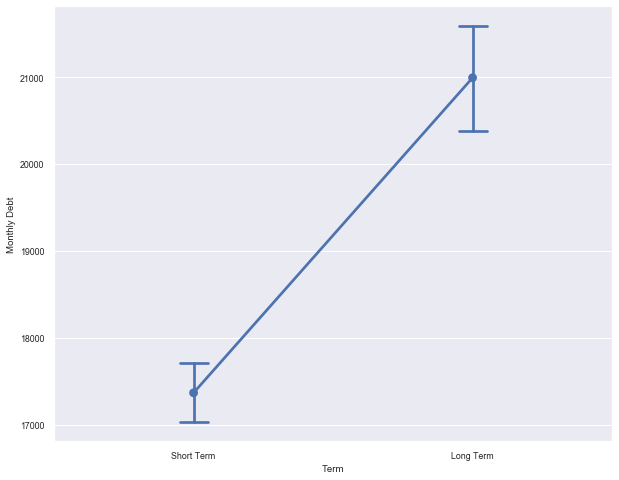

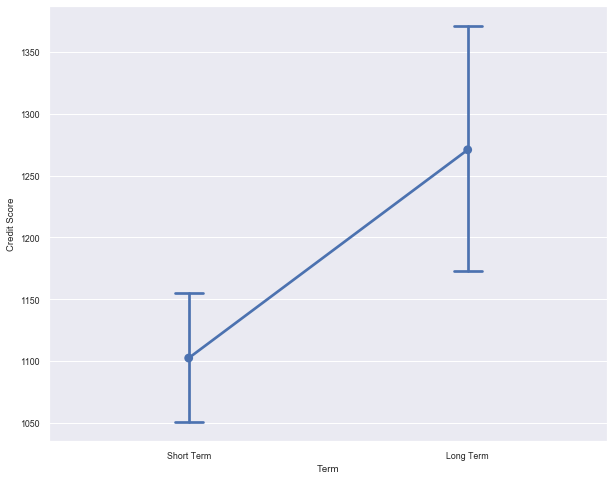

In [91]:
for col in CAT_FEATURE_NAMES:
    for num_feature in NUM_FEATURE_NAMES:
        plt.figure(figsize=(10, 8))

        sns.pointplot(x=col, y=num_feature, data=train, capsize=.1,);

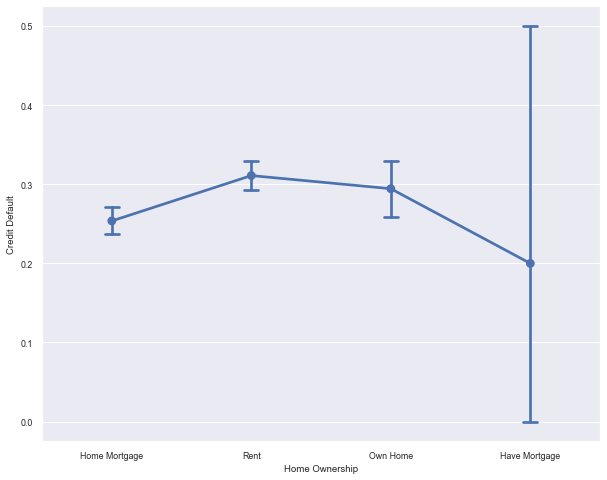

In [92]:
plt.figure(figsize=(10, 8))

sns.pointplot(x='Home Ownership', y='Credit Default', data=train, capsize=.1,);

#### не лучший выбор для сокращениия признаков

In [93]:
# def change_pay_1(df):
#     df.loc[df['Home Ownership'].isin(["Home Mortgage", "Rent","Own Home"]),'Home Ownership'] = 0
#     df.loc[df['Home Ownership'].isin(["Have Mortgage"]), 'Home Ownership'] = 2
#     return df


# test = change_pay_1(test)
# train = change_pay_1(train)

In [94]:
train['Home Ownership'].value_counts()

Home Mortgage    2909
Rent             2575
Own Home          506
Have Mortgage      10
Name: Home Ownership, dtype: int64

In [95]:
Test['Home Ownership'].value_counts()

Home Mortgage    1225
Rent             1020
Own Home          248
Have Mortgage       7
Name: Home Ownership, dtype: int64

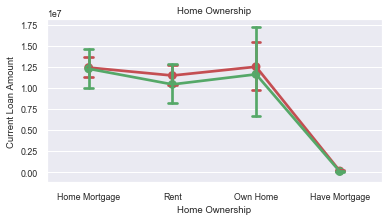

In [96]:
num_feature = 'Current Loan Amount'
col = 'Home Ownership'
plt.figure(figsize=figsize)
sns.pointplot(x=col, y=num_feature, data=train, capsize=.1, label='train', color='r')
sns.pointplot(x=col, y=num_feature, data=test, capsize=.1, label='test', color='g')
plt.title(col)
plt.show()

### Из третьего урока

In [372]:
import pandas as pd
import numpy as np
import pickle
import random
from pathlib import Path

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [373]:
import warnings
warnings.filterwarnings('ignore')

In [374]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [375]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [376]:
def balance_df_by_target(df, target_name, method='over'):

    assert method in ['over', 'under', 'tomek', 'smote'], 'Неверный метод сэмплирования'
    
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    if method == 'over':
        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)
            
    elif method == 'under':
        df_ = df.copy()
        df = df_[df_[target_name] == minor_class_name]
        tmp = df_[df_[target_name] == major_class_name]
        df = df.append(tmp.iloc[
            np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
        ], ignore_index=True)

    elif method == 'tomek':
        from imblearn.under_sampling import TomekLinks
        tl = TomekLinks()
        X_tomek, y_tomek = tl.fit_sample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_tomek, y_tomek], axis=1)
    
    elif method == 'smote':
        from imblearn.over_sampling import SMOTE
        smote = SMOTE()
        X_smote, y_smote = smote.fit_sample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_smote, y_smote], axis=1)

    return df.sample(frac=1) 

**Пути к директориям и файлам**

In [377]:
from pathlib import Path

# TRAIN_DATASET_PATH = 'data/course_project/train.csv'
# TEST_DATASET_PATH = './data/course_project/test.csv'

DATA_ROOT = Path('data/course_project')
MODELS_PATH = Path('data/course_project/models/')

# input
DATASET_PATH = DATA_ROOT / 'train.csv'
PREP_DATASET_PATH = DATA_ROOT / 'training_project_data_prep.csv'

# output
TRAIN_FULL_PATH = DATA_ROOT / 'training_project_train_full.csv'
TRAIN_PART_PATH = DATA_ROOT / 'training_project_train_part_b.csv'
TEST_PART_PATH = DATA_ROOT / 'training_project_test_part.csv'

SCALER_FILE_PATH = MODELS_PATH / 'scaler.pkl'

In [378]:
# from sklearn.model_selection import train_test_split

# train, test = train_test_split(df_train,
#                                test_size=0.2,
#                                shuffle=True,
#                                stratify=df_train['Credit Default'],
#                                random_state=12)

In [379]:
# test.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

In [380]:
# df_base = pd.read_csv(DATASET_PATH)
df_base = pd.read_csv(PREP_DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH)

df.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0            10+ years        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        1.0                          32.0           1.0  ...   
1                        0.0                          32.0           0.0  ...   
2                        0.0                          32.0           0.0  ...   
3                        1.0                          32.0           1.0  ...   
4                        1.0                          32.0           0.0  ...   

  Purpose_medical bills Purpose_moving  Purpose_other  \
0                     0              0              0   
1                     0              0              0   
2                     0              0              0   
3                     0              0              0   
4                     0              0              0   

   Purpose_renewable energy  Purpose_small business  Purpose_take a trip  \
0                         0                       0                    0   
1                         0                       0                    0   
2                         0                       0                    0   
3                         0                       0                    0   
4                         0                       0                    0   

   Purpose_vacation  Purpose_wedding  Term_Long Term  Term_Short Term  
0                 0                0               0                1  
1                 0                0               1                0  
2                 0                0               0                1  
3                 0                0               0                1  
4                 0                0               0                1  

[5 rows x 49 columns]

In [381]:
CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

In [382]:
WO_CATEGORIES = df.columns.drop(CAT_FEATURE_NAMES).tolist()
df = df[WO_CATEGORIES]
df.head()

Annual Income  Tax Liens  Number of Open Accounts  Years of Credit History  \
0       482087.0        0.0                     11.0                     26.3   
1      1025487.0        0.0                     15.0                     15.3   
2       751412.0        0.0                     11.0                     35.0   
3       805068.0        0.0                      8.0                     22.5   
4       776264.0        0.0                     13.0                     13.6   

   Maximum Open Credit  Number of Credit Problems  \
0             685960.0                        1.0   
1            1181730.0                        0.0   
2            1182434.0                        0.0   
3             147400.0                        1.0   
4             385836.0                        1.0   

   Months since last delinquent  Bankruptcies  Current Loan Amount  \
0                          32.0           1.0           99999999.0   
1                          32.0           0.0             264968.0   
2                          32.0           0.0           99999999.0   
3                          32.0           1.0             121396.0   
4                          32.0           0.0             125840.0   

   Current Credit Balance  ...  Purpose_medical bills  Purpose_moving  \
0                 47386.0  ...                      0               0   
1                394972.0  ...                      0               0   
2                308389.0  ...                      0               0   
3                 95855.0  ...                      0               0   
4                 93309.0  ...                      0               0   

   Purpose_other  Purpose_renewable energy  Purpose_small business  \
0              0                         0                       0   
1              0                         0                       0   
2              0                         0                       0   
3              0                         0                       0   
4              0                         0                       0   

   Purpose_take a trip  Purpose_vacation  Purpose_wedding  Term_Long Term  \
0                    0                 0                0               0   
1                    0                 0                0               1   
2                    0                 0                0               0   
3                    0                 0                0               0   
4                    0                 0                0               0   

   Term_Short Term  
0                1  
1                0  
2                1  
3                1  
4                1  

[5 rows x 45 columns]

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   7500 non-null   float64
 1   Tax Liens                       7500 non-null   float64
 2   Number of Open Accounts         7500 non-null   float64
 3   Years of Credit History         7500 non-null   float64
 4   Maximum Open Credit             7500 non-null   float64
 5   Number of Credit Problems       7500 non-null   float64
 6   Months since last delinquent    7500 non-null   float64
 7   Bankruptcies                    7500 non-null   float64
 8   Current Loan Amount             7500 non-null   float64
 9   Current Credit Balance          7500 non-null   float64
 10  Monthly Debt                    7500 non-null   float64
 11  Credit Score                    7500 non-null   float64
 12  Credit Default                  75

**Выделение целевой переменной и групп признаков**

In [289]:
# BASE_FEATURE_NAMES

In [384]:
TARGET_NAME = 'Credit Default'
# BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()

In [385]:
BASE_FEATURE_NAMES

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Years in current job_1 year',
 'Years in current job_10+ years',
 'Years in current job_2 years',
 'Years in current job_3 years',
 'Years in current job_4 years',
 'Years in current job_5 years',
 'Years in current job_6 years',
 'Years in current job_7 years',
 'Years in current job_8 years',
 'Years in current job_9 years',
 'Years in current job_< 1 year',
 'Purpose_business loan',
 'Purpose_buy a car',
 'Purpose_buy house',
 'Purpose_debt consolidation',
 'Purpose_educational expenses',
 'Purpose_home improvements',
 'Purpose_major purchase',
 'Purpose_medical bills',
 'Purpose_moving',
 'Pu

In [386]:
df[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [387]:
# BASE_FEATURE_NAMES

In [391]:
NEW_FEATURE_NAMES

[]

### Отбор признаков<a class="anchor" id="feature_selection"></a>

In [389]:
# df.columns

In [390]:
CAT_FEATURE_NAMES = []

In [392]:
NUM_FEATURE_NAMES = ['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score']

# CAT_FEATURE_NAMES = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + CAT_FEATURE_NAMES + NEW_FEATURE_NAMES

In [393]:
# df.describe(include = 'all').T

### Масштабрование данных<a class="anchor" id="scaler"></a>

In [394]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

**Сохранение модели для масштабирования данных**

In [395]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

### Разбиение на train и test<a class="anchor" id="train_and_test"></a>

In [396]:
X = df[NUM_FEATURE_NAMES]
# X = df[SELECTED_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)

display(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

0    0.718286
1    0.281714
Name: Credit Default, dtype: float64

0    0.718222
1    0.281778
Name: Credit Default, dtype: float64

### Сохранение обучающего и тестового датасетов<a class="anchor" id="train_test_saving"></a> 

In [397]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [398]:
df.to_csv(TRAIN_FULL_PATH, index=False, encoding='utf-8')
train.to_csv(TRAIN_PART_PATH, index=False, encoding='utf-8')
test.to_csv(TEST_PART_PATH, index=False, encoding='utf-8')

### Построение и оценка базовых моделей<a class="anchor" id="baseline_modeling"></a> 

**Логистическая регрессия**

In [399]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3771
           1       0.99      0.19      0.32      1479

    accuracy                           0.77      5250
   macro avg       0.87      0.60      0.59      5250
weighted avg       0.82      0.77      0.71      5250

TEST

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1616
           1       0.97      0.18      0.31       634

    accuracy                           0.77      2250
   macro avg       0.87      0.59      0.58      2250
weighted avg       0.82      0.77      0.70      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1613    3
1                519  115


**k ближайших соседей**

In [400]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

evaluate_preds(model_knn, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      3771
           1       0.77      0.44      0.56      1479

    accuracy                           0.81      5250
   macro avg       0.79      0.70      0.72      5250
weighted avg       0.80      0.81      0.79      5250

TEST

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1616
           1       0.52      0.29      0.37       634

    accuracy                           0.73      2250
   macro avg       0.64      0.59      0.60      2250
weighted avg       0.70      0.73      0.70      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1449  167
1                451  183


**Дерево решений**

In [401]:
model_tree = DecisionTreeClassifier(random_state=21,
                                    class_weight={0:1, 1:3.6},
                                    max_depth=4
                                    )
model_tree.fit(X_train, y_train)

evaluate_preds(model_tree, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.90      0.44      0.59      3771
           1       0.38      0.87      0.53      1479

    accuracy                           0.56      5250
   macro avg       0.64      0.65      0.56      5250
weighted avg       0.75      0.56      0.57      5250

TEST

              precision    recall  f1-score   support

           0       0.88      0.43      0.58      1616
           1       0.37      0.85      0.52       634

    accuracy                           0.55      2250
   macro avg       0.63      0.64      0.55      2250
weighted avg       0.74      0.55      0.56      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               700  916
1                93  541


**Бустинговые алгоритмы**

*XGBoost*

In [402]:
%%time
model_xgb = xgb.XGBClassifier(random_state=21,
#                               n_estimators=100
                             )
model_xgb.fit(X_train, y_train)

evaluate_preds(model_xgb, X_train, X_test, y_train, y_test)

[14:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAIN

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3771
           1       0.99      0.83      0.90      1479

    accuracy                           0.95      5250
   macro avg       0.97      0.91      0.94      5250
weighted avg       0.95      0.95      0.95      5250

TEST

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1616
           1       0.59      0.34      0.43       634

    accuracy                           0.75      2250
   macro avg       0.68      0.62      0.63      2250
weighted avg       0.72      0.75      0.72      2250

CONFUSION MATRIX

col_0

*LightGBM*

In [403]:
%%time
model_lgbm = lgbm.LGBMClassifier(random_state=21, 
                                 class_weight={0:1, 1:3.6},
#                                  n_estimators=100
                                )
model_lgbm.fit(X_train, y_train)

evaluate_preds(model_lgbm, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      3771
           1       0.68      0.99      0.81      1479

    accuracy                           0.87      5250
   macro avg       0.84      0.91      0.85      5250
weighted avg       0.91      0.87      0.87      5250

TEST

              precision    recall  f1-score   support

           0       0.83      0.67      0.74      1616
           1       0.44      0.65      0.52       634

    accuracy                           0.66      2250
   macro avg       0.63      0.66      0.63      2250
weighted avg       0.72      0.66      0.68      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1079  537
1                220  414
Wall time: 384 ms


*CatBoost*

In [404]:
%%time
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3771
           1       0.99      0.50      0.67      1479

    accuracy                           0.86      5250
   macro avg       0.91      0.75      0.79      5250
weighted avg       0.88      0.86      0.84      5250

TEST

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1616
           1       0.73      0.27      0.39       634

    accuracy                           0.77      2250
   macro avg       0.75      0.62      0.62      2250
weighted avg       0.76      0.77      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1553   63
1                463  171
Wall time: 8.18 s


### Подготовка для catboost

In [405]:
df.head()

Annual Income  Tax Liens  Number of Open Accounts  Years of Credit History  \
0      -1.114304  -0.110953                -0.026674                 1.133645   
1      -0.396190  -0.110953                 0.788223                -0.428528   
2      -0.758385  -0.110953                -0.026674                 2.369181   
3      -0.687478  -0.110953                -0.637847                 0.593985   
4      -0.725543  -0.110953                 0.380774                -0.669954   

   Maximum Open Credit  Number of Credit Problems  \
0            -0.016174                   1.664779   
1             0.014763                  -0.340979   
2             0.014807                  -0.340979   
3            -0.049781                   1.664779   
4            -0.034902                   1.664779   

   Months since last delinquent  Bankruptcies  Current Loan Amount  \
0                     -0.083484      2.545732             2.760520   
1                     -0.083484     -0.337099            -0.363620   
2                     -0.083484     -0.337099             2.760520   
3                     -0.083484      2.545732            -0.368118   
4                     -0.083484     -0.337099            -0.367978   

   Current Credit Balance  ...  Purpose_medical bills  Purpose_moving  \
0               -0.762772  ...                      0               0   
1                0.330781  ...                      0               0   
2                0.058379  ...                      0               0   
3               -0.610282  ...                      0               0   
4               -0.618292  ...                      0               0   

   Purpose_other  Purpose_renewable energy  Purpose_small business  \
0              0                         0                       0   
1              0                         0                       0   
2              0                         0                       0   
3              0                         0                       0   
4              0                         0                       0   

   Purpose_take a trip  Purpose_vacation  Purpose_wedding  Term_Long Term  \
0                    0                 0                0               0   
1                    0                 0                0               1   
2                    0                 0                0               0   
3                    0                 0                0               0   
4                    0                 0                0               0   

   Term_Short Term  
0                1  
1                0  
2                1  
3                1  
4                1  

[5 rows x 45 columns]

In [420]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH)

In [421]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_base.select_dtypes(exclude=numerics)
CAT_FEATURE_NAMES = newdf.columns
CAT_FEATURE_NAMES

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')

In [422]:

BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
# BASE_FEATURE_NAMES = df_base.columns.drop(CAT_FEATURE_NAMES).tolist()
BASE_FEATURE_NAMES

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [423]:
X = df[BASE_FEATURE_NAMES]
y = df[TARGET_NAME]


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)

In [424]:
X_train[CAT_FEATURE_NAMES].nunique()

Home Ownership           4
Years in current job    11
Purpose                 15
Term                     2
dtype: int64

In [425]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21,
                                     cat_features=CAT_FEATURE_NAMES,
#                                      one_hot_max_size=10
                                     )
model_catb.fit(X_train, y_train)

evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      3771
           1       0.97      0.50      0.66      1479

    accuracy                           0.85      5250
   macro avg       0.90      0.75      0.78      5250
weighted avg       0.87      0.85      0.84      5250

TEST

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1616
           1       0.71      0.31      0.43       634

    accuracy                           0.77      2250
   macro avg       0.74      0.63      0.64      2250
weighted avg       0.76      0.77      0.74      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1534   82
1                438  196


In [426]:
disbalance = y_train.value_counts()[0] / y_train.value_counts()[1]
disbalance

2.5496957403651117

In [427]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21,
                                     cat_features=CAT_FEATURE_NAMES,
                                     class_weights=[1, disbalance]
                                     )
model_catb.fit(X_train, y_train)

evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3771
           1       0.72      0.86      0.79      1479

    accuracy                           0.87      5250
   macro avg       0.83      0.86      0.84      5250
weighted avg       0.88      0.87      0.87      5250

TEST

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      1616
           1       0.48      0.56      0.51       634

    accuracy                           0.70      2250
   macro avg       0.65      0.66      0.65      2250
weighted avg       0.72      0.70      0.71      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1232  384
1                281  353


[Гиперпараметры catboost](https://catboost.ai/docs/concepts/python-reference_parameters-list.html#python-reference_parameters-list)

In [430]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21,
                                     class_weights=[1, disbalance],
                                     eval_metric='F1',
                                     cat_features=CAT_FEATURE_NAMES,
                                     early_stopping_rounds=50,
                                     use_best_model=True,
                                     custom_metric=['Precision', 'Recall']
                                    )
model_catb.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [431]:
model_catb.best_score_

{'learn': {'Recall:use_weights=false': 0.7329276538201488,
  'Logloss': 0.4847248885702349,
  'F1': 0.7622503194047119,
  'Precision:use_weights=false': 0.6029328821206994,
  'Precision:use_weights=true': 0.7947297286803271,
  'Recall:use_weights=true': 0.7329276538201488},
 'validation': {'Recall:use_weights=false': 0.583596214511041,
  'Logloss': 0.5522229384317451,
  'F1': 0.6417831768888937,
  'Precision:use_weights=false': 0.52,
  'Precision:use_weights=true': 0.7341959825088411,
  'Recall:use_weights=true': 0.583596214511041}}

In [432]:
evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3771
           1       0.57      0.67      0.62      1479

    accuracy                           0.76      5250
   macro avg       0.72      0.74      0.72      5250
weighted avg       0.78      0.76      0.77      5250

TEST

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1616
           1       0.49      0.58      0.53       634

    accuracy                           0.71      2250
   macro avg       0.66      0.67      0.66      2250
weighted avg       0.73      0.71      0.72      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1236  380
1                264  370


### Выбор лучшей модели и подбор гиперпараметров<a class="anchor" id="tuning_best_model"></a> 

In [433]:
frozen_params = {
     'class_weights':[1, disbalance], 
     'silent':True,
     'random_state':21,
     'cat_features':CAT_FEATURE_NAMES,
     'eval_metric':'F1',
     'early_stopping_rounds':20
}
model_catb = catb.CatBoostClassifier(**frozen_params)

**Подбор гиперпараметров**

In [434]:
params = {'iterations':[50, 200, 500, 700, 1500],
          'max_depth':[3, 5, 7]}

In [435]:
cv = StratifiedKFold(n_splits=3, random_state=21, shuffle=True)

In [436]:
grid_search = model_catb.grid_search(params, X_train, y_train, cv=cv, stratified=True, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.598388377
bestIteration = 48

0:	loss: 0.5983884	best: 0.5983884 (0)	total: 1.47s	remaining: 20.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.5912304088
bestIteration = 2

1:	loss: 0.5912304	best: 0.5983884 (0)	total: 2.14s	remaining: 13.9s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.5912304088
bestIteration = 2

2:	loss: 0.5912304	best: 0.5983884 (0)	total: 2.81s	remaining: 11.3s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.5912304088
bestIteration = 2

3:	loss: 0.5912304	best: 0.5983884 (0)	total: 3.54s	remaining: 9.72s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.5912304088
bestIteration = 2

4:	loss: 0.5912304	best: 0.5983884 (0)	total: 4.15s	remaining: 8.31s

bestTest = 0.6031876604
bestIteration = 49

5:	loss: 0.6031877	best: 0.6031877 (5)	total: 6.15s	remaining: 9.22s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6212556502
bestIteration = 82

6:	los

In [437]:
grid_search

{'params': {'depth': 7, 'iterations': 50},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
        

In [438]:
pd.DataFrame(grid_search['cv_results']).sort_values('test-F1-mean', ascending=False).head()

iterations  test-F1-mean  test-F1-std  train-F1-mean  train-F1-std  \
49          49      0.637847     0.034994       0.686969      0.025711   
48          48      0.636049     0.031928       0.685884      0.022859   
45          45      0.635766     0.028306       0.682406      0.021499   
43          43      0.635400     0.029057       0.682069      0.021862   
47          47      0.635400     0.031353       0.684150      0.026304   

    test-Logloss-mean  test-Logloss-std  train-Logloss-mean  train-Logloss-std  
49           0.562328          0.005819            0.538837           0.002838  
48           0.562576          0.005502            0.539605           0.002594  
45           0.563605          0.005239            0.541947           0.001915  
43           0.564345          0.005074            0.543551           0.001725  
47           0.563104          0.005343            0.540642           0.002599

**Обучение и оценка финальной модели**

In [439]:
%%time

final_model = catb.CatBoostClassifier(**frozen_params, iterations=200, max_depth=7)
final_model.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

evaluate_preds(final_model, X_train, X_test, y_train, y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3771
           1       0.54      0.62      0.58      1479

    accuracy                           0.75      5250
   macro avg       0.69      0.71      0.70      5250
weighted avg       0.76      0.75      0.75      5250

TEST

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1616
           1       0.49      0.57      0.53       634

    accuracy                           0.71      2250
   macro avg       0.66      0.67      0.66      2250
weighted avg       0.73      0.71      0.72      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1241  375
1                273  361
Wall time: 3.26 s


### Балансировка целевой переменной<a class="anchor" id="target_balancing"></a>

In [440]:
import inspect
print(inspect.getsource(balance_df_by_target))

def balance_df_by_target(df, target_name, method='over'):

    assert method in ['over', 'under', 'tomek', 'smote'], 'Неверный метод сэмплирования'
    
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    if method == 'over':
        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)
            
    elif method == 'under':
        df_ = df.copy()
        df = df_[df_[target_name] == minor_class_name]
        tmp = df_[df_[target_name] == major_class_name]
        df = df.append(tmp.iloc[
            np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
        ], ignore_index=True)

    elif method == 'tomek':
        from imblearn.under_sampli

In [441]:
def init_models():
    model_lr = LogisticRegression(random_state=21)
    model_knn = KNeighborsClassifier()
    model_tree = DecisionTreeClassifier(random_state=21)
    model_xgb = xgb.XGBClassifier(random_state=21)
    model_lgbm = lgbm.LGBMClassifier(random_state=21)
    model_catb = catb.CatBoostClassifier(silent=True, random_state=21)

    models = {
        'lr': model_lr,
        'knn': model_knn,
        'tree': model_tree,
        'xgb': model_xgb,
        'lgbm': model_lgbm,
        'cat': model_catb
    }
    return models

In [442]:
def get_metrics(report):
    f1_macro = report['macro avg']['f1-score']
    f1_0 = report['0']['f1-score']
    f1_1 = report['1']['f1-score']
    return f1_macro, f1_0, f1_1

In [443]:
def run_experiment(X_train, X_test, y_train, y_test, method='not'):
    assert method in ['not', 'over', 'under', 'tomek', 'smote'], 'Неправильный метод сэмплирования'
    
    models = init_models()
    
    stata = pd.DataFrame()
    for name, model in models.items():
        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        report_train = classification_report(y_train, pred_train, output_dict=True)
        report_test = classification_report(y_test, pred_test, output_dict=True)
        f1_macro_train, f1_0_train, f1_1_train = get_metrics(report_train)
        f1_macro_test, f1_0_test, f1_1_test = get_metrics(report_test)

        stata = stata.append({
            'model_name': name,
            f'f1_macro_train_{method}': f1_macro_train,
            f'f1_macro_test_{method}': f1_macro_test,
            f'f1_0_train_{method}': f1_0_train,
            f'f1_0_test_{method}': f1_0_test,
            f'f1_1_train_{method}': f1_1_train,
            f'f1_1_test_{method}': f1_1_test
        }, ignore_index=True)
    return stata, models

*Ничего не делаем с данными*

In [444]:
df = pd.read_csv(PREP_DATASET_PATH)
df[NUM_FEATURE_NAMES] = scaler.transform(df[NUM_FEATURE_NAMES])

X = df[SELECTED_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)

In [445]:
%%time
stata_not_balanced, models_not_balanced = run_experiment(X_train, X_test, y_train, y_test, method='not')
stata_not_balanced

[14:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 12.1 s


f1_0_test_not  f1_0_train_not  f1_1_test_not  f1_1_train_not  \
0       0.860726        0.863001       0.305851        0.324294   
1       0.824232        0.875703       0.371951        0.563199   
2       0.782286        1.000000       0.446892        1.000000   
3       0.837992        0.966731       0.428571        0.904604   
4       0.852266        0.930175       0.429806        0.768978   
5       0.855176        0.910168       0.394009        0.666667   

   f1_macro_test_not  f1_macro_train_not model_name  
0           0.583288            0.593647         lr  
1           0.598092            0.719451        knn  
2           0.614589            1.000000       tree  
3           0.633282            0.935667        xgb  
4           0.641036            0.849577       lgbm  
5           0.624593            0.788417        cat

*Oversampling*

In [446]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME, method='over')
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [447]:
X_train_balanced = df_balanced.drop(columns=TARGET_NAME)
y_train_balanced = df_balanced[TARGET_NAME]

In [448]:
%%time
stata_balanced_over, models_over = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, method='over')
stata_balanced_over

[14:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 12.6 s


f1_0_test_over  f1_0_train_over  f1_1_test_over  f1_1_train_over  \
0        0.828473         0.742524        0.401198         0.463090   
1        0.758297         0.807912        0.408882         0.728056   
2        0.785935         1.000000        0.448331         1.000000   
3        0.814480         0.971512        0.481013         0.963627   
4        0.808962         0.943509        0.472849         0.925255   
5        0.822469         0.916550        0.495303         0.882363   

   f1_macro_test_over  f1_macro_train_over model_name  
0            0.614836             0.602807         lr  
1            0.583589             0.767984        knn  
2            0.617133             1.000000       tree  
3            0.647746             0.967569        xgb  
4            0.640905             0.934382       lgbm  
5            0.658886             0.899457        cat

*Undersampling*

In [449]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME, method='under')
    
df_balanced[TARGET_NAME].value_counts()

1    1479
0    1479
Name: Credit Default, dtype: int64

In [450]:
X_train_balanced = df_balanced.drop(columns=TARGET_NAME)
y_train_balanced = df_balanced[TARGET_NAME]

In [451]:
%%time
stata_balanced_under, models_under = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, method='under')
stata_balanced_under

[14:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 8.18 s


f1_0_test_under  f1_0_train_under  f1_1_test_under  f1_1_train_under  \
0         0.707649          0.638269         0.488699          0.638269   
1         0.688330          0.760834         0.455433          0.750086   
2         0.690935          1.000000         0.489988          1.000000   
3         0.702165          0.995270         0.501485          0.995264   
4         0.698140          0.970250         0.504695          0.970250   
5         0.723404          0.908242         0.514391          0.905790   

   f1_macro_test_under  f1_macro_train_under model_name  
0             0.598174              0.638269         lr  
1             0.571882              0.755460        knn  
2             0.590462              1.000000       tree  
3             0.601825              0.995267        xgb  
4             0.601418              0.970250       lgbm  
5             0.618897              0.907016        cat

*Undersampling (Tomeklinks)*

In [453]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_train_balanced, y_train_balanced = tl.fit_sample(X_train, y_train)

y_train_balanced.value_counts()

AttributeError: 'TomekLinks' object has no attribute '_validate_data'

In [454]:
%%time
stata_balanced_tomek, models_tomek = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, method='tomek')
stata_balanced_tomek

[14:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 8.23 s


f1_0_test_tomek  f1_0_train_tomek  f1_1_test_tomek  f1_1_train_tomek  \
0         0.707649          0.638269         0.488699          0.638269   
1         0.688330          0.760834         0.455433          0.750086   
2         0.690935          1.000000         0.489988          1.000000   
3         0.702165          0.995270         0.501485          0.995264   
4         0.698140          0.970250         0.504695          0.970250   
5         0.723404          0.908242         0.514391          0.905790   

   f1_macro_test_tomek  f1_macro_train_tomek model_name  
0             0.598174              0.638269         lr  
1             0.571882              0.755460        knn  
2             0.590462              1.000000       tree  
3             0.601825              0.995267        xgb  
4             0.601418              0.970250       lgbm  
5             0.618897              0.907016        cat

*Oversampling (SMOTE)*

In [455]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_sample(X_train, y_train)

y_train_balanced.value_counts()

AttributeError: 'SMOTE' object has no attribute '_validate_data'

In [456]:
%%time
stata_balanced_smote, models_smote = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, method='smote')
stata_balanced_smote

[14:56:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 8.56 s


f1_0_test_smote  f1_0_train_smote  f1_1_test_smote  f1_1_train_smote  \
0         0.707649          0.638269         0.488699          0.638269   
1         0.688330          0.760834         0.455433          0.750086   
2         0.690935          1.000000         0.489988          1.000000   
3         0.702165          0.995270         0.501485          0.995264   
4         0.698140          0.970250         0.504695          0.970250   
5         0.723404          0.908242         0.514391          0.905790   

   f1_macro_test_smote  f1_macro_train_smote model_name  
0             0.598174              0.638269         lr  
1             0.571882              0.755460        knn  
2             0.590462              1.000000       tree  
3             0.601825              0.995267        xgb  
4             0.601418              0.970250       lgbm  
5             0.618897              0.907016        cat

*Сводим результаты вместе*

In [457]:
stata_combined = stata_not_balanced.merge(stata_balanced_under, on='model_name') \
                                   .merge(stata_balanced_over, on='model_name') \
                                   .merge(stata_balanced_tomek, on='model_name') \
                                   .merge(stata_balanced_smote, on='model_name')
stata_combined.head()

f1_0_test_not  f1_0_train_not  f1_1_test_not  f1_1_train_not  \
0       0.860726        0.863001       0.305851        0.324294   
1       0.824232        0.875703       0.371951        0.563199   
2       0.782286        1.000000       0.446892        1.000000   
3       0.837992        0.966731       0.428571        0.904604   
4       0.852266        0.930175       0.429806        0.768978   

   f1_macro_test_not  f1_macro_train_not model_name  f1_0_test_under  \
0           0.583288            0.593647         lr         0.707649   
1           0.598092            0.719451        knn         0.688330   
2           0.614589            1.000000       tree         0.690935   
3           0.633282            0.935667        xgb         0.702165   
4           0.641036            0.849577       lgbm         0.698140   

   f1_0_train_under  f1_1_test_under  ...  f1_1_test_tomek  f1_1_train_tomek  \
0          0.638269         0.488699  ...         0.488699          0.638269   
1          0.760834         0.455433  ...         0.455433          0.750086   
2          1.000000         0.489988  ...         0.489988          1.000000   
3          0.995270         0.501485  ...         0.501485          0.995264   
4          0.970250         0.504695  ...         0.504695          0.970250   

   f1_macro_test_tomek  f1_macro_train_tomek  f1_0_test_smote  \
0             0.598174              0.638269         0.707649   
1             0.571882              0.755460         0.688330   
2             0.590462              1.000000         0.690935   
3             0.601825              0.995267         0.702165   
4             0.601418              0.970250         0.698140   

   f1_0_train_smote  f1_1_test_smote  f1_1_train_smote  f1_macro_test_smote  \
0          0.638269         0.488699          0.638269             0.598174   
1          0.760834         0.455433          0.750086             0.571882   
2          1.000000         0.489988          1.000000             0.590462   
3          0.995270         0.501485          0.995264             0.601825   
4          0.970250         0.504695          0.970250             0.601418   

   f1_macro_train_smote  
0              0.638269  
1              0.755460  
2              1.000000  
3              0.995267  
4              0.970250  

[5 rows x 31 columns]

In [458]:
stata_combined.describe()[
    ['f1_macro_test_not', 'f1_macro_test_under', 'f1_macro_test_over',
     'f1_macro_test_tomek', 'f1_macro_test_smote',
     'f1_1_test_not', 'f1_1_test_under', 'f1_1_test_over',
     'f1_1_test_tomek', 'f1_1_test_smote']
]

f1_macro_test_not  f1_macro_test_under  f1_macro_test_over  \
count           6.000000             6.000000            6.000000   
mean            0.615813             0.597110            0.627183   
std             0.021872             0.015474            0.027459   
min             0.583288             0.571882            0.583589   
25%             0.602216             0.592390            0.615410   
50%             0.619591             0.599796            0.629019   
75%             0.631109             0.601723            0.646036   
max             0.641036             0.618897            0.658886   

       f1_macro_test_tomek  f1_macro_test_smote  f1_1_test_not  \
count             6.000000             6.000000       6.000000   
mean              0.597110             0.597110       0.396180   
std               0.015474             0.015474       0.051967   
min               0.571882             0.571882       0.305851   
25%               0.592390             0.592390       0.377466   
50%               0.599796             0.599796       0.411290   
75%               0.601723             0.601723       0.429497   
max               0.618897             0.618897       0.446892   

       f1_1_test_under  f1_1_test_over  f1_1_test_tomek  f1_1_test_smote  
count         6.000000        6.000000         6.000000         6.000000  
mean          0.492449        0.451262         0.492449         0.492449  
std           0.020510        0.038992         0.020510         0.020510  
min           0.455433        0.401198         0.455433         0.455433  
25%           0.489021        0.418744         0.489021         0.489021  
50%           0.495737        0.460590         0.495737         0.495737  
75%           0.503892        0.478972         0.503892         0.503892  
max           0.514391        0.495303         0.514391         0.514391

In [459]:
stata_combined.sort_values('f1_1_test_smote', ascending=False).iloc[0]

f1_0_test_not           0.855176
f1_0_train_not          0.910168
f1_1_test_not           0.394009
f1_1_train_not          0.666667
f1_macro_test_not       0.624593
f1_macro_train_not      0.788417
model_name                   cat
f1_0_test_under         0.723404
f1_0_train_under        0.908242
f1_1_test_under         0.514391
f1_1_train_under         0.90579
f1_macro_test_under     0.618897
f1_macro_train_under    0.907016
f1_0_test_over          0.822469
f1_0_train_over          0.91655
f1_1_test_over          0.495303
f1_1_train_over         0.882363
f1_macro_test_over      0.658886
f1_macro_train_over     0.899457
f1_0_test_tomek         0.723404
f1_0_train_tomek        0.908242
f1_1_test_tomek         0.514391
f1_1_train_tomek         0.90579
f1_macro_test_tomek     0.618897
f1_macro_train_tomek    0.907016
f1_0_test_smote         0.723404
f1_0_train_smote        0.908242
f1_1_test_smote         0.514391
f1_1_train_smote         0.90579
f1_macro_test_smote     0.618897
f1_macro_t

In [460]:
model = models_smote['xgb']

In [461]:
pred_train = model.predict(X_train_balanced)
pred_test = model.predict(X_test)

evaluate_preds(model, X_train_balanced, X_test, y_train_balanced, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1479
           1       1.00      0.99      1.00      1479

    accuracy                           1.00      2958
   macro avg       1.00      1.00      1.00      2958
weighted avg       1.00      1.00      1.00      2958

TEST

              precision    recall  f1-score   support

           0       0.82      0.61      0.70      1616
           1       0.40      0.67      0.50       634

    accuracy                           0.63      2250
   macro avg       0.61      0.64      0.60      2250
weighted avg       0.70      0.63      0.65      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               989  627
1               212  422
